## Plotting blocking detected in ERA5 - TM2D ABS method / ANOM Contrack / ANOM Tempest
### For NH summer months DJF/ JJA

In [1]:
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib import cm
import sys

In [2]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

# ERA5 Climatology

In [146]:
###TMD2 METHODS
feq_era5_DJF=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_DJF.nc').load()

feq_era5_MAM=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_MAM.nc').load()

feq_era5_JJA=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_JJA.nc').load()

feq_era5_SON=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_SON.nc').load()

In [3]:
feq_era5_DJF

<xarray.Dataset>
Dimensions:   (lon: 360, lat: 180)
Coordinates:
  * lon       (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    Blocking  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [4]:
### CONTRACK

feq_era5_DJF_ano1=xr.open_dataset('/scratch/b/b382006/obs/era5/factory/z500/Feq_BLOCKS-era5_DJF_ano.nc').load()

feq_era5_MAM_ano1=xr.open_dataset('/scratch/b/b382006/obs/era5/factory/z500/Feq_BLOCKS-era5_MAM_ano.nc').load()

feq_era5_JJA_ano1=xr.open_dataset('/scratch/b/b382006/obs/era5/factory/z500/Feq_BLOCKS-era5_JJA_ano.nc').load()

feq_era5_SON_ano1=xr.open_dataset('/scratch/b/b382006/obs/era5/factory/z500/Feq_BLOCKS-era5_SON_ano.nc').load()

feq_era5_DJF_ano1

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    flag     (lat, lon) float64 2.779 2.775 2.775 2.779 ... 6.779 6.783 6.779

In [5]:
##Tempestextrems
feq_era5_ano2=xr.open_dataset('/scratch/b/b382006/obs/era5/factory/z500/tempest/era5_blocking_climo.nc').load()
feq_era5_DJF_ano2=feq_era5_ano2.seasonalmean_object_id[0,...]*100
feq_era5_MAM_ano2=feq_era5_ano2.seasonalmean_object_id[1,...]*100
feq_era5_JJA_ano2=feq_era5_ano2.seasonalmean_object_id[2,...]*100
feq_era5_SON_ano2=feq_era5_ano2.seasonalmean_object_id[3,...]*100
feq_era5_JJA_ano2

<xarray.DataArray 'seasonalmean_object_id' (lat: 181, lon: 360)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    time     object 0001-07-01 00:00:00
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * lon      (lon) float32 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

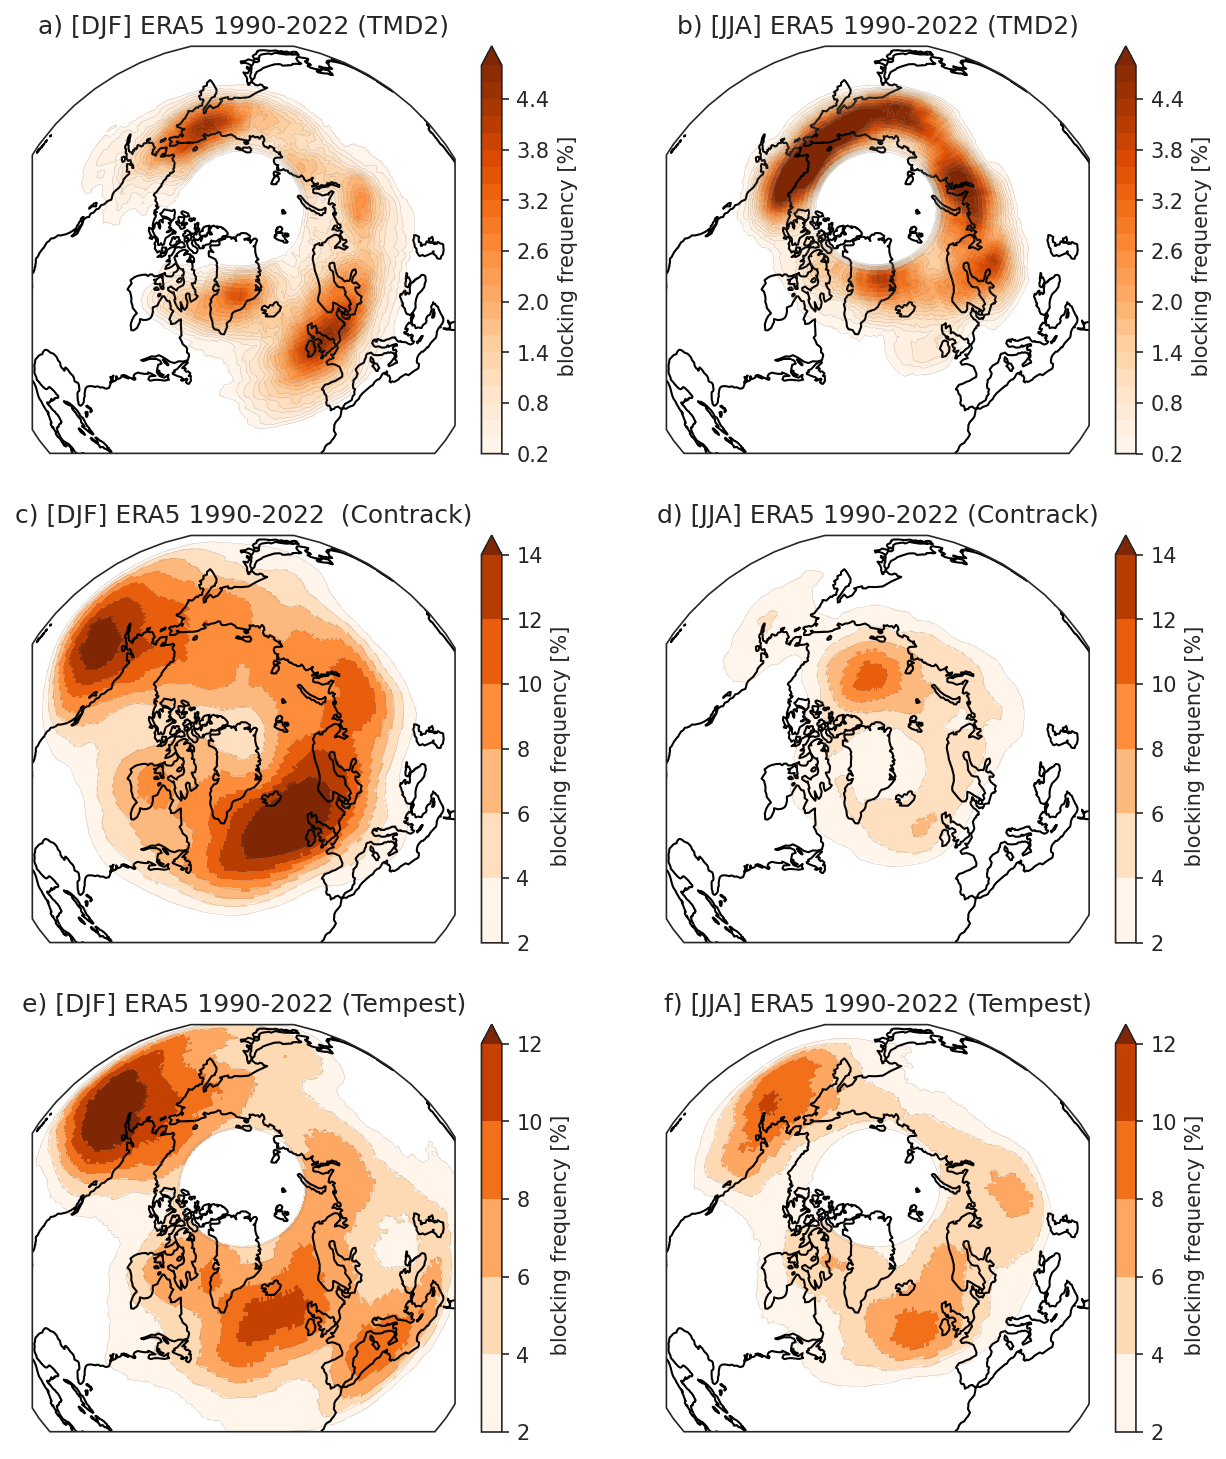

In [205]:
#Methods era5
clevels=[-3,-2.5,-2,-1.5,-1,-0.5,0.5,1,1.5,2,2.5,3]
mlevels=np.arange(0.2,5,0.2)
nlevels=np.arange(2,16,2)
plevels=np.arange(2,14,2)

lon_0 = -35.0
lat_0 =  70.0
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10, 12),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
#fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.Robinson(central_longitude=0, globe=None)})

###==== first panel
im=feq_era5_DJF.Blocking.plot(ax=ax1,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF.Blocking.plot.contour(ax=ax1,colors='grey', linewidths=0.1, levels=mlevels, transform=ccrs.PlateCarree())
#ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('a) [DJF] ERA5 1990-2022 (TMD2)')
#
###==== second panel
im=feq_era5_JJA.Blocking.plot(ax=ax2,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA.Blocking.plot.contour(ax=ax2,colors='grey', linewidths=0.1, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax2.coastlines()
ax2.set_title('b) [JJA] ERA5 1990-2022 (TMD2)')


####==== third panel
im=feq_era5_DJF_ano1.flag.plot(ax=ax3,levels=nlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF_ano1.flag.plot.contour(ax=ax3,colors='grey', linewidths=0.1, levels=nlevels, transform=ccrs.PlateCarree())
#ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax3.coastlines()
ax3.set_title('c) [DJF] ERA5 1990-2022  (Contrack)')

#####==== fourth panel
im=feq_era5_JJA_ano1.flag.plot(ax=ax4,levels=nlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA_ano1.flag.plot.contour(ax=ax4,colors='grey', linewidths=0.1, levels=nlevels, transform=ccrs.PlateCarree())
#ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax4.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax4.coastlines()
ax4.set_title('d) [JJA] ERA5 1990-2022 (Contrack)')

####==== fifth panel
im=feq_era5_DJF_ano2.plot(ax=ax5,levels=plevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF_ano2.plot.contour(ax=ax5,colors='grey', linewidths=0.1, levels=plevels, transform=ccrs.PlateCarree())
#ax5.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax5.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax5.coastlines()
ax5.set_title('e) [DJF] ERA5 1990-2022 (Tempest)')

###==== sixth panel
im=feq_era5_JJA_ano2.plot(ax=ax6,levels=plevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA_ano2.plot.contour(ax=ax6,colors='grey', linewidths=0.1, levels=plevels, transform=ccrs.PlateCarree())
#ax6.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax6.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax6.coastlines()
ax6.set_title('f) [JJA] ERA5 1990-2022 (Tempest)')

### Save
plt.savefig('Methods_bks_ERA5.jpg')

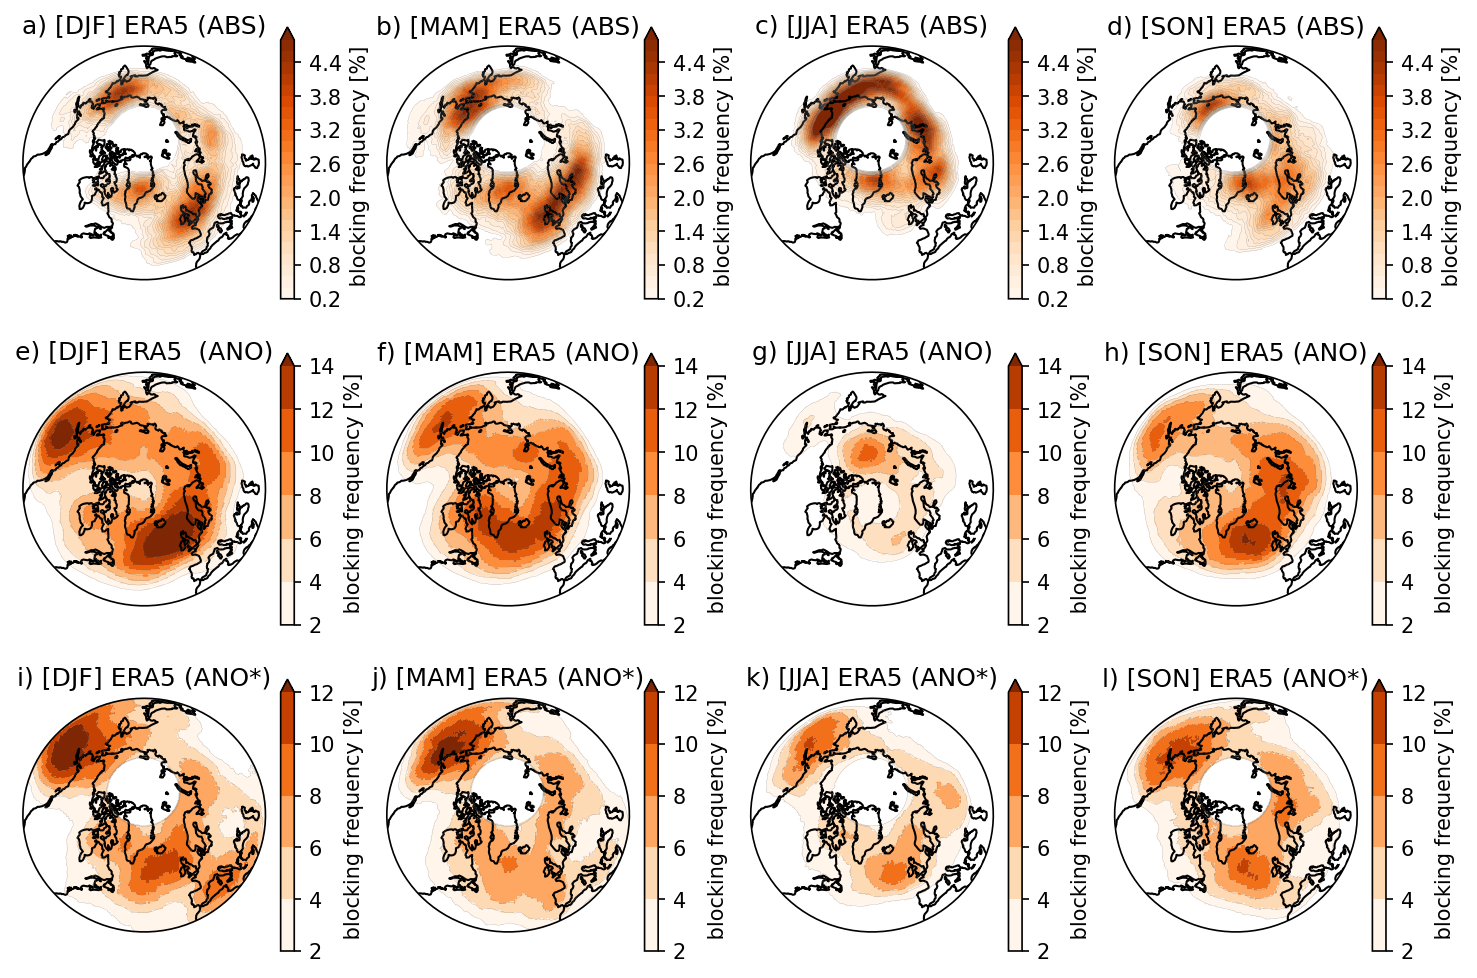

In [21]:
#Methods in ERA5
### color levels
clevels=[-3,-2.5,-2,-1.5,-1,-0.5,0.5,1,1.5,2,2.5,3]
mlevels=np.arange(0.2,5,0.2)
nlevels=np.arange(2,16,2)
plevels=np.arange(2,14,2)

### Compute a circle in axes coordinates, which we can use as a boundary
### for the map. We can pan/zoom as much as we like - the boundary will be
### permanently circular.
import matplotlib.patches as mpatches
import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

### origin for orthographic projection
lon_0 = -35.0
lat_0 =  70.0

### plotting
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12)) = plt.subplots(3, 4, figsize=(12, 8),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
#fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.Robinson(central_longitude=0, globe=None)})

###==== first panel
im=feq_era5_DJF.Blocking.plot(ax=ax1,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF.Blocking.plot.contour(ax=ax1,colors='grey', linewidths=0.1, levels=mlevels, transform=ccrs.PlateCarree())
#ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('a) [DJF] ERA5 (ABS)')
ax1.set_boundary(circle, transform=ax1.transAxes)

#
###==== second panel
im=feq_era5_MAM.Blocking.plot(ax=ax2,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_MAM.Blocking.plot.contour(ax=ax2,colors='grey', linewidths=0.1, levels=mlevels, transform=ccrs.PlateCarree())
#ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax2.coastlines()
ax2.set_title('b) [MAM] ERA5 (ABS)')
ax2.set_boundary(circle, transform=ax2.transAxes)

#
###==== third panel
im=feq_era5_JJA.Blocking.plot(ax=ax3,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA.Blocking.plot.contour(ax=ax3,colors='grey', linewidths=0.1, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax3.coastlines()
ax3.set_title('c) [JJA] ERA5 (ABS)')
ax3.set_boundary(circle, transform=ax3.transAxes)

###==== fourth panel
im=feq_era5_SON.Blocking.plot(ax=ax4,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_SON.Blocking.plot.contour(ax=ax4,colors='grey', linewidths=0.1, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax4.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax4.coastlines()
ax4.set_title('d) [SON] ERA5 (ABS)')
ax4.set_boundary(circle, transform=ax4.transAxes)

####==== third panel
im=feq_era5_DJF_ano1.flag.plot(ax=ax5,levels=nlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF_ano1.flag.plot.contour(ax=ax5,colors='grey', linewidths=0.1, levels=nlevels, transform=ccrs.PlateCarree())
#ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax5.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax5.coastlines()
ax5.set_title('e) [DJF] ERA5  (ANO)')
ax5.set_boundary(circle, transform=ax5.transAxes)


#####==== fourth panel
im=feq_era5_MAM_ano1.flag.plot(ax=ax6,levels=nlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_MAM_ano1.flag.plot.contour(ax=ax6,colors='grey', linewidths=0.1, levels=nlevels, transform=ccrs.PlateCarree())
#ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax6.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax6.coastlines()
ax6.set_title('f) [MAM] ERA5 (ANO)')
ax6.set_boundary(circle, transform=ax6.transAxes)


#####==== fourth panel
im=feq_era5_JJA_ano1.flag.plot(ax=ax7,levels=nlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA_ano1.flag.plot.contour(ax=ax7,colors='grey', linewidths=0.1, levels=nlevels, transform=ccrs.PlateCarree())
#ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax7.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax7.coastlines()
ax7.set_title('g) [JJA] ERA5 (ANO)')
ax7.set_boundary(circle, transform=ax7.transAxes)

#####==== fourth panel
im=feq_era5_SON_ano1.flag.plot(ax=ax8,levels=nlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_SON_ano1.flag.plot.contour(ax=ax8,colors='grey', linewidths=0.1, levels=nlevels, transform=ccrs.PlateCarree())
#ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax8.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax8.coastlines()
ax8.set_title('h) [SON] ERA5 (ANO)')
ax8.set_boundary(circle, transform=ax8.transAxes)

####==== fifth panel
im=feq_era5_DJF_ano2.plot(ax=ax9,levels=plevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF_ano2.plot.contour(ax=ax9,colors='grey', linewidths=0.1, levels=plevels, transform=ccrs.PlateCarree())
#ax5.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax9.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax9.coastlines()
ax9.set_title('i) [DJF] ERA5 (ANO*)')
ax9.set_boundary(circle, transform=ax9.transAxes)


###==== sixth panel
im=feq_era5_MAM_ano2.plot(ax=ax10,levels=plevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_MAM_ano2.plot.contour(ax=ax10,colors='grey', linewidths=0.1, levels=plevels, transform=ccrs.PlateCarree())
#ax6.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax10.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax10.coastlines()
ax10.set_title('j) [MAM] ERA5 (ANO*)')
ax10.set_boundary(circle, transform=ax10.transAxes)

###==== sixth panel
im=feq_era5_JJA_ano2.plot(ax=ax11,levels=plevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA_ano2.plot.contour(ax=ax11,colors='grey', linewidths=0.1, levels=plevels, transform=ccrs.PlateCarree())
#ax6.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax11.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax11.coastlines()
ax11.set_title('k) [JJA] ERA5 (ANO*)')
ax11.set_boundary(circle, transform=ax11.transAxes)

###==== sixth panel
im=feq_era5_SON_ano2.plot(ax=ax12,levels=plevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_SON_ano2.plot.contour(ax=ax12,colors='grey', linewidths=0.1, levels=plevels, transform=ccrs.PlateCarree())
#ax6.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax12.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax12.coastlines()
ax12.set_title('l) [SON] ERA5 (ANO*)')
ax12.set_boundary(circle, transform=ax12.transAxes)

### Save
plt.savefig('Methods_bks_ERA5_full_seas.jpg')

# BLOCKING BIAS IN NEXTGEMS ICON MODEL
### Long simulations
### CONTRACK

In [7]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

In [16]:
### Compute BIAS in ICON C2 (30 years)
##== LOAD FREQUENCY  ICON ngc2013
feq_icon_ngc2013_DJF_ano1=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_DJF_ano.nc').load()
feq_icon_ngc2013_MAM_ano1=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_MAM_ano.nc').load()
feq_icon_ngc2013_JJA_ano1=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_JJA_ano.nc').load()
feq_icon_ngc2013_SON_ano1=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_SON_ano.nc').load()

feq_icon_ngc2013_DJF_ano1

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    flag     (lat, lon) float64 3.113 3.113 3.113 3.113 ... 9.617 9.7 9.7 9.7

In [54]:
### Compute BIAS
#bias_icon =  feq_icon_ngc2013 - feq_era5
bias_icon_DJF =  feq_icon_ngc2013_DJF_ano1 - feq_era5_DJF_ano1 
bias_icon_MAM =  feq_icon_ngc2013_MAM_ano1 - feq_era5_MAM_ano1 
bias_icon_JJA = feq_icon_ngc2013_JJA_ano1 -  feq_era5_JJA_ano1 
bias_icon_SON = feq_icon_ngc2013_SON_ano1 -  feq_era5_SON_ano1

#.sel(lat=slice(0,90))

rmse_icon_DJF=rmse(feq_icon_ngc2013_DJF_ano1.sel(lat=slice(0,90)), feq_era5_DJF_ano1.sel(lat=slice(0,90))) 
rmse_icon_MAM=rmse(feq_icon_ngc2013_MAM_ano1.sel(lat=slice(0,90)), feq_era5_MAM_ano1.sel(lat=slice(0,90))) 
rmse_icon_JJA=rmse(feq_icon_ngc2013_JJA_ano1.sel(lat=slice(0,90)), feq_era5_JJA_ano1.sel(lat=slice(0,90)))
rmse_icon_SON=rmse(feq_icon_ngc2013_SON_ano1.sel(lat=slice(0,90)), feq_era5_SON_ano1.sel(lat=slice(0,90)))
print(rmse_icon_DJF, rmse_icon_MAM, rmse_icon_JJA, rmse_icon_SON)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    flag     float64 3.022 <xarray.Dataset>
Dimensions:  ()
Data variables:
    flag     float64 1.293 <xarray.Dataset>
Dimensions:  ()
Data variables:
    flag     float64 0.7927 <xarray.Dataset>
Dimensions:  ()
Data variables:
    flag     float64 0.7606


In [22]:
## Compute CMIP6 Frequency 
feq_cmip6_DJF_ano1=xr.open_dataset('/scratch/b/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ANO_Z500/Feq_BLOCKS-cmip6_DJF_ano.nc').load()
feq_cmip6_MAM_ano1=xr.open_dataset('/scratch/b/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ANO_Z500/Feq_BLOCKS-cmip6_MAM_ano.nc').load()
feq_cmip6_JJA_ano1=xr.open_dataset('/scratch/b/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ANO_Z500/Feq_BLOCKS-cmip6_JJA_ano.nc').load()
feq_cmip6_SON_ano1=xr.open_dataset('/scratch/b/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ANO_Z500/Feq_BLOCKS-cmip6_SON_ano.nc').load()

In [78]:

###BIAS CMIP6 MODELS
bias_cmip6_DJF =  feq_cmip6_DJF_ano1 - feq_era5_DJF_ano1
bias_cmip6_MAM =  feq_cmip6_MAM_ano1 - feq_era5_MAM_ano1
bias_cmip6_JJA =  feq_cmip6_JJA_ano1 - feq_era5_JJA_ano1
bias_cmip6_SON =  feq_cmip6_SON_ano1 - feq_era5_SON_ano1

rmse_cmip6_DJF=rmse(feq_cmip6_DJF_ano1.sel(lat=slice(0,90)), feq_era5_DJF_ano1.sel(lat=slice(0,90)))
rmse_cmip6_MAM=rmse(feq_cmip6_MAM_ano1.sel(lat=slice(0,90)), feq_era5_MAM_ano1.sel(lat=slice(0,90)))
rmse_cmip6_JJA=rmse(feq_cmip6_JJA_ano1.sel(lat=slice(0,90)), feq_era5_JJA_ano1.sel(lat=slice(0,90)))
rmse_cmip6_SON=rmse(feq_cmip6_SON_ano1.sel(lat=slice(0,90)), feq_era5_SON_ano1.sel(lat=slice(0,90)))

print(rmse_cmip6_DJF, rmse_cmip6_MAM, rmse_cmip6_JJA, rmse_cmip6_SON)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    flag     float64 3.71 <xarray.Dataset>
Dimensions:  ()
Data variables:
    flag     float64 1.859 <xarray.Dataset>
Dimensions:  ()
Data variables:
    flag     float64 1.587 <xarray.Dataset>
Dimensions:  ()
Data variables:
    flag     float64 1.739


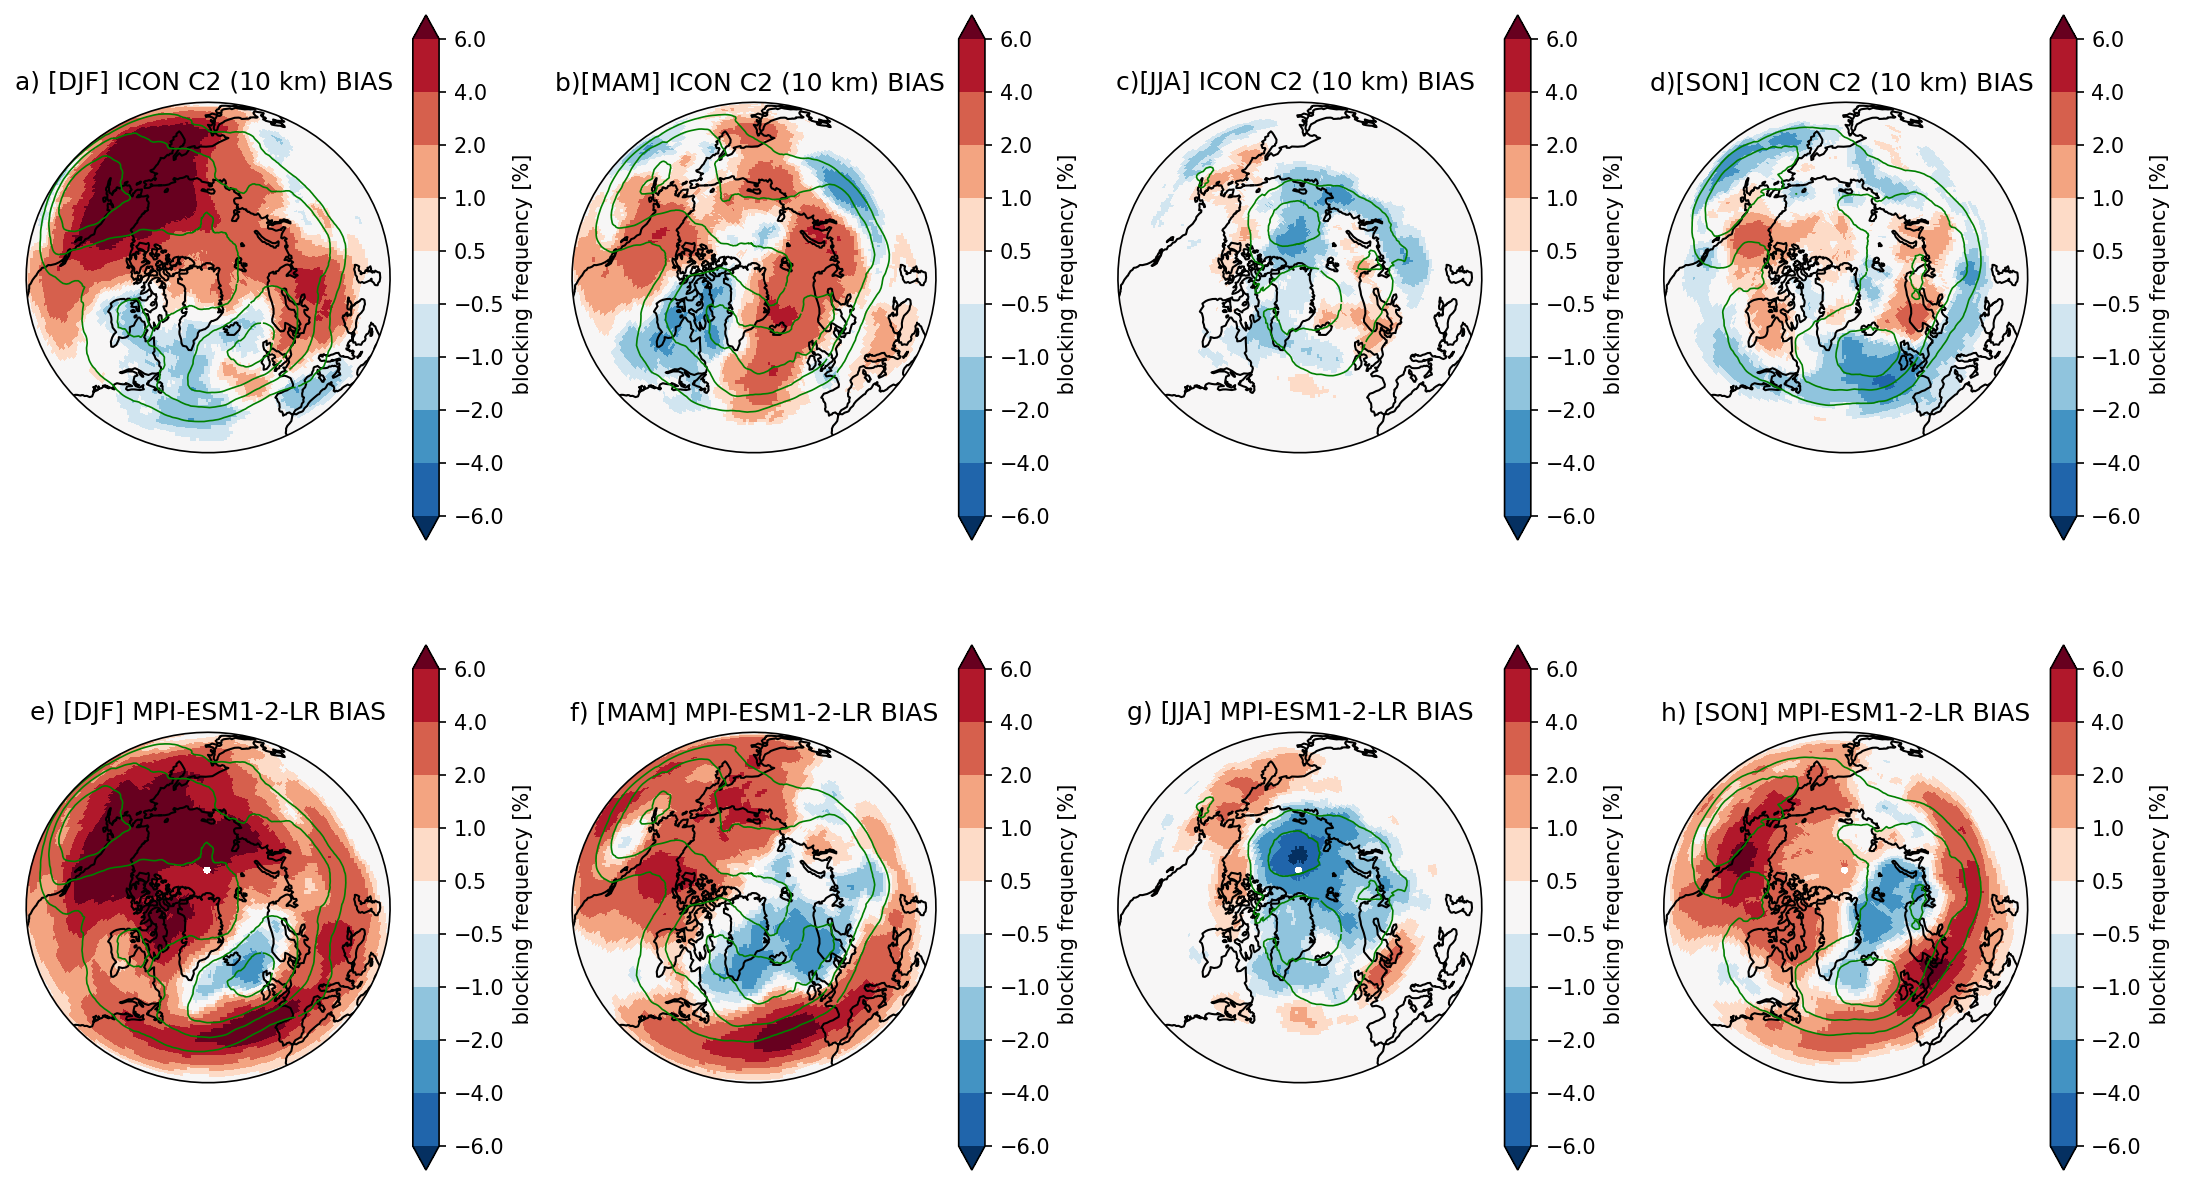

In [56]:
#Methods era5
clevels=[-6,-4,-2,-1,-0.5,0.5,1,2,4,6]
#clevels=[-10,-8,-6,-5,-4,-3,-2,-1.5,-1,1,1.5,2,3,4,5,6,8,10]
mlevels=np.arange(4,24,4)

### Compute a circle in axes coordinates, which we can use as a boundary
### for the map. We can pan/zoom as much as we like - the boundary will be
### permanently circular.
import matplotlib.patches as mpatches
import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

### origin for orthographic projection
lon_0 = -35.0
lat_0 =  70.0

##
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(18, 10),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
#fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.Robinson(central_longitude=0, globe=None)})

###==== first panel
im1=bias_icon_DJF.flag.plot(ax=ax1,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF_ano1.flag.plot.contour(ax=ax1,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('a) [DJF] ICON C2 (10 km) BIAS ')
ax1.set_boundary(circle, transform=ax1.transAxes)

###==== second panel
im1=bias_icon_MAM.flag.plot(ax=ax2,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_MAM_ano1.flag.plot.contour(ax=ax2,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax2.coastlines()
ax2.set_title('b)[MAM] ICON C2 (10 km) BIAS ')
ax2.set_boundary(circle, transform=ax2.transAxes)

###==== third panel
im1=bias_icon_JJA.flag.plot(ax=ax3,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA_ano1.flag.plot.contour(ax=ax3,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax3.coastlines()
ax3.set_title('c)[JJA] ICON C2 (10 km) BIAS ')
ax3.set_boundary(circle, transform=ax3.transAxes)

###==== third panel
im1=bias_icon_SON.flag.plot(ax=ax4,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_SON_ano1.flag.plot.contour(ax=ax4,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax4.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax4.coastlines()
ax4.set_title('d)[SON] ICON C2 (10 km) BIAS ')
ax4.set_boundary(circle, transform=ax4.transAxes)

####==== third panel
im1=bias_cmip6_DJF.flag.plot(ax=ax5,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF_ano1.flag.plot.contour(ax=ax5,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax5.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax5.coastlines()
ax5.set_title('e) [DJF] MPI-ESM1-2-LR BIAS')
ax5.set_boundary(circle, transform=ax5.transAxes)


####==== third panel
im1=bias_cmip6_MAM.flag.plot(ax=ax6,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_MAM_ano1.flag.plot.contour(ax=ax6,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax6.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax6.coastlines()
ax6.set_title('f) [MAM] MPI-ESM1-2-LR BIAS')
ax6.set_boundary(circle, transform=ax6.transAxes)

#####==== fourth panel
im1=bias_cmip6_JJA.flag.plot(ax=ax7,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA_ano1.flag.plot.contour(ax=ax7,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax7.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax7.coastlines()
ax7.set_title('g) [JJA] MPI-ESM1-2-LR BIAS')
ax7.set_boundary(circle, transform=ax7.transAxes)

#####==== fourth panel
im1=bias_cmip6_SON.flag.plot(ax=ax8,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_SON_ano1.flag.plot.contour(ax=ax8,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax8.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax8.coastlines()
ax8.set_title('h) [SON] MPI-ESM1-2-LR BIAS')
ax8.set_boundary(circle, transform=ax8.transAxes)

## Save
plt.savefig('BIAS_contrack_sims_long_full_seas.jpg')


## Compute BIAS in ICON C2 (30 years) - Tempest tool

In [46]:
##== LOAD FREQUENCY  ICON ngc2013
feq_icon_ngc2013_ano2=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/factory/tempest/icon_blocking_climo.nc').load()
feq_icon_ngc2013_DJF_ano2=feq_icon_ngc2013_ano2.seasonalmean_object_id[0,...]*100
feq_icon_ngc2013_MAM_ano2=feq_icon_ngc2013_ano2.seasonalmean_object_id[1,...]*100
feq_icon_ngc2013_JJA_ano2=feq_icon_ngc2013_ano2.seasonalmean_object_id[2,...]*100
feq_icon_ngc2013_SON_ano2=feq_icon_ngc2013_ano2.seasonalmean_object_id[3,...]*100

In [47]:
###frequency in ERA5
feq_era5_ano2=xr.open_dataset('/scratch/b/b382006/obs/era5/factory/z500/tempest/era5_blocking_climo.nc').load()


### prepare cmip6 
###===lon to 0 to 359
feq_era5_ano2['lon']=feq_era5_ano2['lon']+180
feq_era5_ano2=feq_era5_ano2.roll(lon=180)
#feq_cmip6_ano2

sims_lon=feq_icon_ngc2013_ano2.lon
sims_lat=feq_icon_ngc2013_ano2.lat
#print(sims_lon,sims_lat)
feq_era5_reg = feq_era5_ano2.interp(lon=sims_lon,lat=sims_lat)
#feq_cmip6_reg

#
feq_era5_DJF_ano2=feq_era5_reg.seasonalmean_object_id[0,...]*100
feq_era5_MAM_ano2=feq_era5_reg.seasonalmean_object_id[1,...]*100
feq_era5_JJA_ano2=feq_era5_reg.seasonalmean_object_id[2,...]*100
feq_era5_SON_ano2=feq_era5_reg.seasonalmean_object_id[3,...]*100
#feq_era5_ano2

In [48]:
##cmip6
feq_cmip6_ano2=xr.open_dataset('/scratch/b/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/factory/tempest/cmip6_blocking_climo.nc').load()

### prepare cmip6 
###===lon to 0 to 359
feq_cmip6_ano2['lon']=feq_cmip6_ano2['lon']+180
feq_cmip6_ano2=feq_cmip6_ano2.roll(lon=180)
#feq_cmip6_ano2

sims_lon=feq_icon_ngc2013_ano2.lon
sims_lat=feq_icon_ngc2013_ano2.lat
#print(sims_lon,sims_lat)
feq_cmip6_reg = feq_cmip6_ano2.interp(lon=sims_lon,lat=sims_lat)
#feq_cmip6_reg

feq_cmip6_DJF_ano2=feq_cmip6_reg.seasonalmean_object_id[0,...]*100
feq_cmip6_MAM_ano2=feq_cmip6_reg.seasonalmean_object_id[1,...]*100
feq_cmip6_JJA_ano2=feq_cmip6_reg.seasonalmean_object_id[2,...]*100
feq_cmip6_SON_ano2=feq_cmip6_reg.seasonalmean_object_id[3,...]*100
#feq_cmip6_DJF_ano2


In [220]:
### Compute BIAS

In [57]:
#bias_icon =  feq_icon_ngc2013 - feq_era5
bias_icon_DJF =  feq_icon_ngc2013_DJF_ano2 - feq_era5_DJF_ano2
bias_icon_MAM =  feq_icon_ngc2013_MAM_ano2 - feq_era5_MAM_ano2
bias_icon_JJA =  feq_icon_ngc2013_JJA_ano2 - feq_era5_JJA_ano2
bias_icon_SON =  feq_icon_ngc2013_SON_ano2 - feq_era5_SON_ano2

rmse_icon_DJF=rmse(feq_icon_ngc2013_DJF_ano2.sel(lat=slice(0,90)), feq_era5_DJF_ano2.sel(lat=slice(0,90)))
rmse_icon_MAM=rmse(feq_icon_ngc2013_MAM_ano2.sel(lat=slice(0,90)), feq_era5_MAM_ano2.sel(lat=slice(0,90)))
rmse_icon_JJA=rmse(feq_icon_ngc2013_JJA_ano2.sel(lat=slice(0,90)), feq_era5_JJA_ano2.sel(lat=slice(0,90)))
rmse_icon_SON=rmse(feq_icon_ngc2013_SON_ano2.sel(lat=slice(0,90)), feq_era5_SON_ano2.sel(lat=slice(0,90)))
print(rmse_icon_DJF,rmse_icon_MAM,rmse_icon_JJA,rmse_icon_SON)




<xarray.DataArray 'seasonalmean_object_id' ()>
array(1.4106919)
Coordinates:
    time     object 0001-01-01 00:00:00 <xarray.DataArray 'seasonalmean_object_id' ()>
array(1.05418903)
Coordinates:
    time     object 0001-04-01 00:00:00 <xarray.DataArray 'seasonalmean_object_id' ()>
array(0.63711245)
Coordinates:
    time     object 0001-07-01 00:00:00 <xarray.DataArray 'seasonalmean_object_id' ()>
array(0.69281376)
Coordinates:
    time     object 0001-10-01 00:00:00


In [79]:
bias_cmip6_DJF =  feq_cmip6_DJF_ano2 - feq_era5_DJF_ano2
bias_cmip6_MAM =  feq_cmip6_MAM_ano2 - feq_era5_MAM_ano2
bias_cmip6_JJA =  feq_cmip6_JJA_ano2 - feq_era5_JJA_ano2
bias_cmip6_SON =  feq_cmip6_SON_ano2 - feq_era5_SON_ano2


rmse_cmip6_DJF=rmse(feq_cmip6_DJF_ano2.sel(lat=slice(0,90)), feq_era5_DJF_ano2.sel(lat=slice(0,90)))
rmse_cmip6_MAM=rmse(feq_cmip6_MAM_ano2.sel(lat=slice(0,90)), feq_era5_MAM_ano2.sel(lat=slice(0,90)))
rmse_cmip6_JJA=rmse(feq_cmip6_JJA_ano2.sel(lat=slice(0,90)), feq_era5_JJA_ano2.sel(lat=slice(0,90)))
rmse_cmip6_SON=rmse(feq_cmip6_SON_ano2.sel(lat=slice(0,90)), feq_era5_SON_ano2.sel(lat=slice(0,90)))

print(rmse_cmip6_DJF,rmse_cmip6_MAM,rmse_cmip6_JJA,rmse_cmip6_SON)


<xarray.DataArray 'seasonalmean_object_id' ()>
array(0.99152206)
Coordinates:
    time     object 0001-01-01 00:00:00 <xarray.DataArray 'seasonalmean_object_id' ()>
array(1.15945536)
Coordinates:
    time     object 0001-04-01 00:00:00 <xarray.DataArray 'seasonalmean_object_id' ()>
array(0.92103732)
Coordinates:
    time     object 0001-07-01 00:00:00 <xarray.DataArray 'seasonalmean_object_id' ()>
array(0.83706176)
Coordinates:
    time     object 0001-10-01 00:00:00


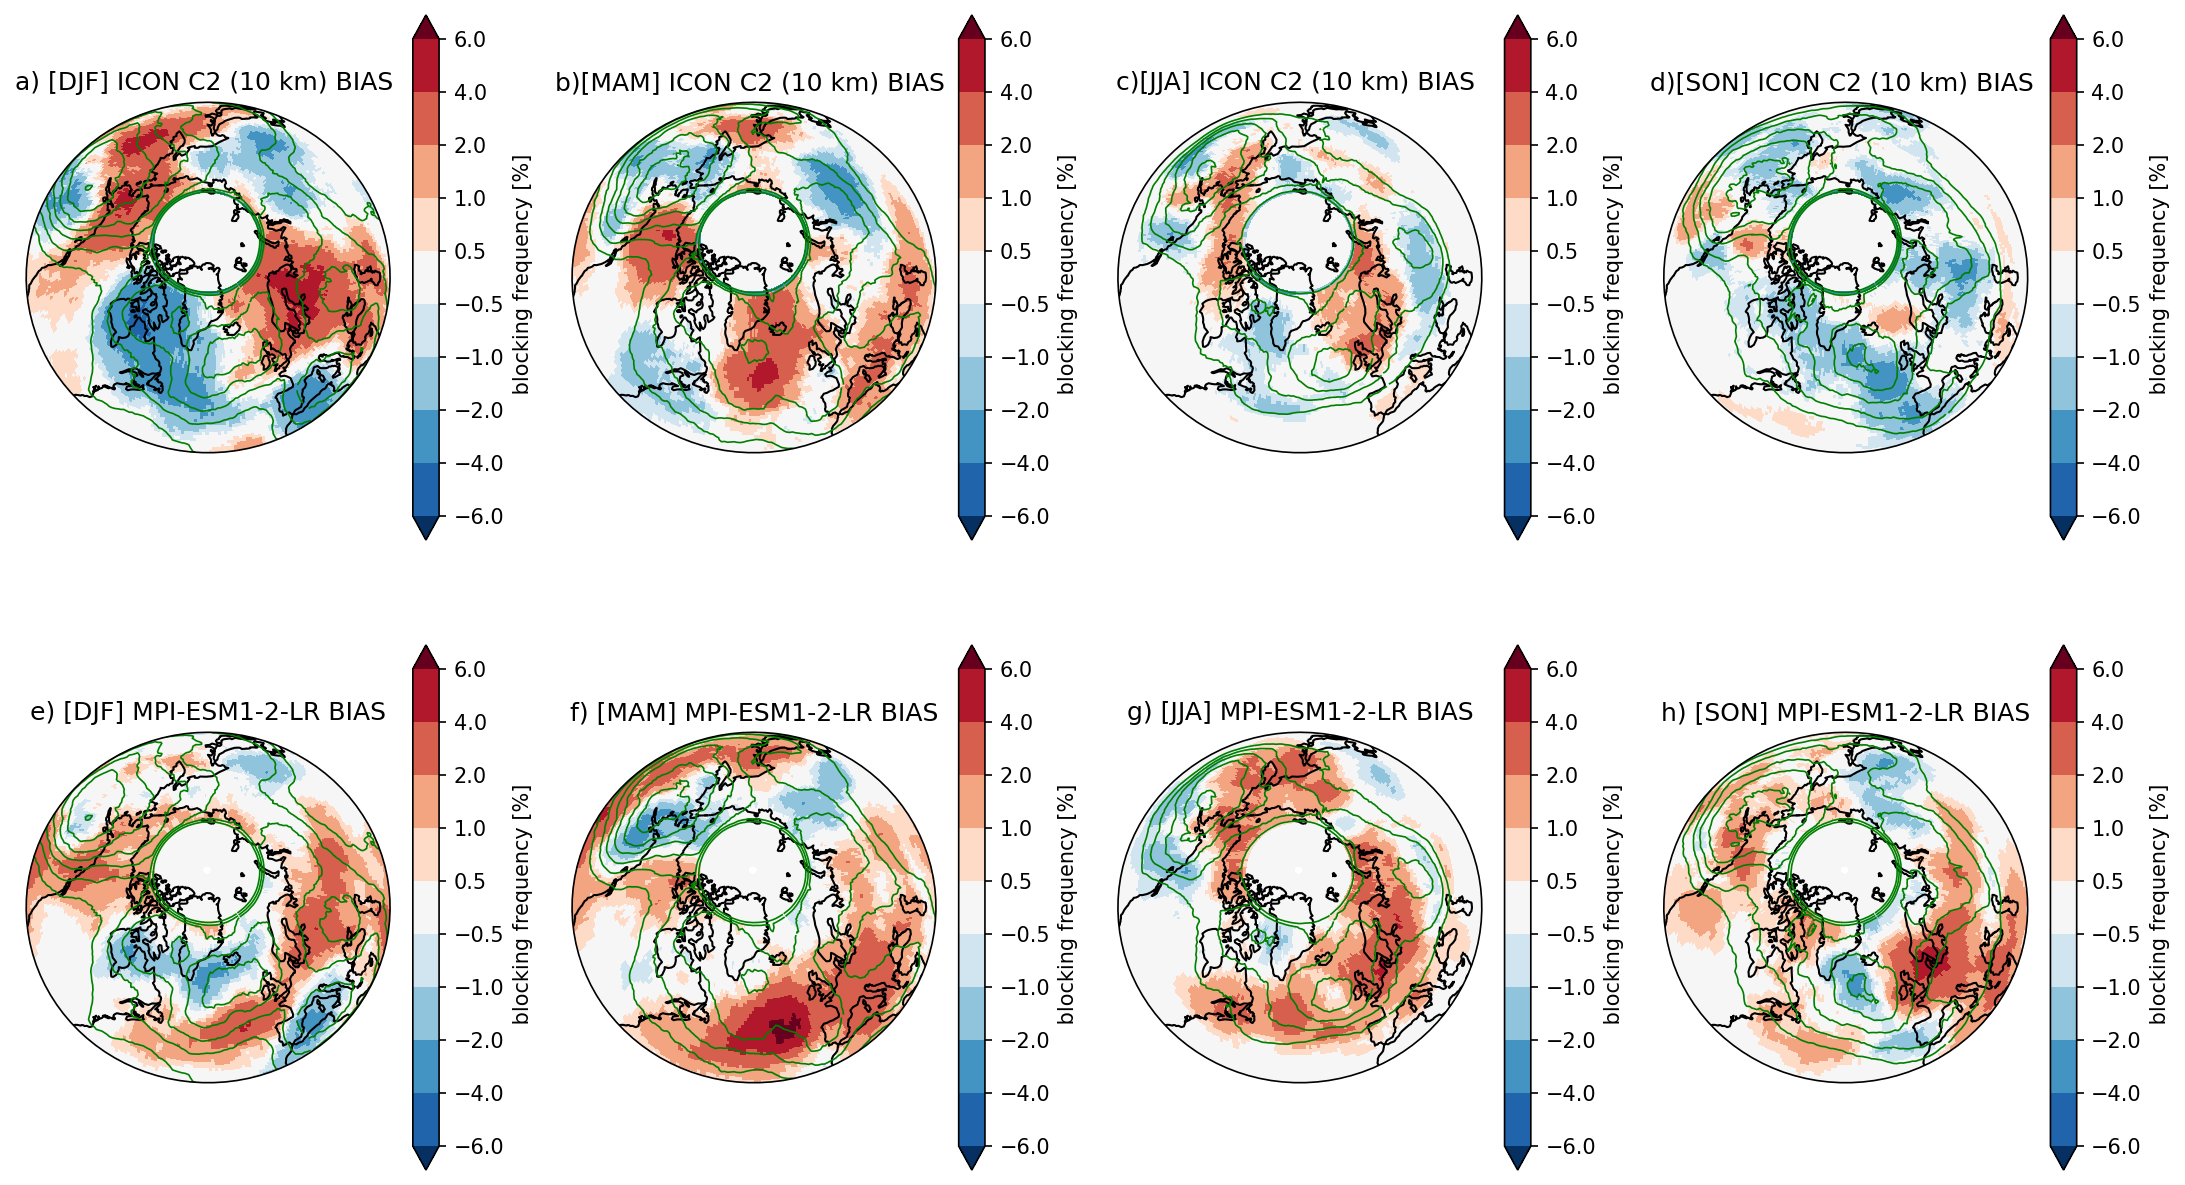

In [59]:
#BIAS in tempeste extremes
clevels=[-6,-4,-2,-1,-0.5,0.5,1,2,4,6]
#clevels=[-10,-8,-6,-5,-4,-3,-2,-1.5,-1,1,1.5,2,3,4,5,6,8,10]
mlevels=np.arange(2,16,2)

##
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(18, 10),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
#fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.Robinson(central_longitude=0, globe=None)})

###==== first panel
im1=bias_icon_DJF.plot(ax=ax1,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF_ano2.plot.contour(ax=ax1,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('a) [DJF] ICON C2 (10 km) BIAS ')
ax1.set_boundary(circle, transform=ax1.transAxes)

###==== second panel
im1=bias_icon_MAM.plot(ax=ax2,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_MAM_ano2.plot.contour(ax=ax2,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax2.coastlines()
ax2.set_title('b)[MAM] ICON C2 (10 km) BIAS ')
ax2.set_boundary(circle, transform=ax2.transAxes)

###==== third panel
im1=bias_icon_JJA.plot(ax=ax3,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA_ano2.plot.contour(ax=ax3,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax3.coastlines()
ax3.set_title('c)[JJA] ICON C2 (10 km) BIAS ')
ax3.set_boundary(circle, transform=ax3.transAxes)

###==== third panel
im1=bias_icon_SON.plot(ax=ax4,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_SON_ano2.plot.contour(ax=ax4,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax4.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax4.coastlines()
ax4.set_title('d)[SON] ICON C2 (10 km) BIAS ')
ax4.set_boundary(circle, transform=ax4.transAxes)

####==== third panel
im1=bias_cmip6_DJF.plot(ax=ax5,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF_ano2.plot.contour(ax=ax5,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax5.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax5.coastlines()
ax5.set_title('e) [DJF] MPI-ESM1-2-LR BIAS')
ax5.set_boundary(circle, transform=ax5.transAxes)


####==== third panel
im1=bias_cmip6_MAM.plot(ax=ax6,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_MAM_ano2.plot.contour(ax=ax6,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax6.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax6.coastlines()
ax6.set_title('f) [MAM] MPI-ESM1-2-LR BIAS')
ax6.set_boundary(circle, transform=ax6.transAxes)

#####==== fourth panel
im1=bias_cmip6_JJA.plot(ax=ax7,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA_ano2.plot.contour(ax=ax7,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax7.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax7.coastlines()
ax7.set_title('g) [JJA] MPI-ESM1-2-LR BIAS')
ax7.set_boundary(circle, transform=ax7.transAxes)

#####==== fourth panel
im1=bias_cmip6_SON.plot(ax=ax8,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_SON_ano2.plot.contour(ax=ax8,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax8.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax8.coastlines()
ax8.set_title('h) [SON] MPI-ESM1-2-LR BIAS')
ax8.set_boundary(circle, transform=ax8.transAxes)
###******
## Save
plt.savefig('BIAS_tempest_sims_long_full_seas.jpg')

## Compute BIAS in ICON C2 (30 years) - Reversal index

In [2]:
##== LOAD FREQUENCY  ICON ngc2013
feq_icon_ngc2013_DJF_abs=xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ABS_Z500/Feq_BLOCKS-icon-ngc2013_DJF.nc').load()
feq_icon_ngc2013_MAM_abs=xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ABS_Z500/Feq_BLOCKS-icon-ngc2013_MAM.nc').load()
feq_icon_ngc2013_JJA_abs=xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ABS_Z500/Feq_BLOCKS-icon-ngc2013_JJA.nc').load()
feq_icon_ngc2013_SON_abs=xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ABS_Z500/Feq_BLOCKS-icon-ngc2013_SON.nc').load()


In [3]:
### ERA5
feq_era5_DJF_abs=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_DJF.nc').load()
feq_era5_MAM_abs=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_MAM.nc').load()
feq_era5_JJA_abs=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_JJA.nc').load()
feq_era5_SON_abs=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_SON.nc').load()

In [7]:
### Compute BIAS

bias_icon_DJF =  feq_icon_ngc2013_DJF_abs - feq_era5_DJF_abs
bias_icon_MAM =  feq_icon_ngc2013_MAM_abs - feq_era5_MAM_abs
bias_icon_JJA = feq_icon_ngc2013_JJA_abs -  feq_era5_JJA_abs
bias_icon_SON = feq_icon_ngc2013_SON_abs -  feq_era5_SON_abs

rmse_icon_DJF=rmse(feq_icon_ngc2013_DJF_abs.sel(lat=slice(0,90)), feq_era5_DJF_abs.sel(lat=slice(0,90)))
rmse_icon_MAM=rmse(feq_icon_ngc2013_MAM_abs.sel(lat=slice(0,90)), feq_era5_MAM_abs.sel(lat=slice(0,90)))
rmse_icon_JJA=rmse(feq_icon_ngc2013_JJA_abs.sel(lat=slice(0,90)), feq_era5_JJA_abs.sel(lat=slice(0,90)))
rmse_icon_SON=rmse(feq_icon_ngc2013_SON_abs.sel(lat=slice(0,90)), feq_era5_SON_abs.sel(lat=slice(0,90)))

print(rmse_icon_DJF,rmse_icon_MAM,rmse_icon_JJA,rmse_icon_SON)


<xarray.Dataset>
Dimensions:   ()
Data variables:
    Blocking  float64 0.5321 <xarray.Dataset>
Dimensions:   ()
Data variables:
    Blocking  float64 0.6801 <xarray.Dataset>
Dimensions:   ()
Data variables:
    Blocking  float64 0.6112 <xarray.Dataset>
Dimensions:   ()
Data variables:
    Blocking  float64 0.407


In [8]:
### CMIP6

### CMIP6 Models 
model='MPI-ESM1-2-LR'
#member_id=['r10i1p1f1', 'r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1']

query = dict(
    source_id=model,  #Only choosing one model here
    member_id=['r10i1p1f1', 'r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1'] # let's restrict us here to only few memebers
    )

feq_cmip6_DJF_tmp=[]
feq_cmip6_MAM_tmp=[]
feq_cmip6_JJA_tmp=[]
feq_cmip6_SON_tmp=[]
key = 'member_id' #set somewhere
for ens in query[key]:
    print(ens)
    feq_tmp1=xr.open_dataset('/work/bm1235/b382006/cmip6/'+model+'/'+ens+'/block/ABS_500/Feq_BLOCKS-cmip6_DJF.nc')
    feq_tmp2=xr.open_dataset('/work/bm1235/b382006/cmip6/'+model+'/'+ens+'/block/ABS_500/Feq_BLOCKS-cmip6_MAM.nc')
    feq_tmp3=xr.open_dataset('/work/bm1235/b382006/cmip6/'+model+'/'+ens+'/block/ABS_500/Feq_BLOCKS-cmip6_JJA.nc')
    feq_tmp4=xr.open_dataset('/work/bm1235/b382006/cmip6/'+model+'/'+ens+'/block/ABS_500/Feq_BLOCKS-cmip6_SON.nc')
    
#    zave_tmp =zave_tmp.rename({'zg500':'z'})

    feq_cmip6_DJF_tmp.append(feq_tmp1.Blocking)
    feq_cmip6_MAM_tmp.append(feq_tmp2.Blocking)
    feq_cmip6_JJA_tmp.append(feq_tmp3.Blocking)
    feq_cmip6_SON_tmp.append(feq_tmp4.Blocking)
 

r10i1p1f1
r1i1p1f1
r2i1p1f1
r3i1p1f1
r4i1p1f1
r5i1p1f1
r6i1p1f1
r7i1p1f1
r8i1p1f1
r9i1p1f1


In [9]:
feq_cmip6_DJF_ens=xr.concat( feq_cmip6_DJF_tmp, "member")
feq_cmip6_MAM_ens=xr.concat( feq_cmip6_MAM_tmp, "member")
feq_cmip6_JJA_ens=xr.concat( feq_cmip6_JJA_tmp, "member")
feq_cmip6_SON_ens=xr.concat( feq_cmip6_SON_tmp, "member")

In [11]:
feq_cmip6_DJF_abs=feq_cmip6_DJF_ens.mean(axis=0)
feq_cmip6_MAM_abs=feq_cmip6_MAM_ens.mean(axis=0)
feq_cmip6_JJA_abs=feq_cmip6_JJA_ens.mean(axis=0)
feq_cmip6_SON_abs=feq_cmip6_SON_ens.mean(axis=0)
feq_cmip6_DJF_abs

<xarray.DataArray 'Blocking' (lat: 180, lon: 360)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [12]:
### Compute BIAS
bias_cmip6_DJF =  feq_cmip6_DJF_abs - feq_era5_DJF_abs
bias_cmip6_MAM =  feq_cmip6_MAM_abs - feq_era5_MAM_abs
bias_cmip6_JJA = feq_cmip6_JJA_abs -  feq_era5_JJA_abs
bias_cmip6_SON = feq_cmip6_SON_abs -  feq_era5_SON_abs

In [13]:
### Agreement among members
bias_DJF_ens = feq_cmip6_DJF_ens - feq_era5_DJF_abs
bias_MAM_ens = feq_cmip6_MAM_ens - feq_era5_MAM_abs
bias_JJA_ens = feq_cmip6_JJA_ens - feq_era5_JJA_abs
bias_SON_ens = feq_cmip6_SON_ens - feq_era5_SON_abs

len(bias_DJF_ens.lon)
bias_DJF_ens

<xarray.Dataset>
Dimensions:   (lon: 360, lat: 180, member: 10)
Coordinates:
  * lon       (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: member
Data variables:
    Blocking  (member, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan

In [14]:
percent=80
#binary=np.zeros((len(era5_lon),len(era5_lat)))
cmip6_DJF_binary=np.zeros((len(bias_DJF_ens.lat),len(bias_DJF_ens.lon)))
for x in range(0,len(bias_DJF_ens.lon)):
    for y in range(0,len(bias_DJF_ens.lat)):
#        print(x,y)
        b=bias_DJF_ens['Blocking'][:,y,x]
#        b=bias_zmod_ens['z_bin'][:,y,x]
        count1=b[b>0]
        count2=b[b<0]
        p1=(len(count1)/len(b))*100
        p2=(len(count2)/len(b))*100
        
        if p1 > percent or p2 > percent:
            cmip6_DJF_binary[y,x]=1

In [15]:
cmip6_MAM_binary=np.zeros((len(bias_MAM_ens.lat),len(bias_MAM_ens.lon)))
for x in range(0,len(bias_MAM_ens.lon)):
    for y in range(0,len(bias_MAM_ens.lat)):
#        print(x,y)
        b=bias_MAM_ens['Blocking'][:,y,x]
#        b=bias_zmod_ens['z_bin'][:,y,x]
        count1=b[b>0]
        count2=b[b<0]
        p1=(len(count1)/len(b))*100
        p2=(len(count2)/len(b))*100
        
        if p1 > percent or p2 > percent:
            cmip6_MAM_binary[y,x]=1

In [16]:
cmip6_JJA_binary=np.zeros((len(bias_JJA_ens.lat),len(bias_JJA_ens.lon)))
for x in range(0,len(bias_JJA_ens.lon)):
    for y in range(0,len(bias_JJA_ens.lat)):
#        print(x,y)
        b=bias_JJA_ens['Blocking'][:,y,x]
#        b=bias_zmod_ens['z_bin'][:,y,x]
        count1=b[b>0]
        count2=b[b<0]
        p1=(len(count1)/len(b))*100
        p2=(len(count2)/len(b))*100
        
        if p1 > percent or p2 > percent:
            cmip6_JJA_binary[y,x]=1

In [17]:
cmip6_SON_binary=np.zeros((len(bias_SON_ens.lat),len(bias_SON_ens.lon)))
for x in range(0,len(bias_SON_ens.lon)):
    for y in range(0,len(bias_SON_ens.lat)):
#        print(x,y)
        b=bias_SON_ens['Blocking'][:,y,x]
#        b=bias_zmod_ens['z_bin'][:,y,x]
        count1=b[b>0]
        count2=b[b<0]
        p1=(len(count1)/len(b))*100
        p2=(len(count2)/len(b))*100
        
        if p1 > percent or p2 > percent:
            cmip6_SON_binary[y,x]=1

In [18]:
#cmip6_DJF_binary

In [19]:
###Only one member   
#feq_cmip6_DJF_abs=xr.open_dataset('/work/bm1235/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ABS_500/Feq_BLOCKS-cmip6_DJF.nc').load()
#feq_cmip6_MAM_abs=xr.open_dataset('/work/bm1235/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ABS_500/Feq_BLOCKS-cmip6_MAM.nc').load()
#feq_cmip6_JJA_abs=xr.open_dataset('/work/bm1235/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ABS_500/Feq_BLOCKS-cmip6_JJA.nc').load()
#feq_cmip6_SON_abs=xr.open_dataset('/work/bm1235/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ABS_500/Feq_BLOCKS-cmip6_SON.nc').load()

### Compute BIAS
#bias_cmip6_DJF =  feq_cmip6_DJF_abs - feq_era5_DJF_abs
#bias_cmip6_MAM =  feq_cmip6_MAM_abs - feq_era5_MAM_abs
#bias_cmip6_JJA = feq_cmip6_JJA_abs -  feq_era5_JJA_abs
#bias_cmip6_SON = feq_cmip6_SON_abs -  feq_era5_SON_abs

rmse_cmip6_DJF=rmse(feq_cmip6_DJF_abs.sel(lat=slice(0,90)), feq_era5_DJF_abs.sel(lat=slice(0,90)))
rmse_cmip6_MAM=rmse(feq_cmip6_MAM_abs.sel(lat=slice(0,90)), feq_era5_MAM_abs.sel(lat=slice(0,90)))
rmse_cmip6_JJA=rmse(feq_cmip6_JJA_abs.sel(lat=slice(0,90)), feq_era5_JJA_abs.sel(lat=slice(0,90)))
rmse_cmip6_SON=rmse(feq_cmip6_SON_abs.sel(lat=slice(0,90)), feq_era5_SON_abs.sel(lat=slice(0,90)))

print(rmse_cmip6_DJF,rmse_cmip6_MAM,rmse_cmip6_JJA,rmse_cmip6_SON)
#feq_cmip6_MAM_abs.Blocking.plot()
#feq_cmip6_DJF_abs.Blocking.plot()

<xarray.Dataset>
Dimensions:   ()
Data variables:
    Blocking  float64 0.3907 <xarray.Dataset>
Dimensions:   ()
Data variables:
    Blocking  float64 0.4861 <xarray.Dataset>
Dimensions:   ()
Data variables:
    Blocking  float64 0.7974 <xarray.Dataset>
Dimensions:   ()
Data variables:
    Blocking  float64 0.4138


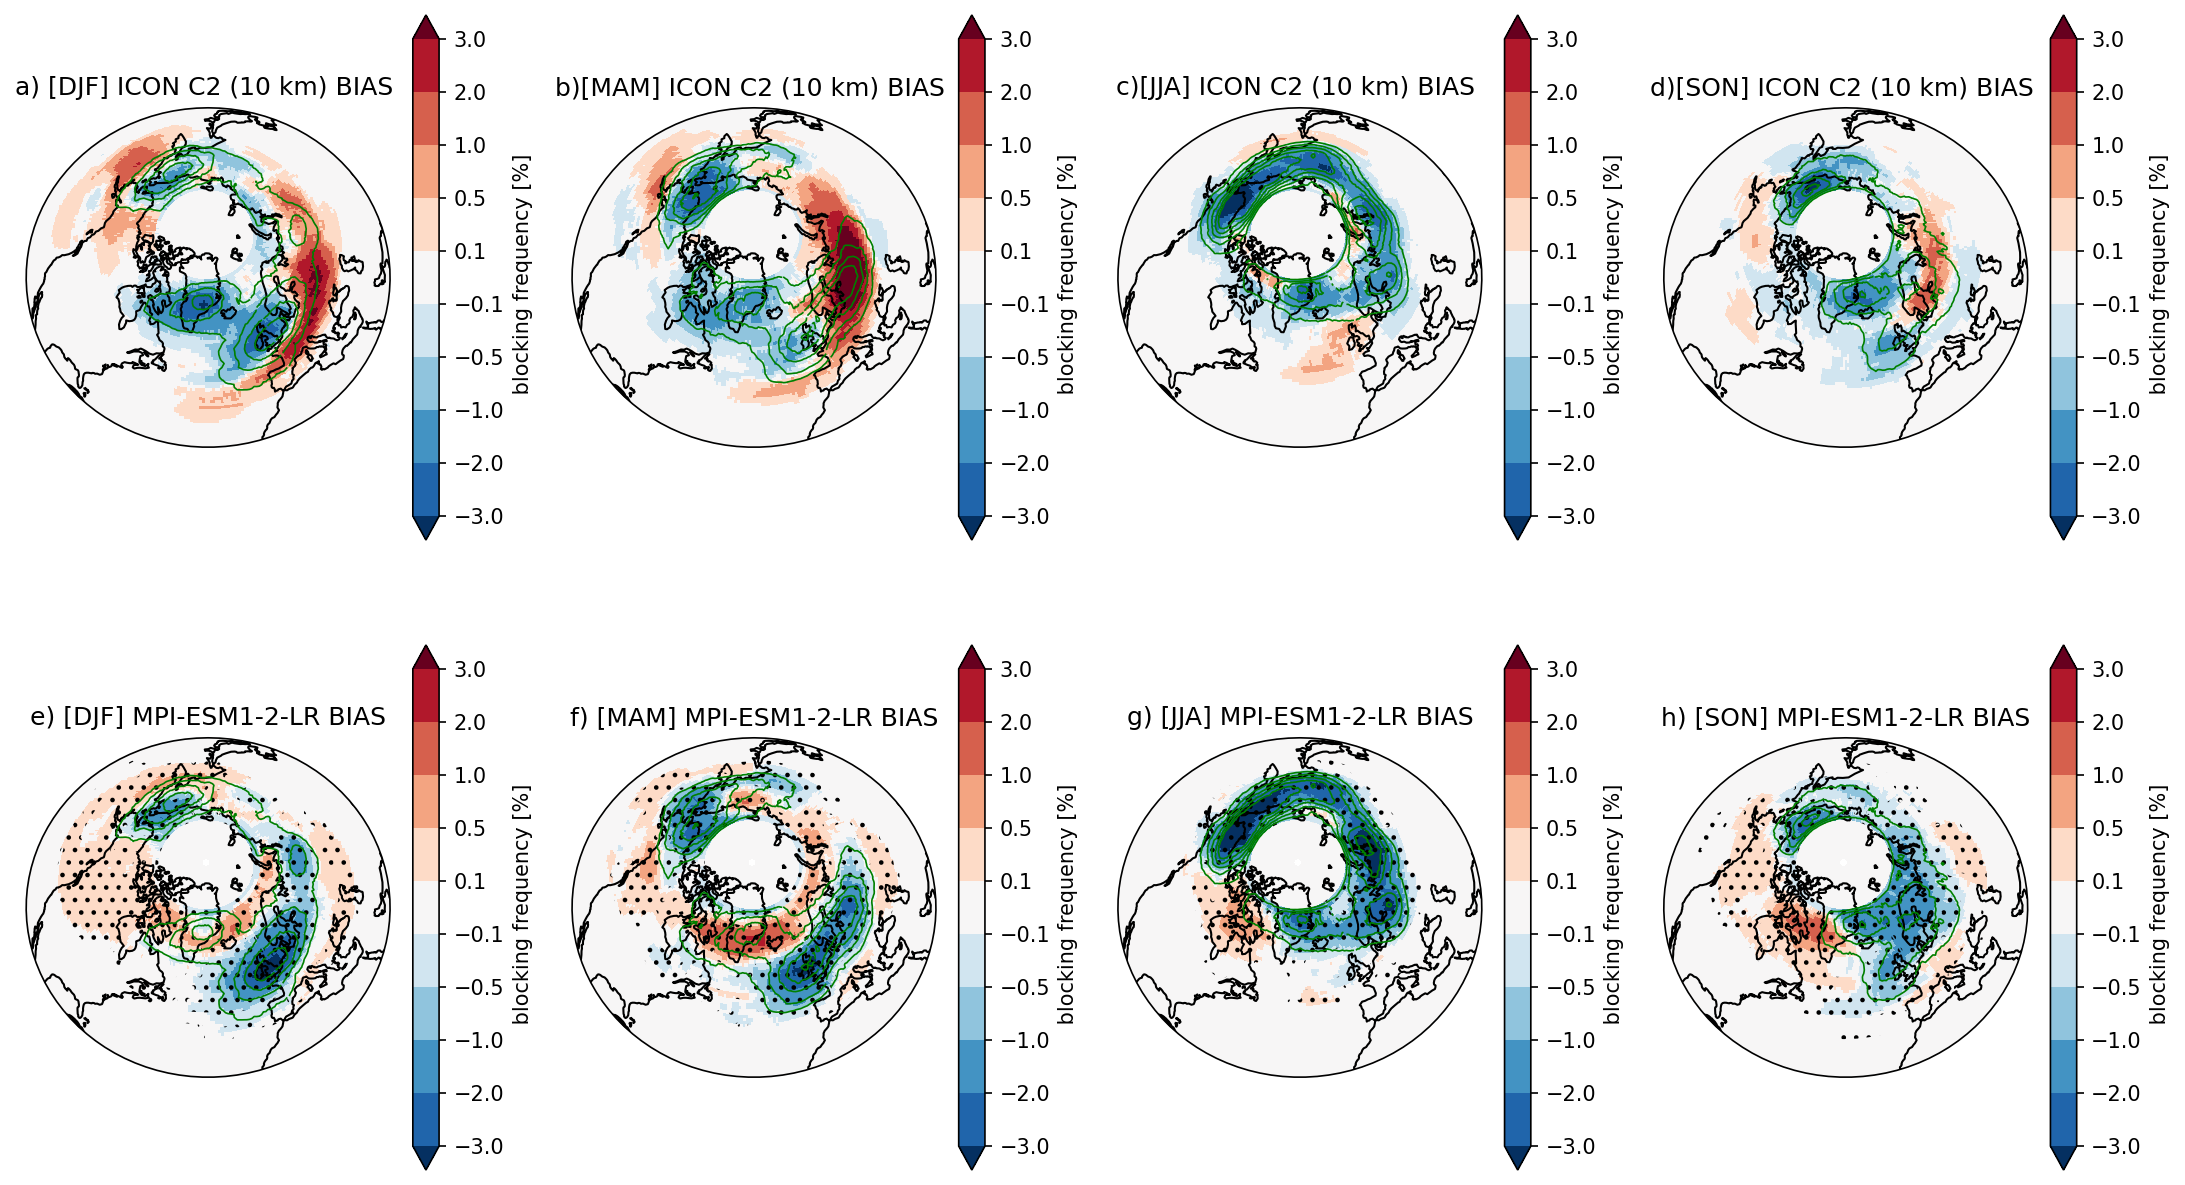

In [20]:
#****
#BIAS in TMD2
#********

import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import cartopy.feature as cfeature

clevels=[-3,-2,-1,-0.5,-0.1,0.1,0.5,1,2,3]
#clevels=[-10,-8,-6,-5,-4,-3,-2,-1.5,-1,1,1.5,2,3,4,5,6,8,10]
mlevels=np.arange(1,6,1)

lon_0 = -35.0
lat_0 =  70.0

### Compute a circle in axes coordinates, which we can use as a boundary
### for the map. We can pan/zoom as much as we like - the boundary will be
### permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)


##
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(18, 10),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
#fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.Robinson(central_longitude=0, globe=None)})

###==== first panel
im1=bias_icon_DJF.Blocking.plot(ax=ax1,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF_abs.Blocking.plot.contour(ax=ax1,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax1.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('a) [DJF] ICON C2 (10 km) BIAS ')
ax1.set_boundary(circle, transform=ax1.transAxes)

###==== second panel
im1=bias_icon_MAM.Blocking.plot(ax=ax2,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_MAM_abs.Blocking.plot.contour(ax=ax2,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax2.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax2.coastlines()
ax2.set_title('b)[MAM] ICON C2 (10 km) BIAS ')
ax2.set_boundary(circle, transform=ax2.transAxes)

###==== third panel
im1=bias_icon_JJA.Blocking.plot(ax=ax3,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA_abs.Blocking.plot.contour(ax=ax3,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax3.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax3.coastlines()
ax3.set_title('c)[JJA] ICON C2 (10 km) BIAS ')
ax3.set_boundary(circle, transform=ax3.transAxes)

###==== third panel
im1=bias_icon_SON.Blocking.plot(ax=ax4,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_SON_abs.Blocking.plot.contour(ax=ax4,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax4.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax4.coastlines()
ax4.set_title('d)[SON] ICON C2 (10 km) BIAS ')
ax4.set_boundary(circle, transform=ax4.transAxes)

####==== third panel
im1=bias_cmip6_DJF.Blocking.plot(ax=ax5,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_DJF_abs.Blocking.plot.contour(ax=ax5,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax5.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax5.coastlines()
ax5.set_title('e) [DJF] MPI-ESM1-2-LR BIAS')
ax5.set_boundary(circle, transform=ax5.transAxes)

density=2
ax5.contourf(
    bias_DJF_ens.lon, bias_DJF_ens.lat, cmip6_DJF_binary,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)

#ax5.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
#ax5.set_boundary(circle, transform=ax1.transAxes)

####==== third panel
im1=bias_cmip6_MAM.Blocking.plot(ax=ax6,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_MAM_abs.Blocking.plot.contour(ax=ax6,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax6.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax6.coastlines()
ax6.set_title('f) [MAM] MPI-ESM1-2-LR BIAS')
ax6.set_boundary(circle, transform=ax6.transAxes)

density=2
ax6.contourf(
    bias_MAM_ens.lon, bias_MAM_ens.lat, cmip6_MAM_binary,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)

#####==== fourth panel
im1=bias_cmip6_JJA.Blocking.plot(ax=ax7,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_JJA_abs.Blocking.plot.contour(ax=ax7,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax7.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax7.coastlines()
ax7.set_title('g) [JJA] MPI-ESM1-2-LR BIAS')
ax7.set_boundary(circle, transform=ax7.transAxes)

density=2
ax7.contourf(
    bias_JJA_ens.lon, bias_JJA_ens.lat, cmip6_JJA_binary,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)

#####==== fourth panel
im1=bias_cmip6_SON.Blocking.plot(ax=ax8,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
feq_era5_SON_abs.Blocking.plot.contour(ax=ax8,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax8.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax8.coastlines()
ax8.set_title('h) [SON] MPI-ESM1-2-LR BIAS')
ax8.set_boundary(circle, transform=ax8.transAxes)

density=2
ax8.contourf(
    bias_SON_ens.lon, bias_SON_ens.lat, cmip6_SON_binary,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)


## Save
plt.savefig('BIAS_tmd2_sims_long_full_seas.jpg')

# spatial variability contrack by season

In [3]:
### RENALYSIS: ERA5  ##############################

sufix="DJF"
if sufix=="DJF":
    seas=[1,2,12]
if sufix=="MAM":
    seas=[3,4,5]
if sufix=="JJA":
    seas=[6,7,8]
if sufix=="SON":
    seas=[9,10,11]
# Get CSV files list from a folder

###ERA5 dataset
blocks=xr.open_mfdataset("/work/bm1235/b382006/era5/block/ANO_Z500/BLOCKS-era5-ano_6h-*nc")

# select only season months
blocks_era5 = blocks.sel(time=blocks.time.dt.month.isin(seas))


###==rename
blocks_era5=blocks_era5.rename({'longitude':'lon',
                       'latitude':'lat'
                       })

###===lon to 0 to 359
blocks_era5['lon']=blocks_era5['lon']+180
blocks_era5=blocks_era5.roll(lon=180)


/fastdata/bm1235/python_environments/hamburg-hackathon/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'rasterio' loading failed:
No module named 'affine'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
#Accumulate era5
ntime_era5 =len(blocks_era5.time)
feq_era5 = xr.where(blocks_era5['flag']>1,1,0).sum(dim='time')/ntime_era5*100

### loading coordinates to interpolate
#feq_tmp=xr.open_dataset('/work/bm1235/b382006/regridding/cycle2/icon/ngc2013_10km_to_1degree/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
feq_tmp=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_'+sufix+'_1979-2014.nc').load()
sims_lon=feq_tmp.lon
sims_lat=feq_tmp.lat

### Interpolating
feq_era5_reg = feq_era5.interp(lon=sims_lon,lat=sims_lat)

In [6]:
#feq_era5_reg

In [8]:
### FIRST MODEL: ICON C2 NGC2013 ##############################

### Dataset
blocks=xr.open_mfdataset("/work/bm1235/b382006/regridding/cycle2/icon/ngc2013_10km_to_1degree/block/ANO_Z500/BLOCKS-icon-*nc")

# select only season months
blocks_ngc2013 = blocks.sel(time=blocks.time.dt.month.isin(seas))

#set_random
tim_rdms=np.random.choice(blocks_ngc2013.time.size, size=1500, replace=False)
blocks_ngc2013_sample=blocks_ngc2013.flag[tim_rdms,:,:]

cntime_ngc2013 =len(blocks_ngc2013_sample.time)
feq_ngc2013_sample = xr.where(blocks_ngc2013_sample>1,1,0).sum(dim='time')/cntime_ngc2013*100
#feq_ngc2013_sample


/fastdata/bm1235/python_environments/hamburg-hackathon/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]


In [10]:
### SECOND MODEL: ICON C3 NGC3028 ##############################
####===================================

### Dataset
blocks=xr.open_mfdataset("/work/bm1235/b382006/regridding/cycle3/ngc3028/block/ANO_Z500/BLOCKS-icon-ngc3028*nc")

# select only season months
blocks_ngc3028 = blocks.sel(time=blocks.time.dt.month.isin(seas))


ntime_ngc3028 =len(blocks_ngc3028.time)
feq_ngc3028 = xr.where(blocks_ngc3028>1,1,0).sum(dim='time')/ntime_ngc3028*100
#feq_ngc3028

### loading coordinates to interpolate
##feq_tmp=xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
feq_tmp=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_'+sufix+'_1979-2014.nc').load()
sims_lon=feq_tmp.lon
sims_lat=feq_tmp.lat

### Interpolating
feq_ngc3028_reg = feq_ngc3028.interp(lon=sims_lon,lat=sims_lat)
#feq_ngc3028_reg

In [11]:
### THIRD MODEL: IFS 4.4 FESOM 5 ##############################
####===================================

### Dataset
blocks=xr.open_mfdataset("/work/bm1235/b382006/regridding/cycle3/IFS_4.4-FESOM_5/block/ANO_Z500/BLOCKS-ifs-*nc")

# select only season months
blocks_ifs4 = blocks.sel(time=blocks.time.dt.month.isin(seas))


ntime_ifs4 =len(blocks_ifs4.time)
feq_ifs4 = xr.where(blocks_ifs4>1,1,0).sum(dim='time')/ntime_ifs4*100

### loading coordinates to interpolate
##feq_tmp=xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
feq_tmp=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_'+sufix+'_1979-2014.nc').load()
sims_lon=feq_tmp.lon
sims_lat=feq_tmp.lat

### Interpolating
feq_ifs4_reg = feq_ifs4.interp(lon=sims_lon,lat=sims_lat)

In [12]:
### FOURTH MODEL: IFS 28 FESOM 25 ##############################
####===================================

### Dataset
blocks=xr.open_mfdataset('/work/bm1235/b382006/regridding/cycle3/IFS_28-NEMO_25/block/ANO_Z500/BLOCKS-ifs-*nc')

# select only season months
blocks_ifs28 = blocks.sel(time=blocks.time.dt.month.isin(seas))

ntime_ifs28 =len(blocks_ifs28.time)
feq_ifs28 = xr.where(blocks_ifs28>1,1,0).sum(dim='time')/ntime_ifs28*100

### loading coordinates to interpolate
#feq_tmp=xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
feq_tmp=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_'+sufix+'_1979-2014.nc').load()
sims_lon=feq_tmp.lon
sims_lat=feq_tmp.lat

### Interpolating
feq_ifs28_reg = feq_ifs28.interp(lon=sims_lon,lat=sims_lat)


In [13]:
### CMIP6 MODELS: MPI-ESM1-2-LR ##############################
####===================================

###ERA5 dataset
blocks=xr.open_mfdataset('/work/bm1235/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ANO_Z500/BLOCKS-MPI-ESM1-2-LR*nc')

# select only season months
blocks_mpi = blocks.sel(time=blocks.time.dt.month.isin(seas))

###===lon to 0 to 359
blocks_mpi['lon']=blocks_mpi['lon']+180
blocks_mpi=blocks_mpi.roll(lon=180)

#set_random
tim_rdms=np.random.choice(blocks_mpi.time.size, size=1500, replace=False)
blocks_mpi_sample=blocks_mpi.flag[tim_rdms,:,:]

ntime_mpi =len(blocks_mpi_sample.time)
feq_mpi_sample = xr.where(blocks_mpi_sample>1,1,0).sum(dim='time')/ntime_mpi*100

### loading coordinates to interpolate
#feq_tmp=xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
feq_tmp=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_'+sufix+'_1979-2014.nc').load()
sims_lon=feq_tmp.lon
sims_lat=feq_tmp.lat

### Interpolating
feq_mpi_reg = feq_mpi_sample.interp(lon=sims_lon,lat=sims_lat)

/fastdata/bm1235/python_environments/hamburg-hackathon/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]


In [14]:
### COMPUTE BIAS
cbias_ngc2013 = (feq_ngc2013_sample - feq_era5_reg).compute()
cbias_ngc3028 = (feq_ngc3028_reg - feq_era5_reg).compute()
cbias_ifs4 = (feq_ifs4_reg - feq_era5_reg).compute()
cbias_ifs28 = (feq_ifs28_reg- feq_era5_reg).compute()
cbias_mpi = (feq_mpi_reg - feq_era5_reg).compute()

In [15]:
#cbias_ngc2013
#feq_ngc2013_sample
cbias_ifs4
cbias_ifs28
feq_mpi_sample
#cbias_mpi.plot()

<xarray.DataArray 'flag' (lat: 180, lon: 360)>
dask.array<mul, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 86.0 87.0 88.0 89.0

### Compute range (max,min) seasonal in ERA5 and compare with each simulation to see if they are in the ERA5 variability

In [16]:
###assign group by year to compute range
### first, labels to 0,1
red_era5=xr.where(blocks_era5['flag']>1,1,0)

byear_era5=red_era5.groupby('time.year').mean(dim='time')*100


### loading coordinates to interpolate
##feq_tmp=xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
feq_tmp=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_'+sufix+'_1979-2014.nc').load()
sims_lon=feq_tmp.lon
sims_lat=feq_tmp.lat

###interpolate era5 group yearly
byear_era5_reg = byear_era5.interp(lon=sims_lon,lat=sims_lat)

###find the range to compare with models
feq_era5_reg_max=byear_era5_reg.max(dim="year") 
feq_era5_reg_min=byear_era5_reg.min(dim="year")

### Compute +-2 std deviation in ERA5 and compare with each simulation to see if they are within era5 variability

In [17]:
### first, labels to 0,1
red_era5=xr.where(blocks_era5['flag']>1,1,0)

byear_era5=red_era5.groupby('time.year').mean(dim='time')*100


### loading coordinates to interpolate
#feq_tmp=xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
feq_tmp=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_'+sufix+'_1979-2014.nc').load()
sims_lon=feq_tmp.lon
sims_lat=feq_tmp.lat

###interpolate era5 group yearly
byear_era5_reg = byear_era5.interp(lon=sims_lon,lat=sims_lat)

###find the range to compare with models
feq_era5_reg_plus_2sd=(feq_era5_reg + (2*byear_era5_reg.std(dim="year"))).compute()
feq_era5_reg_minus_2sd=(feq_era5_reg - (2*byear_era5_reg.std(dim="year"))).compute()

In [18]:
#feq_era5_reg_max.plot()

In [19]:
#(feq_era5_reg_plus_2sd).plot()

In [20]:
#feq_era5_reg_min.plot()

In [21]:
#(feq_era5_reg_minus_2sd).plot(levels=np.arange(0,1,0.1))
#cbias_ngc2013

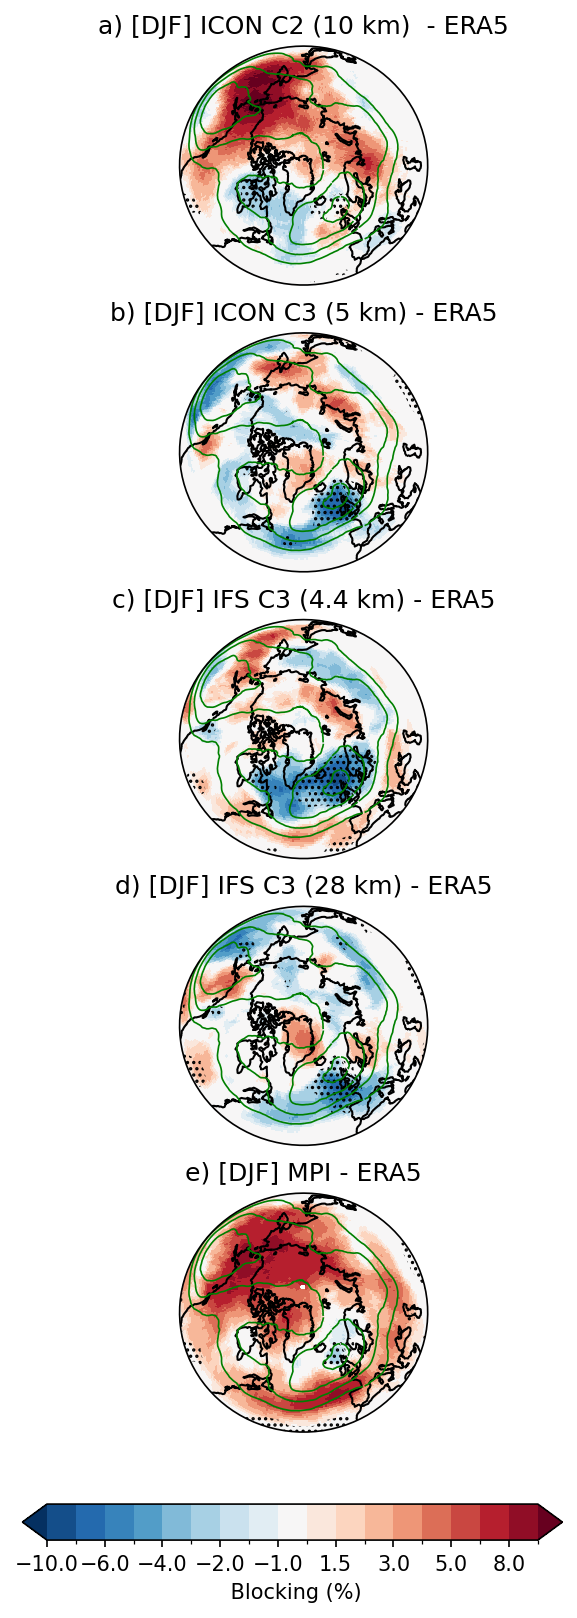

In [28]:
###### ANO Z500 index plot in DJF
#sufix='DJF'
clevels=[-10,-8,-6,-5,-4,-3,-2,-1.5,-1,1,1.5,2,3,4,5,6,8,10]
mlevels=np.arange(4,24,4)

### Compute a circle in axes coordinates, which we can use as a boundary
### for the map. We can pan/zoom as much as we like - the boundary will be
### permanently circular.
import matplotlib.patches as mpatches
import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

### origin for orthographic projection
lon_0 = -35.0
lat_0 =  70.0

##
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(6, 12),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(6, 12), dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
###==== first panel
im1=cbias_ngc2013.plot(ax=ax1,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_reg.plot.contour(ax=ax1,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())

density=4
ax1.contourf(
    cbias_ngc2013.lon, cbias_ngc2013.lat, cbias_ngc2013 > feq_era5_reg_plus_2sd,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)

ax1.contourf(
    cbias_ngc2013.lon, cbias_ngc2013.lat, cbias_ngc2013 < feq_era5_reg_minus_2sd,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)

ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax1.coastlines();
ax1.set_title('a) ['+sufix+'] ICON C2 (10 km)  - ERA5')
ax1.set_boundary(circle, transform=ax1.transAxes)


###==== second panel
im2=cbias_ngc3028.flag.plot(ax=ax2,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_reg.plot.contour(ax=ax2,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#feq_ngc3028_reg.flag.plot.contour(ax=ax2,colors='r', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())

density=4
ax2.contourf(
    cbias_ngc3028.lon, cbias_ngc3028.lat, cbias_ngc3028.flag > feq_era5_reg_plus_2sd,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)

ax2.contourf(
    cbias_ngc3028.lon, cbias_ngc3028.lat, cbias_ngc3028.flag < feq_era5_reg_minus_2sd,
    transform=ccrs.PlateCarree(),
    colors='none',
#    levels=[-1.5,-0.5],
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax2.coastlines();
ax2.set_title('b) ['+sufix+'] ICON C3 (5 km) - ERA5')
ax2.set_boundary(circle, transform=ax2.transAxes)

###==== third panel
im3=cbias_ifs4.flag.plot(ax=ax3,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_reg.plot.contour(ax=ax3,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())

density=4
ax3.contourf(
    cbias_ifs4.lon, cbias_ifs4.lat, cbias_ifs4.flag > feq_era5_reg_plus_2sd,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)

ax3.contourf(
    cbias_ifs4.lon, cbias_ifs4.lat, cbias_ifs4.flag < feq_era5_reg_minus_2sd,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax3.coastlines();
ax3.set_title('c) ['+sufix+'] IFS C3 (4.4 km) - ERA5')
ax3.set_boundary(circle, transform=ax3.transAxes)

###==== fourth panel
im4=cbias_ifs28.flag.plot(ax=ax4,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_reg.plot.contour(ax=ax4,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())

density=4
ax4.contourf(
    cbias_ifs28.lon, cbias_ifs28.lat, cbias_ifs28.flag > feq_era5_reg_plus_2sd,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax4.contourf(
    cbias_ifs28.lon, cbias_ifs28.lat, cbias_ifs28.flag < feq_era5_reg_minus_2sd,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax4.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax4.coastlines();
ax4.set_title('d) ['+sufix+'] IFS C3 (28 km) - ERA5')
ax4.set_boundary(circle, transform=ax4.transAxes)

###==== fifth panel
im5=cbias_mpi.plot(ax=ax5,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_reg.plot.contour(ax=ax5,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())

density=4
ax5.contourf(
    cbias_mpi.lon, cbias_mpi.lat, cbias_mpi > feq_era5_reg_plus_2sd,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax5.contourf(
    cbias_mpi.lon, cbias_mpi.lat, cbias_mpi < feq_era5_reg_minus_2sd,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax5.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax5.coastlines();
ax5.set_title('e) ['+sufix+'] MPI - ERA5')
ax5.set_boundary(circle, transform=ax5.transAxes)

###=== Add colorbar
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # Left, bottom, width, height.
cbar = fig.colorbar(im2, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label(' Blocking (%)')

#plt.savefig('ano-blocks_vary_'+sufix+'_std.jpg')

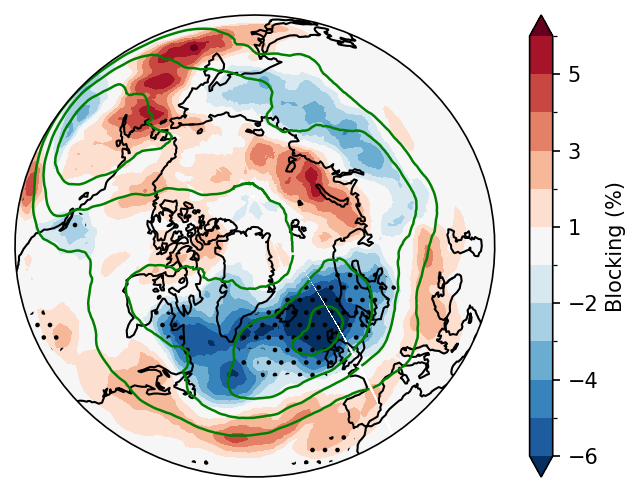

In [29]:
###### ANO Z500 index plot in  [DJF] only one model
#sufix='DJF'
clevels=[-6,-5,-4,-3,-2,-1,1,2,3,4,5,6]
mlevels=np.arange(4,24,4)

### Compute a circle in axes coordinates, which we can use as a boundary
### for the map. We can pan/zoom as much as we like - the boundary will be
### permanently circular.
import matplotlib.patches as mpatches
import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

### origin for orthographic projection
lon_0 = -35.0
lat_0 =  70.0

##
fig, ax3 = plt.subplots(1, 1, figsize=(6, 4),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(6, 12), dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})


###==== third panel
im3=cbias_ifs4.flag.plot.contourf(ax=ax3,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_reg.plot.contour(ax=ax3,colors='g', linewidths=1.2, levels=mlevels, transform=ccrs.PlateCarree())

density=2
ax3.contourf(
    cbias_ifs4.lon, cbias_ifs4.lat, cbias_ifs4.flag > feq_era5_reg_plus_2sd,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)

ax3.contourf(
    cbias_ifs4.lon, cbias_ifs4.lat, cbias_ifs4.flag < feq_era5_reg_minus_2sd,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax3.coastlines();
#ax3.set_title('c) ['+sufix+'] IFS C3 (4.4 km) - ERA5')
ax3.set_boundary(circle, transform=ax3.transAxes)
cbar=plt.colorbar(im3,ax=ax3, orientation="vertical", pad=.05)
cbar.set_label('Blocking (%)')

## spatial variability TMD2 ( REVERSAL INDEX)

In [31]:
### RENALYSIS: ERA5  ##############################

sufix="DJF"
if sufix=="DJF":
    seas=[1,2,12]
if sufix=="MAM":
    seas=[3,4,5]
if sufix=="JJA":
    seas=[6,7,8]
if sufix=="SON":
    seas=[9,10,11]
# Get CSV files list from a folder

###ERA5 dataset
blocks=xr.open_mfdataset("/work/bm1235/b382006/era5/block/ABS_Z500/BLOCKS-era5_1990-2020.nc")

# select only season months
blocks_era5 = blocks.sel(time=blocks.time.dt.month.isin(seas))


###==rename
blocks_era5=blocks_era5.rename({'longitude':'lon',
                       'latitude':'lat'
                       })

###===lon to 0 to 359
blocks_era5['lon']=blocks_era5['lon']+180
blocks_era5=blocks_era5.roll(lon=180)


/fastdata/bm1235/python_environments/hamburg-hackathon/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [32]:
#Accumulate era5
### accumulate ngc2003
ntime_era5 =len(blocks_era5.time)
feq_era5 = blocks_era5.Blocking.sum(dim='time')/ntime_era5*100

### loading coordinates to interpolate
#feq_tmp=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
feq_tmp=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_'+sufix+'_1979-2014.nc').load()
sims_lon=feq_tmp.lon
sims_lat=feq_tmp.lat

### Interpolating
feq_era5_reg = feq_era5.interp(lon=sims_lon,lat=sims_lat)

In [33]:
#feq_era5_reg.plot()

In [35]:
### FIRST MODEL: ICON C2 NGC2013 ##############################

### dataset
blocks=xr.open_mfdataset("/work/bm1235/b382006/regridding/cycle2/icon/ngc2013_10km_to_1degree/block/ABS_Z500/BLOCKS-icon-ngc2013.nc")

# select only season months
blocks_ngc2013 = blocks.sel(time=blocks.time.dt.month.isin(seas))

#set_random
tim_rdms=np.random.choice(blocks_ngc2013.time.size, size=1500, replace=False)
blocks_ngc2013_sample=blocks_ngc2013.Blocking[tim_rdms,:,:]

cntime_ngc2013 =len(blocks_ngc2013_sample.time)
feq_ngc2013_sample = blocks_ngc2013_sample.sum(dim='time')/cntime_ngc2013*100
#feq_ngc2013_sample

/fastdata/bm1235/python_environments/hamburg-hackathon/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [36]:
### SECOND MODEL: ICON C3 NGC3028 ##############################
####===================================

### dataset
blocks=xr.open_mfdataset("/work/bm1235/b382006/regridding/cycle3/ngc3028/block/ABS_Z500/BLOCKS-icon-ngc3028.nc")

# select only season months
blocks_ngc3028 = blocks.sel(time=blocks.time.dt.month.isin(seas))


ntime_ngc3028 =len(blocks_ngc3028.time)
feq_ngc3028 = blocks_ngc3028.sum(dim='time')/ntime_ngc3028*100
#feq_ngc3028

### loading coordinates to interpolate
#feq_tmp=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
feq_tmp=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_'+sufix+'_1979-2014.nc').load()
sims_lon=feq_tmp.lon
sims_lat=feq_tmp.lat

### Interpolating
feq_ngc3028_reg = feq_ngc3028.interp(lon=sims_lon,lat=sims_lat)
#feq_ngc3028_reg

In [37]:
### THIRD MODEL: IFS 4.4 FESOM 25 ##############################
####===================================

###dataset
blocks=xr.open_mfdataset('/work/bm1235/b382006/regridding/cycle3/IFS_4.4-FESOM_5/block/ABS_Z500/BLOCKS-ifs-4km.nc')

# select only season months
blocks_ifs4 = blocks.sel(time=blocks.time.dt.month.isin(seas))

ntime_ifs4 =len(blocks_ifs4.time)
feq_ifs4 = blocks_ifs4.sum(dim='time')/ntime_ifs4*100

### loading coordinates to interpolate
#feq_tmp=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
feq_tmp=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_'+sufix+'_1979-2014.nc').load()
sims_lon=feq_tmp.lon
sims_lat=feq_tmp.lat

### Interpolating
feq_ifs4_reg = feq_ifs4.interp(lon=sims_lon,lat=sims_lat)

In [38]:
### FOURTH MODEL: IFS 28 NEMO 25 ##############################
####===================================

###dataset
blocks=xr.open_mfdataset('/work/bm1235/b382006/regridding/cycle3/IFS_28-NEMO_25/block/ABS_Z500/BLOCKS-ifs-28km.nc')

# select only season months
blocks_ifs28 = blocks.sel(time=blocks.time.dt.month.isin(seas))

ntime_ifs28 =len(blocks_ifs28.time)
feq_ifs28 = blocks_ifs28.sum(dim='time')/ntime_ifs28*100

### loading coordinates to interpolate
#feq_tmp=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
feq_tmp=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_'+sufix+'_1979-2014.nc').load()
sims_lon=feq_tmp.lon
sims_lat=feq_tmp.lat

### Interpolating
feq_ifs28_reg = feq_ifs28.interp(lon=sims_lon,lat=sims_lat)

In [41]:
### CMIP6 MODELS: MPI-ESM1-2-LR ##############################
####===================================

###ERA5 dataset
blocks=xr.open_mfdataset('/work/bm1235/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ABS_500/block_ABS-Z500_*nc')

# select only season months
blocks_mpi = blocks.sel(time=blocks.time.dt.month.isin(seas))

###===lon to 0 to 359
blocks_mpi['lon']=blocks_mpi['lon']+180
blocks_mpi=blocks_mpi.roll(lon=180)

#set_random
tim_rdms=np.random.choice(blocks_mpi.time.size, size=1500, replace=False)
blocks_mpi_sample=blocks_mpi.Blocking[tim_rdms,:,:]

ntime_mpi =len(blocks_mpi_sample.time)
feq_mpi_sample = blocks_mpi_sample.sum(dim='time')/ntime_mpi*100

### loading coordinates to interpolate
#feq_tmp=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
feq_tmp=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_'+sufix+'_1979-2014.nc').load()
sims_lon=feq_tmp.lon
sims_lat=feq_tmp.lat

### Interpolating
feq_mpi_reg = feq_mpi_sample.interp(lon=sims_lon,lat=sims_lat)

/fastdata/bm1235/python_environments/hamburg-hackathon/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 41 times more chunks
  return self.array[key]


In [42]:
### COMPUTE BIAS

cbias_ngc2013 = (feq_ngc2013_sample - feq_era5_reg).compute()
cbias_ngc3028 = (feq_ngc3028_reg - feq_era5_reg).compute()
cbias_ifs4 = feq_ifs4_reg - feq_era5_reg
cbias_ifs28 = feq_ifs28_reg- feq_era5_reg
cbias_mpi = (feq_mpi_reg - feq_era5_reg).compute()

In [43]:
#cbias_ngc2013
#feq_ngc2013_sample
#cbias_ifs4
#cbias_ifs28
#feq_mpi_sample
#cbias_mpi.plot()

### Compute range (max,min) seasonal in ERA5 and compare with each simulation to see if they are in the ERA5 variability

In [44]:
###assign group by year to compute range
### first, labels to 0,1
#red_era5=xr.where(blocks_era5['flag']>1,1,0)
#red_era5 = blocks_mpi_sample.sum(dim='time')

byear_era5=blocks_era5['Blocking'].groupby('time.year').mean(dim='time')*100



### loading coordinates to interpolate
#feq_tmp=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500/Feq_BLOCKS-icon-ngc2013_'+sufix+'_ano.nc').load()
feq_tmp=xr.open_dataset('/work/bm1235/b382006/era5/block/ABS_Z500/Feq_BLOCKS-era5_'+sufix+'_1979-2014.nc').load()
sims_lon=feq_tmp.lon
sims_lat=feq_tmp.lat

###interpolate era5 group yearly
#byear_era5_reg = byear_era5.interp(lon=sims_lon,lat=sims_lat)

###find the range to compare with models
#feq_era5_reg_max=byear_era5_reg.max(dim="year").compute() 
#feq_era5_reg_min=byear_era5_reg.min(dim="year").compute()

feq_era5_max=byear_era5.max(dim="year").compute() 
feq_era5_min=byear_era5.min(dim="year").compute()

###interpolate era5 group yearly
feq_era5_reg_max =feq_era5_max.interp(lon=sims_lon,lat=sims_lat)
feq_era5_reg_min =feq_era5_min.interp(lon=sims_lon,lat=sims_lat)

In [130]:
#byear_era5_reg
#feq_era5_reg_min.plot()

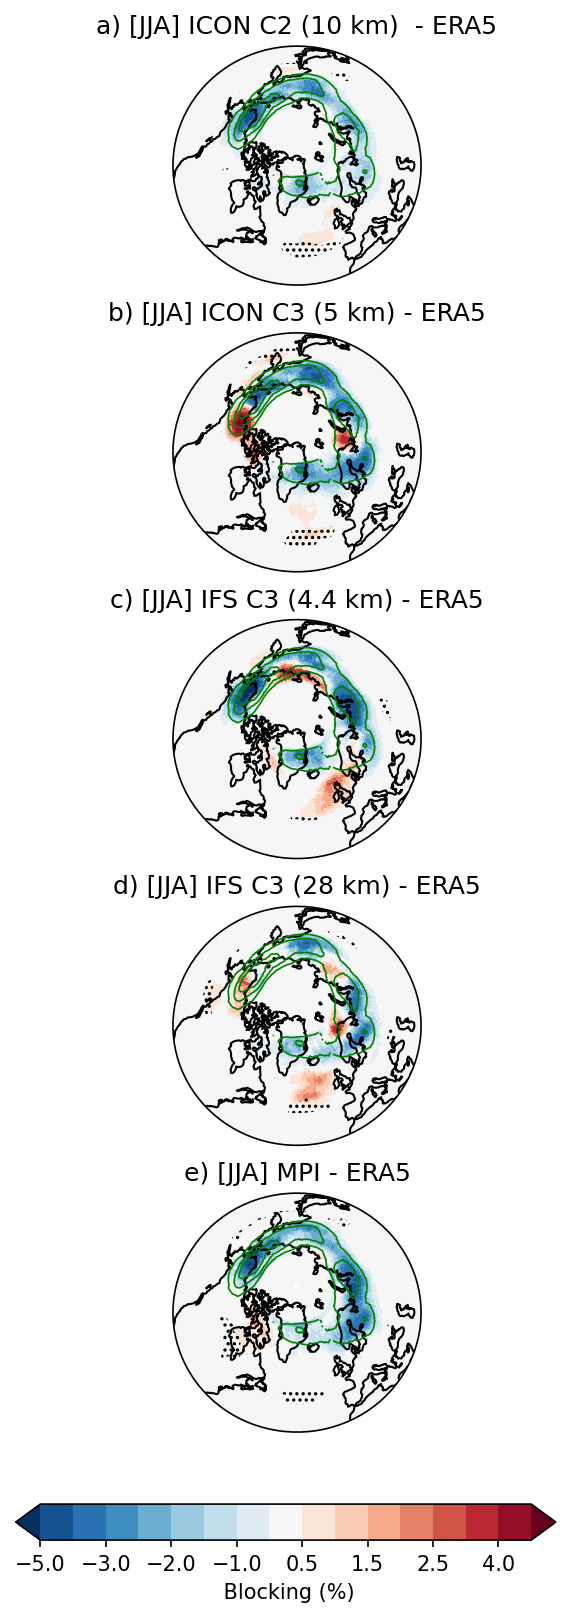

In [131]:
###### ABS Z500 index plot in DJF
#clevels=[-10,-8,-6,-5,-4,-3,-2,-1.5,-1,1,1.5,2,3,4,5,6,8,10]
#mlevels=np.arange(4,24,4)

clevels=[-5,-4,-3,-2.5,-2,-1.5,-1,-0.5,0.5,1,1.5,2,2.5,3,4,5]
mlevels=np.arange(2,8,2)

### Compute a circle in axes coordinates, which we can use as a boundary
### for the map. We can pan/zoom as much as we like - the boundary will be
### permanently circular.
import matplotlib.patches as mpatches
import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

### origin for orthographic projection
lon_0 = -35.0
lat_0 =  70.0

##
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(6, 12),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(6, 12), dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
###==== first panel
im1=cbias_ngc2013.plot(ax=ax1,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_reg.plot.contour(ax=ax1,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())

density=4
ax1.contourf(
    cbias_ngc2013.lon, cbias_ngc2013.lat, cbias_ngc2013 > feq_era5_reg_max,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)

#ax1.contourf(
#    cbias_ngc2013.lon, cbias_ngc2013.lat, cbias_ngc2013 < feq_era5_reg_min,
#    transform=ccrs.PlateCarree(),
#    colors='none',
#    levels=[.5,1.5],
#    hatches=[density*'.',density*'.'],
#)

ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax1.coastlines();
ax1.set_title('a) ['+sufix+'] ICON C2 (10 km)  - ERA5')
ax1.set_boundary(circle, transform=ax1.transAxes)


###==== second panel
im2=cbias_ngc3028.Blocking.plot(ax=ax2,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_reg.plot.contour(ax=ax2,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())

density=4
ax2.contourf(
    cbias_ngc3028.lon, cbias_ngc3028.lat, cbias_ngc3028.Blocking > feq_era5_reg_max,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)

#ax2.contourf(
#    cbias_ngc3028.lon, cbias_ngc3028.lat, cbias_ngc3028.Blocking < feq_era5_reg_min,
#    transform=ccrs.PlateCarree(),
#    colors='none',
#    levels=[.5,1.5],
#    hatches=[density*'.',density*'.'],
#)
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax2.coastlines();
ax2.set_title('b) ['+sufix+'] ICON C3 (5 km) - ERA5')
ax2.set_boundary(circle, transform=ax2.transAxes)

###==== third panel
im3=cbias_ifs4.Blocking.plot(ax=ax3,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_reg.plot.contour(ax=ax3,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())

density=4
ax3.contourf(
    cbias_ifs4.lon, cbias_ifs4.lat, cbias_ifs4.Blocking > feq_era5_reg_max,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)

#ax3.contourf(
#    cbias_ifs4.lon, cbias_ifs4.lat, cbias_ifs4.Blocking < feq_era5_reg_min,
#    transform=ccrs.PlateCarree(),
#    colors='none',
#    levels=[.5,1.5],
#    hatches=[density*'.',density*'.'],
#)
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax3.coastlines();
ax3.set_title('c) ['+sufix+'] IFS C3 (4.4 km) - ERA5')
ax3.set_boundary(circle, transform=ax3.transAxes)

###==== fourth panel
im4=cbias_ifs28.Blocking.plot(ax=ax4,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_reg.plot.contour(ax=ax4,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())

density=4
ax4.contourf(
    cbias_ifs28.lon, cbias_ifs28.lat, cbias_ifs28.Blocking > feq_era5_reg_max,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
#ax4.contourf(
#    cbias_ifs28.lon, cbias_ifs28.lat, cbias_ifs28.Blocking < feq_era5_reg_min,
#    transform=ccrs.PlateCarree(),
#    colors='none',
#    levels=[.5,1.5],
#    hatches=[density*'.',density*'.'],
#)
ax4.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax4.coastlines();
ax4.set_title('d) ['+sufix+'] IFS C3 (28 km) - ERA5')
ax4.set_boundary(circle, transform=ax4.transAxes)

###==== fifth panel
im5=cbias_mpi.plot(ax=ax5,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_reg.plot.contour(ax=ax5,colors='g', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())

density=4
ax5.contourf(
    cbias_mpi.lon, cbias_mpi.lat, cbias_mpi > feq_era5_reg_max,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
#ax5.contourf(
#    cbias_mpi.lon, cbias_mpi.lat, cbias_mpi < feq_era5_reg_min,
#    transform=ccrs.PlateCarree(),
#    colors='none',
#    levels=[.5,1.5],
#    hatches=[density*'.',density*'.'],
#)
ax5.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax5.coastlines();
ax5.set_title('e) ['+sufix+'] MPI - ERA5')
ax5.set_boundary(circle, transform=ax5.transAxes)

###=== Add colorbar
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # Left, bottom, width, height.
cbar = fig.colorbar(im2, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label(' Blocking (%)')

plt.savefig('abs-blocks_vary_'+sufix+'.jpg')

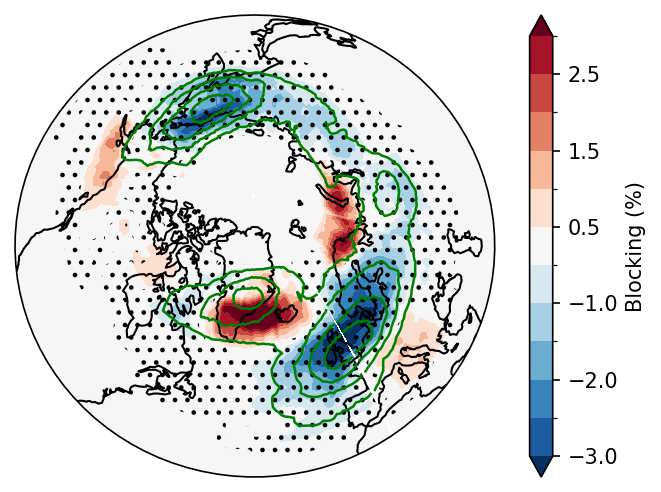

In [47]:
###### ABS Z500 index plot in DJF
#clevels=[-10,-8,-6,-5,-4,-3,-2,-1.5,-1,1,1.5,2,3,4,5,6,8,10]
#mlevels=np.arange(4,24,4)

clevels=[-3,-2.5,-2,-1.5,-1,-0.5,0.5,1,1.5,2,2.5,3]
mlevels=[1,2,3,4,5,6]

### Compute a circle in axes coordinates, which we can use as a boundary
### for the map. We can pan/zoom as much as we like - the boundary will be
### permanently circular.
import matplotlib.patches as mpatches
import matplotlib.path as mpath
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

### origin for orthographic projection
lon_0 = -35.0
lat_0 =  70.0

##
fig, ax3 = plt.subplots(1, 1, figsize=(6, 4),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(6, 12), dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})


###==== third panel
im3=cbias_ifs4.Blocking.plot.contourf(ax=ax3,levels=clevels, cmap='RdBu_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_reg.plot.contour(ax=ax3,colors='g', linewidths=1.2, levels=mlevels, transform=ccrs.PlateCarree())

density=2
ax3.contourf(
    cbias_ifs4.lon, cbias_ifs4.lat, cbias_ifs4.Blocking > feq_era5_reg_max,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)

ax3.contourf(
    cbias_ifs4.lon, cbias_ifs4.lat, cbias_ifs4.Blocking < feq_era5_reg_min,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'.',density*'.'],
)
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax3.coastlines();
#ax3.set_title('c) ['+sufix+'] IFS C3 (4.4 km) - ERA5')
ax3.set_boundary(circle, transform=ax3.transAxes)

cbar=plt.colorbar(im3,ax=ax3, orientation="vertical", pad=.05)
cbar.set_label('Blocking (%)')

# Blocking propierties analysis

In [4]:
#####
import glob
import pandas as pd
####open tex files===

In [72]:
###ERA5  ##############################
# Get CSV files list from a folder
#path = '/work/bm1235/b382006/era5/block/ANO_Z500'
path = '/scratch/b/b382006/obs/era5/block/ANO_Z500'
csv_files = sorted(glob.glob(path + "/*.csv"))

# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

#Loop to resample the flag 
accumulator = []
adj=0
for df in df_list:
    df['Flag']=df['Flag']+adj
    adj=df['Flag'].iloc[-1]

    accumulator.append(df)
    
era5_df = pd.concat(accumulator)
era5_df['year']=era5_df.Date.str[:4]
#era5_df

In [73]:
### Counting blocks
#era5_df.groupby('year')['Flag'].nunique().plot()

In [74]:
###ICON C2 NGC2013  ##############################
# Get CSV files list from a folder
#path = '/work/bm1235/b382006/regridding/cycle2/icon/ngc2013_10km_to_1degree/block/ANO_Z500'
path = '/scratch/b/b382006/nextgems/cycle2/ngc2013/block/ANO_Z500'
csv_files = sorted(glob.glob(path + "/*.csv"))

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

#Loop to resample the flag 
accumulator = []
adj=0
for df in df_list:
    df['Flag']=df['Flag']+adj
    adj=df['Flag'].iloc[-1]

    accumulator.append(df)
    
icon_ngc2013_df = pd.concat(accumulator)
icon_ngc2013_df['year']=icon_ngc2013_df.Date.str[:4]
#icon_ngc2013_df 

In [75]:
###ICON C3 NGC3028  ##############################
# Get CSV files list from a folder
#path = '/work/bm1235/b382006/regridding/cycle3/ngc3028/block/ANO_Z500'
path ='/scratch/b/b382006/nextgems/cycle3/ngc3028/block/ANO_Z500'
csv_files = sorted(glob.glob(path + "/*.csv"))

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

#Loop to resample the flag 
accumulator = []
adj=0
for df in df_list:
    df['Flag']=df['Flag']+adj
    adj=df['Flag'].iloc[-1]

    accumulator.append(df)
    
icon_ngc3028_df = pd.concat(accumulator)
icon_ngc3028_df['year']=icon_ngc3028_df.Date.str[:4]
#icon_ngc3028_df 

In [76]:
###ICON C3 IFS_4.4-FESOM_5  ##############################
# Get CSV files list from a folder
#path = '/work/bm1235/b382006/regridding/cycle3/IFS_4.4-FESOM_5/block/ANO_Z500'
path = '/scratch/b/b382006/nextgems/cycle3/IFS_4.4-FESOM_5-cycle3/block/ANO_Z500'
csv_files = sorted(glob.glob(path + "/*.csv"))

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

#Loop to resample the flag 
accumulator = []
adj=0
for df in df_list:
    df['Flag']=df['Flag']+adj
    adj=df['Flag'].iloc[-1]

    accumulator.append(df)
    
IFS_4_FESOM_5_df = pd.concat(accumulator)
IFS_4_FESOM_5_df['year']=IFS_4_FESOM_5_df.Date.str[:4]
#IFS_4_FESOM_5_df

In [77]:
###IFS_9-FESOM_5-cycle3  ##############################
# Get CSV files list from a folder
#path = '/work/bm1235/b382006/regridding/cycle3/IFS_9-FESOM_5/block/ANO_Z500'
path = '/scratch/b/b382006/nextgems/cycle3/IFS_9-FESOM_5-cycle3/block/ANO_Z500'
csv_files = sorted(glob.glob(path + "/*.csv"))

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

#Loop to resample the flag 
accumulator = []
adj=0
for df in df_list:
    df['Flag']=df['Flag']+adj
    adj=df['Flag'].iloc[-1]

    accumulator.append(df)
    
IFS_9_FESOM_5_df = pd.concat(accumulator)
IFS_9_FESOM_5_df['year']=IFS_9_FESOM_5_df.Date.str[:4]
#IFS_9_FESOM_5_df

In [78]:
###IFS_9-NEMO_25-cycle3  ##############################
# Get CSV files list from a folder
#path = '/work/bm1235/b382006/regridding/cycle3/IFS_4.4-FESOM_5/block/ANO_Z500'
path = '/scratch/b/b382006/nextgems/cycle3/IFS_9-NEMO_25-cycle3/block/ANO_Z500'
csv_files = sorted(glob.glob(path + "/*.csv"))

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

#Loop to resample the flag 
accumulator = []
adj=0
for df in df_list:
    df['Flag']=df['Flag']+adj
    adj=df['Flag'].iloc[-1]

    accumulator.append(df)
    
IFS_9_NEMO_25_df = pd.concat(accumulator)
IFS_9_NEMO_25_df['year']=IFS_9_NEMO_25_df.Date.str[:4]
#IFS_9_NEMO_25_df

In [79]:
###ICON C3 IFS_28-FESOM_25  ##############################
# Get CSV files list from a folder
path = '/scratch/b/b382006/nextgems/cycle3/IFS_28-FESOM_25-cycle3/block/ANO_Z500'
csv_files = sorted(glob.glob(path + "/*.csv"))

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

#Loop to resample the flag 
accumulator = []
adj=0
for df in df_list:
    df['Flag']=df['Flag']+adj
    adj=df['Flag'].iloc[-1]

    accumulator.append(df)
    
IFS_28_FESOM_25_df = pd.concat(accumulator)
IFS_28_FESOM_25_df['year']=IFS_28_FESOM_25_df.Date.str[:4]
#IFS_28_FESOM_25_df

In [80]:
###ICON C3 IFS_28-NEMO_25  ##############################
# Get CSV files list from a folder
#path = '/work/bm1235/b382006/regridding/cycle3/IFS_28-NEMO_25/block/ANO_Z500'
path ='/scratch/b/b382006/nextgems/cycle3/IFS_28-NEMO_25-cycle3/block/ANO_Z500'
csv_files = sorted(glob.glob(path + "/*.csv"))

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

#Loop to resample the flag 
accumulator = []
adj=0
for df in df_list:
    df['Flag']=df['Flag']+adj
    adj=df['Flag'].iloc[-1]

    accumulator.append(df)
    
IFS_28_NEMO_25_df = pd.concat(accumulator)
IFS_28_NEMO_25_df['year']=IFS_28_NEMO_25_df.Date.str[:4]
#IFS_28_NEMO_25_df

In [81]:
### CMIP6  ##############################
# Get CSV files list from a folder
#path = '/work/bm1235/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ANO_Z500'
path='/scratch/b/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/block/ANO_Z500'
csv_files = sorted(glob.glob(path + "/*.csv"))

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)


#Loop to resample the flag 
accumulator = []
adj=0
for df in df_list:
    df['Flag']=df['Flag']+adj
    adj=df['Flag'].iloc[-1]

    accumulator.append(df)
    
cmip6_df = pd.concat(accumulator)
cmip6_df['year']=cmip6_df.Date.str[:4]
#cmip6_df

In [82]:
### TAKE ONLY NORTHERN HEMISPHERE
#cmip6_df['Flag'].size

In [83]:
### take values in the northern hemosphere lat > 0 
era5_df = era5_df[(era5_df['Latitude'] > 0 )]
icon_ngc2013_df = icon_ngc2013_df[(icon_ngc2013_df['Latitude'] > 0 )]
icon_ngc3028_df = icon_ngc3028_df[(icon_ngc3028_df['Latitude'] > 0 )]
IFS_4_FESOM_5_df = IFS_4_FESOM_5_df [(IFS_4_FESOM_5_df['Latitude'] > 0 )]
IFS_9_FESOM_5_df = IFS_9_FESOM_5_df [(IFS_9_FESOM_5_df['Latitude'] > 0 )]
IFS_9_NEMO_25_df =IFS_9_NEMO_25_df [(IFS_9_NEMO_25_df['Latitude'] > 0 )]
IFS_28_FESOM_25_df  = IFS_28_FESOM_25_df [(IFS_28_FESOM_25_df['Latitude'] > 0 )]
IFS_28_NEMO_25_df  = IFS_28_NEMO_25_df [(IFS_28_NEMO_25_df['Latitude'] > 0 )]
cmip6_df  = cmip6_df [(cmip6_df['Latitude'] > 0 )] 
###cmip6_df
print(era5_df['Flag'].iloc[-1],icon_ngc2013_df['Flag'].iloc[-1],icon_ngc3028_df['Flag'].iloc[-1],IFS_4_FESOM_5_df['Flag'].iloc[-1],IFS_28_NEMO_25_df['Flag'].iloc[-1],cmip6_df['Flag'].iloc[-1])
print(era5_df['Flag'].nunique(),icon_ngc2013_df['Flag'].nunique(),icon_ngc3028_df['Flag'].nunique(),IFS_4_FESOM_5_df['Flag'].nunique(),IFS_28_FESOM_25_df['Flag'].nunique(),IFS_28_NEMO_25_df['Flag'].nunique(),cmip6_df['Flag'].nunique())
#print(era5_df['Date'].nunique(),icon_ngc2013_df['Date'].nunique(),icon_ngc3028_df['Date'].nunique(),IFS_4_FESOM_5_df['Date'].nunique(),IFS_28_FESOM_25_df['Date'].nunique(),IFS_28_NEMO_25_df['Date'].nunique(),cmip6_df['Date'].nunique())


36970 32083 5960 5275 5627 39685
1191 992 191 191 176 180 1311


48 25


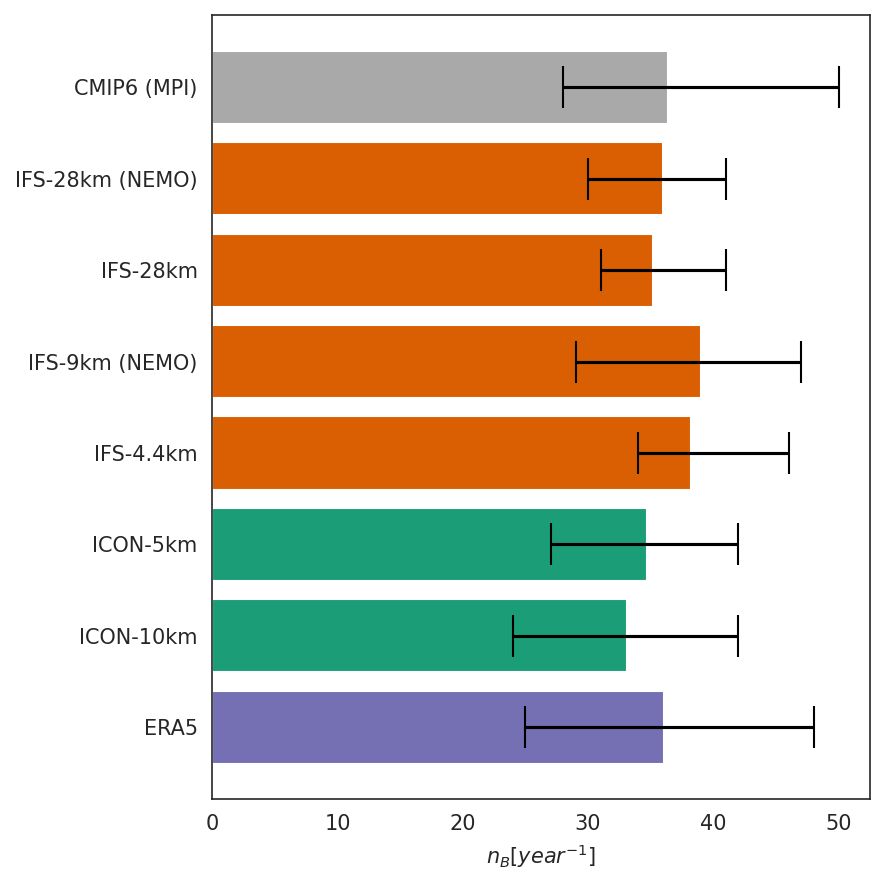

In [84]:
###
#IFS Cycle 3
color_ifs='#d95f02'
#ICON
color_icon='#1b9e77'
#ERA5 
color_era5='#7570b3'
#CMIP6
color_cmip6='darkgrey'

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 6),dpi=150)

data = ['ERA5', 'ICON-10km', 'ICON-5km', 'IFS-4.4km','IFS-9km (NEMO)', 'IFS-28km', 'IFS-28km (NEMO)', 'CMIP6 (MPI)']
counts = [era5_df['Flag'].nunique()/33, 
          icon_ngc2013_df['Flag'].nunique()/30, 
          icon_ngc3028_df['Flag'].nunique()/5.5, 
          IFS_4_FESOM_5_df['Flag'].nunique()/5,
#          IFS_9_FESOM_5_df['Flag'].nunique(),
          IFS_9_NEMO_25_df['Flag'].nunique()/5,
          IFS_28_FESOM_25_df['Flag'].nunique()/5,
          IFS_28_NEMO_25_df['Flag'].nunique()/5,
          cmip6_df['Flag'].nunique()/36,       
         ]
bar_labels = ['red', 'blue', '_red', 'orange', 'blue','blue','blue','blue']
bar_colors = [color_era5, color_icon, color_icon, color_ifs,color_ifs,color_ifs,color_ifs,color_cmip6]

#ax.barh(data, counts, label=bar_labels, color=bar_colors)
era5_max=np.max(era5_df.groupby('year')['Flag'].nunique())
era5_min=np.min(era5_df.groupby('year')['Flag'].nunique())

icon_ngc2013_max=np.max(icon_ngc2013_df.groupby('year')['Flag'].nunique())
icon_ngc2013_min=np.min(icon_ngc2013_df.groupby('year')['Flag'].nunique())

icon_ngc3028_max=np.max(icon_ngc3028_df.groupby('year')['Flag'].nunique())
#icon_ngc3028_min=np.min(icon_ngc3028_df.groupby('year')['Flag'].nunique())
icon_ngc3028_min=27 ### last year (2025) is not complete, identified manually

IFS_4_FESOM_5_max=np.max(IFS_4_FESOM_5_df.groupby('year')['Flag'].nunique())
IFS_4_FESOM_5_min=np.min(IFS_4_FESOM_5_df.groupby('year')['Flag'].nunique())

IFS_9_NEMO_25_max=np.max(IFS_9_NEMO_25_df.groupby('year')['Flag'].nunique())
IFS_9_NEMO_25_min=np.min(IFS_9_NEMO_25_df.groupby('year')['Flag'].nunique())

IFS_28_FESOM_25_max=np.max(IFS_28_FESOM_25_df.groupby('year')['Flag'].nunique())
IFS_28_FESOM_25_min=np.min(IFS_28_FESOM_25_df.groupby('year')['Flag'].nunique())

IFS_28_NEMO_25_max=np.max(IFS_28_NEMO_25_df.groupby('year')['Flag'].nunique())
IFS_28_NEMO_25_min=np.min(IFS_28_NEMO_25_df.groupby('year')['Flag'].nunique())

cmip6_max=np.max(cmip6_df.groupby('year')['Flag'].nunique())
cmip6_min=np.min(cmip6_df.groupby('year')['Flag'].nunique())
print(era5_max,era5_min)

_min = [era5_min, icon_ngc2013_min,icon_ngc3028_min, IFS_4_FESOM_5_min,IFS_9_NEMO_25_min, IFS_28_FESOM_25_min, IFS_28_NEMO_25_min, cmip6_min]
_max = [era5_max, icon_ngc2013_max,icon_ngc3028_max, IFS_4_FESOM_5_max,IFS_9_NEMO_25_max, IFS_28_FESOM_25_max, IFS_28_NEMO_25_max, cmip6_max]
xerr = [np.subtract(counts, _min), np.subtract(_max, counts)]
ax.barh(data, counts, color=bar_colors,xerr=xerr, capsize=10)

    
ax.set_xlabel('$n_{B}$[$year^{-1}$]')

plt.tight_layout()

plt.savefig('number-blocks_NH.jpg')

In [85]:
### take values in the northern hemosphere lat < latmax
#latmax=56
#era5_df = era5_df[(era5_df['Latitude'] < latmax )]
#icon_ngc2013_df = icon_ngc2013_df[(icon_ngc2013_df['Latitude'] <latmax)]
#icon_ngc3028_df = icon_ngc3028_df[(icon_ngc3028_df['Latitude'] < latmax)]
#IFS_4_FESOM_5_df = IFS_4_FESOM_5_df [(IFS_4_FESOM_5_df['Latitude'] < latmax )]
#IFS_28_NEMO_25_df  = IFS_28_NEMO_25_df [(IFS_28_NEMO_25_df['Latitude'] < latmax )]
#cmip6_df  = cmip6_df [(cmip6_df['Latitude'] < latmax )] 

In [86]:
### take values in the northern hemosphere lon < 120 
#icon_ngc3028_df = icon_ngc3028_df[(icon_ngc3028_df['Longitude'] < 120 )]
#IFS_4_FESOM_5_df = IFS_4_FESOM_5_df [(IFS_4_FESOM_5_df['Longitude'] < 120 )]


In [87]:
### take only seasonal events
##mms=['01','02','12']
#mms=['06','07','08']
#era5_df = era5_df[(era5_df['Date'].str[4:6] == mms[0]) | (era5_df['Date'].str[4:6] == mms[1]) | (era5_df['Date'].str[4:6] == mms[2]) ]
#icon_ngc2013_df = icon_ngc2013_df[(icon_ngc2013_df['Date'].str[4:6] == mms[0]) | (icon_ngc2013_df['Date'].str[4:6] == mms[1]) | (icon_ngc2013_df['Date'].str[4:6] == mms[2]) ]
#icon_ngc3028_df = icon_ngc3028_df[(icon_ngc3028_df['Date'].str[4:6] == mms[0]) | (icon_ngc3028_df['Date'].str[4:6] == mms[1]) | (icon_ngc3028_df['Date'].str[4:6] == mms[2]) ]
#IFS_4_FESOM_5_df = IFS_4_FESOM_5_df[(IFS_4_FESOM_5_df['Date'].str[4:6] == mms[0]) | (IFS_4_FESOM_5_df['Date'].str[4:6] == mms[1]) | (IFS_4_FESOM_5_df['Date'].str[4:6] == mms[2]) ]
#IFS_28_NEMO_25_df = IFS_28_NEMO_25_df[(IFS_28_NEMO_25_df['Date'].str[4:6] == mms[0]) | (IFS_28_NEMO_25_df['Date'].str[4:6] == mms[1]) | (IFS_28_NEMO_25_df['Date'].str[4:6] == mms[2]) ]
#cmip6_df = cmip6_df[(cmip6_df['Date'].str[4:6] == mms[0]) | (cmip6_df['Date'].str[4:6] == mms[1]) | (cmip6_df['Date'].str[4:6] == mms[2]) ]

In [88]:
### Identifying strong blockings
#test_reset=icon_ngc3028_df.reset_index(drop=True)
##test_reset.loc[test_reset['Intensity'].idxmax()]
#print(test_reset.loc[test_reset['Intensity'].nlargest(30).index])
##print(test_reset['Flag'].mode())
##stg_block['Intensity'].plot()
#
#### Identifying strong blockings
#test_reset=IFS_4_FESOM_5_df.reset_index(drop=True)
##test_reset.loc[test_reset['Intensity'].idxmax()]
#print(test_reset.loc[test_reset['Intensity'].nlargest(15).index])

## ANALYSE DURATION

In [89]:
### group by duration
era5_lc=pd.DataFrame(era5_df.groupby('Flag').size(), columns=['Duration']) #.assign(Location=2)
era5_lc['Duration'] =era5_lc['Duration']/4 

tmp=era5_lc.sample(frac=5, replace=True, random_state=1)
era5_sample=tmp.reset_index(drop=True)
###boxplot =df_era5_djf.boxplot(column=['Duration'], showfliers=False)
###era5_df['Flag'].mode() ###Investigate in high resolution
#era5_lc

In [90]:
### group by duration NCG2018 (30 YEARS)
icon_ngc2013_lc=pd.DataFrame(icon_ngc2013_df.groupby('Flag').size(), columns=['Duration']) #.assign(Location=1)
icon_ngc2013_lc['Duration'] = icon_ngc2013_lc['Duration']/4 

### Take a sample of the ICON ngc2013 to compare with the other models
tmp=icon_ngc2013_lc.sample(frac=5, replace=True, random_state=1)
icon_ngc2013_sample=tmp.reset_index(drop=True)
#boxplot =df_icon2_djf.boxplot(column=['Duration'], showfliers=False)

#icon_ngc2013_df['Flag'].mode() ###Investigate in high resolution
#icon_ngc2013_sample

In [91]:
# ccsv_icon1b_djf
# 	Flag 	Date 	Longitude 	Latitude 	Intensity 	Size
#df=ccsv_icon1b_djf.groupby('Flag').size()
icon_ngc3028_lc=pd.DataFrame(icon_ngc3028_df.groupby('Flag').size(), columns=['Duration'])
icon_ngc3028_lc['Duration'] =icon_ngc3028_lc['Duration']/4 
#icon_ngc3028_lc
#boxplot =df_icon1.boxplot(column=['Duration'], showfliers=False)
#icon_ngc3028_df['Flag'].mode() ###Investigate in high resolution

In [92]:
# IFS 
# 	Flag 	Date 	Longitude 	Latitude 	Intensity 	Size
#df=ccsv_icon1b_djf.groupby('Flag').size()
IFS_4_FESOM_5_lc=pd.DataFrame(IFS_4_FESOM_5_df.groupby('Flag').size(), columns=['Duration'])
IFS_4_FESOM_5_lc['Duration'] =IFS_4_FESOM_5_lc['Duration']/4 

#boxplot =df_icon1.boxplot(column=['Duration'], showfliers=False)
#IFS_4_FESOM_5_df['Flag'].mode() ###Investigate in high resolution

In [93]:
# IFS 
# 	Flag 	Date 	Longitude 	Latitude 	Intensity 	Size
#df=ccsv_icon1b_djf.groupby('Flag').size()
IFS_9_NEMO_25_lc=pd.DataFrame(IFS_9_NEMO_25_df.groupby('Flag').size(), columns=['Duration'])
IFS_9_NEMO_25_lc['Duration'] = IFS_9_NEMO_25_lc['Duration']/4 

#boxplot =df_icon1.boxplot(column=['Duration'], showfliers=False)
#IFS_28_NEMO_25_df['Flag'].mode() ###Investigate in high resolution

In [94]:
# IFS 
# 	Flag 	Date 	Longitude 	Latitude 	Intensity 	Size
#df=ccsv_icon1b_djf.groupby('Flag').size()
IFS_28_FESOM_25_lc=pd.DataFrame(IFS_28_FESOM_25_df.groupby('Flag').size(), columns=['Duration'])
IFS_28_FESOM_25_lc['Duration'] = IFS_28_FESOM_25_lc['Duration']/4 

#boxplot =df_icon1.boxplot(column=['Duration'], showfliers=False)
#IFS_28_NEMO_25_df['Flag'].mode() ###Investigate in high resolution

In [95]:
# IFS 
# 	Flag 	Date 	Longitude 	Latitude 	Intensity 	Size
#df=ccsv_icon1b_djf.groupby('Flag').size()
IFS_28_NEMO_25_lc=pd.DataFrame(IFS_28_NEMO_25_df.groupby('Flag').size(), columns=['Duration'])
IFS_28_NEMO_25_lc['Duration'] = IFS_28_NEMO_25_lc['Duration']/4 

#boxplot =df_icon1.boxplot(column=['Duration'], showfliers=False)
#IFS_28_NEMO_25_df['Flag'].mode() ###Investigate in high resolution

In [96]:
### group by duration NCG2018 (30 YEARS)
cmip6_lc=pd.DataFrame(cmip6_df.groupby('Flag').size(), columns=['Duration']) #.assign(Location=1)
cmip6_lc['Duration'] = cmip6_lc['Duration']/4 

### Take a sample of the ICON ngc2013 to compare with the other models
tmp=cmip6_lc.sample(frac=5, replace=True, random_state=1)
cmip6_sample=tmp.reset_index(drop=True)
#boxplot =df_icon2_djf.boxplot(column=['Duration'], showfliers=False)

#cmip6_df['Flag'].mode() ###Investigate in high resolution

In [97]:
import seaborn as sns
#ax = sns.boxplot(x='Location', y='value', hue="Duration", data=mdf,showfliers=False, palette="Blues")
#df_icon2
### Combine
combined_dfs = pd.DataFrame({'ERA5':era5_sample['Duration'],
                            'ICON-10km':icon_ngc2013_sample['Duration'],
                            'ICON-5km':icon_ngc3028_lc['Duration'],
                            'IFS-4.4km':IFS_4_FESOM_5_lc['Duration'],
                            'IFS-9km (NEMO)':IFS_9_NEMO_25_lc['Duration'],
                            'IFS-28km':IFS_28_FESOM_25_lc['Duration'],
                            'IFS-28km (NEMO)':IFS_28_NEMO_25_lc['Duration'],
                            'CMIP6 (MPI)':cmip6_sample['Duration']})
#combined_dfs

In [98]:
medians = combined_dfs.median()
vertical_offset = combined_dfs.median() * 0.05

In [99]:
#IFS Cycle 3
color_ifs='#d95f02'
#ICON
color_icon='#1b9e77'
#ERA5 
color_era5='#7570b3'
#CMIP6
color_cmip6='darkgrey'

/tmp/ipykernel_1276211/3753441709.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  box_plot.text(0,medians[0],medians[0],horizontalalignment='center',size='medium',color='k',weight='semibold')
/tmp/ipykernel_1276211/3753441709.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  box_plot.text(1,medians[1],medians[1],horizontalalignment='center',size='medium',color='k',weight='semibold')
/tmp/ipykernel_1276211/3753441709.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

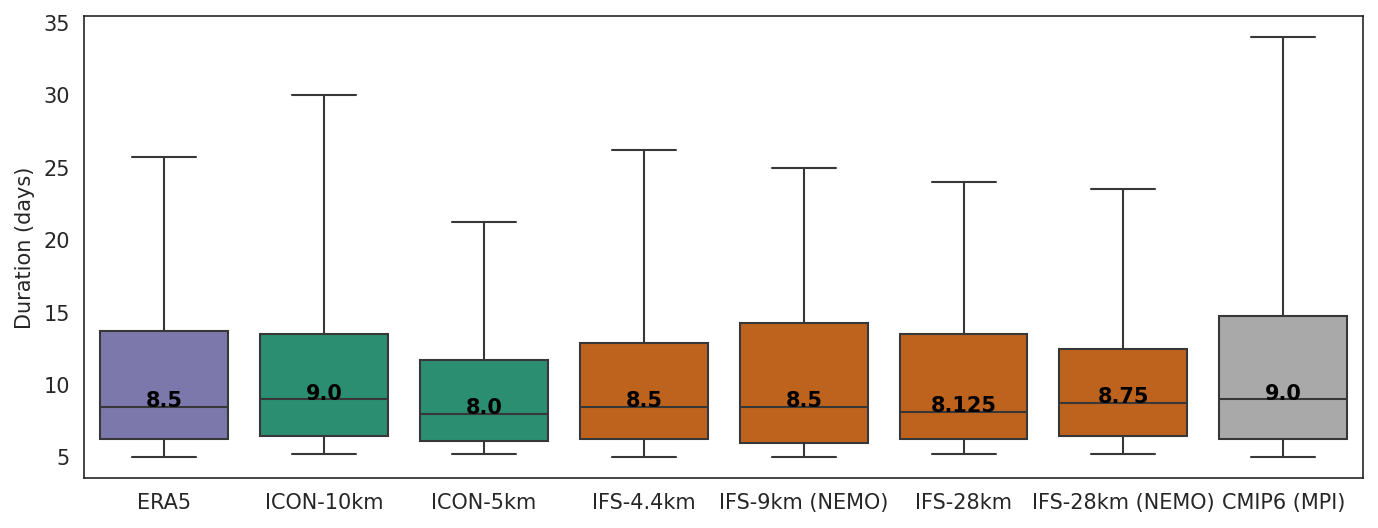

In [100]:
import matplotlib.pyplot as plt

fig = plt.subplots(1, 1, figsize=(11, 4),dpi=150)

sns.set_style('white')
#my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m","versicolor": "g", "setosa": "b", "virginica":"m", "virginica":"m"}
my_pal = [color_era5, color_icon, color_icon, color_ifs,color_ifs,color_ifs,color_ifs,color_cmip6]

box_plot=sns.boxplot(data=combined_dfs, whis=[5,95], showfliers=False,palette=my_pal)
#ax=sns.despine
box_plot.set(ylabel='Duration (days)')

box_plot.text(0,medians[0],medians[0],horizontalalignment='center',size='medium',color='k',weight='semibold')
box_plot.text(1,medians[1],medians[1],horizontalalignment='center',size='medium',color='k',weight='semibold')
box_plot.text(2,medians[2],medians[2],horizontalalignment='center',size='medium',color='k',weight='semibold')
box_plot.text(3,medians[3],medians[3],horizontalalignment='center',size='medium',color='k',weight='semibold')
box_plot.text(4,medians[4],medians[4],horizontalalignment='center',size='medium',color='k',weight='semibold')
box_plot.text(5,medians[5],medians[5],horizontalalignment='center',size='medium',color='k',weight='semibold')
box_plot.text(6,medians[6],medians[6],horizontalalignment='center',size='medium',color='k',weight='semibold')
box_plot.text(7,medians[7],medians[7],horizontalalignment='center',size='medium',color='k',weight='semibold')

#for xtick in box_plot.get_xticks():
##    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick],horizontalalignment='center',size='x-small',color='w',weight='semibold')
     

plt.savefig('duration-blocks_NH.jpg')

### Let's analyse the intensity

In [101]:
##ERA5
tmp=era5_df.sample(frac=0.15, replace=True, random_state=1)
era5_df_reset=tmp.reset_index(drop=True)
era5_df_reset.loc[era5_df_reset['Intensity'].idxmax()] ###Investigate in high resolution
era5_df_reset

Flag         Date  Longitude  Latitude  Intensity        Size  year
0     22418  20100113_12        -40        59     199.66  4998148.85  2010
1      8493  19970909_18       -131        79     193.27  1428436.60  1997
2      3366  19930210_00       -124        67     196.99  4126089.72  1993
3     22154  20090919_06        -96        54     179.61  1316789.55  2009
4     34358  20200923_12        127        69     212.79  4318282.33  2020
...     ...          ...        ...       ...        ...         ...   ...
8145  34038  20200615_06         18        63     171.82  1452071.48  2020
8146  29958  20161128_12        -50        63     211.39  5632063.27  2016
8147  10045  19990104_06       -147        59     203.54  7426123.25  1999
8148  10440  19990507_06       -160        79     174.55   651492.38  1999
8149   4250  19931113_12        143        51     223.76  3873123.29  1993

[8150 rows x 7 columns]

In [102]:
##ICON
tmp=icon_ngc2013_df.sample(frac=0.17, replace=True, random_state=1)
icon_ngc2013_reset=tmp.reset_index(drop=True)
icon_ngc2013_reset.loc[icon_ngc2013_reset['Intensity'].idxmax()] ###Investigate in high resolution
icon_ngc2013_reset

Flag         Date  Longitude  Latitude  Intensity        Size  year
0     22308  20401112_12        221        61     256.86  5089840.57  2040
1      8092  20270612_06        338        66     181.11  1204495.46  2027
2      3631  20230406_18        309        51     246.46  5535879.62  2023
3     21776  20400514_18         53        72     182.29  1136868.38  2040
4     29197  20470608_18        284        58     194.21  3589711.79  2047
...     ...          ...        ...       ...        ...         ...   ...
8115  18986  20371205_18         53        63     205.36  4308244.25  2037
8116  19100  20380116_06        192        67     211.12  2391398.78  2038
8117  26768  20450130_06        288        76     170.69   551772.97  2045
8118  28581  20461030_12        343        50     243.45  5130959.40  2046
8119  14895  20340306_18        165        45     246.77  6282033.31  2034

[8120 rows x 7 columns]

In [103]:
#ccsv_icon1['Intensity'].plot.hist()
icon_ngc3028_reset=icon_ngc3028_df.reset_index(drop=True)
icon_ngc3028_reset.loc[icon_ngc3028_reset['Intensity'].idxmax()]
#icon_ngc3028_reset

Flag                2281
Date         20220201_18
Longitude            197
Latitude              62
Intensity         336.39
Size          11479596.8
year                2022
Name: 3339, dtype: object

In [104]:
#ccsv_icon1['Intensity'].plot.hist()
IFS_4_FESOM_5_reset=IFS_4_FESOM_5_df.reset_index(drop=True)
IFS_4_FESOM_5_reset.loc[IFS_4_FESOM_5_reset['Intensity'].idxmax()]

Flag                3248
Date         20230213_12
Longitude             33
Latitude              72
Intensity         317.54
Size         10465823.94
year                2023
Name: 5469, dtype: object

In [105]:
#ccsv_icon1['Intensity'].plot.hist()
IFS_28_FESOM_25_reset=IFS_28_FESOM_25_df.reset_index(drop=True)
IFS_28_FESOM_25_reset.loc[IFS_28_FESOM_25_reset['Intensity'].idxmax()]
IFS_28_FESOM_25_reset

Flag         Date  Longitude  Latitude  Intensity         Size  year
0        1  20200121_06        350        54     292.00  10573382.01  2020
1        1  20200121_12        349        54     290.54  10647282.82  2020
2        1  20200121_18        348        54     289.33  10468449.97  2020
3        1  20200122_00        347        53     286.97  10195607.95  2020
4        1  20200122_06        346        53     284.72   9764374.62  2020
...    ...          ...        ...       ...        ...          ...   ...
7633  5462  20241230_06        187        59     291.32   8368881.74  2024
7634  5462  20241230_12        185        59     301.96   8539152.31  2024
7635  5462  20241230_18        184        59     312.14   8602117.62  2024
7636  5462  20241231_00        183        59     321.54   8593058.78  2024
7637  5462  20241231_06        182        59     327.53   8674685.88  2024

[7638 rows x 7 columns]

In [106]:
#ccsv_icon1['Intensity'].plot.hist()
IFS_28_NEMO_25_reset=IFS_28_NEMO_25_df.reset_index(drop=True)
IFS_28_NEMO_25_reset.loc[IFS_28_NEMO_25_reset['Intensity'].idxmax()]
IFS_28_NEMO_25_reset

Flag         Date  Longitude  Latitude  Intensity        Size  year
0        1  20200121_06        349        53     267.27  9825321.18  2020
1        1  20200121_12        347        53     267.31  9858286.44  2020
2        1  20200121_18        346        53     267.27  9659168.56  2020
3        1  20200122_00        345        53     267.78  9230816.85  2020
4        1  20200122_06        344        53     265.99  8869595.41  2020
...    ...          ...        ...       ...        ...         ...   ...
7736  5627  20241230_06         81        58     199.09  2573393.98  2024
7737  5627  20241230_12         84        58     201.07  2676145.00  2024
7738  5627  20241230_18         86        58     203.49  2891587.31  2024
7739  5627  20241231_00         89        58     206.80  3128459.82  2024
7740  5627  20241231_06         92        58     210.14  3371831.83  2024

[7741 rows x 7 columns]

In [107]:
#ccsv_icon2['Intensity'].plot.hist()
tmp=cmip6_df.sample(frac=0.15, replace=True, random_state=1)
cmip6_reset=tmp.reset_index(drop=True)
cmip6_reset.loc[cmip6_reset['Intensity'].idxmax()] ###Investigate in high resolution
cmip6_reset

Flag         Date  Longitude  Latitude  Intensity         Size  year
0     38478  20131027_18         -5        62     221.11   3026400.63  2013
1     20340  19970309_12        111        72     201.58   5129970.89  1997
2      8013  19860227_06        136        67     235.03   6555732.28  1986
3      3314  19811222_18         18        62     207.35  13791792.33  1981
4     20193  19970118_18       -146        72     220.36   3862231.75  1997
...     ...          ...        ...       ...        ...          ...   ...
9680  31096  20070108_18       -156        64     227.89   8918068.27  2007
9681   1890  19800910_12        -52        52     194.95   2993882.40  1980
9682  21151  19971119_18         16        69     209.31   2646328.27  1997
9683  18243  19950425_00        -22        59     203.99   5839775.81  1995
9684  30450  20060525_06         40        67     200.70   5499270.52  2006

[9685 rows x 7 columns]

In [108]:
inty_dfs = pd.DataFrame({
    'ERA5':era5_df_reset['Intensity'],
    'ICON C2(10km)':icon_ngc2013_reset['Intensity'],
    'ICON C3 (5km)':icon_ngc3028_reset['Intensity'],
    'IFS C3 (4.4km)':IFS_4_FESOM_5_reset['Intensity'],
    'IFS C3 (fesom)':IFS_28_FESOM_25_reset['Intensity'],
    'IFS C3 (nemo)':IFS_28_NEMO_25_reset['Intensity'],
    'CMIP6 (MPI)':cmip6_reset['Intensity']
       })

inty_dfs


ERA5  ICON C2(10km)  ICON C3 (5km)  IFS C3 (4.4km)  IFS C3 (fesom)  \
0     199.66         256.86         258.09          306.79          292.00   
1     193.27         181.11         259.27          303.26          290.54   
2     196.99         246.46         263.83          299.87          289.33   
3     179.61         182.29         262.78          295.65          286.97   
4     212.79         194.21         258.95          292.88          284.72   
...      ...            ...            ...             ...             ...   
9680     NaN            NaN            NaN             NaN             NaN   
9681     NaN            NaN            NaN             NaN             NaN   
9682     NaN            NaN            NaN             NaN             NaN   
9683     NaN            NaN            NaN             NaN             NaN   
9684     NaN            NaN            NaN             NaN             NaN   

      IFS C3 (nemo)  CMIP6 (MPI)  
0            267.27       221.11  
1            267.31       201.58  
2            267.27       235.03  
3            267.78       207.35  
4            265.99       220.36  
...             ...          ...  
9680            NaN       227.89  
9681            NaN       194.95  
9682            NaN       209.31  
9683            NaN       203.99  
9684            NaN       200.70  

[9685 rows x 7 columns]

In [109]:
###Find mean and max
mean = inty_dfs.mean()
median = inty_dfs.median()
maxv = inty_dfs.max()
print(maxv), print(median)

ERA5              355.52
ICON C2(10km)     349.85
ICON C3 (5km)     336.39
IFS C3 (4.4km)    317.54
IFS C3 (fesom)    346.12
IFS C3 (nemo)     330.28
CMIP6 (MPI)       380.87
dtype: float64
ERA5              205.895
ICON C2(10km)     205.290
ICON C3 (5km)     201.020
IFS C3 (4.4km)    205.440
IFS C3 (fesom)    203.155
IFS C3 (nemo)     203.910
CMIP6 (MPI)       208.780
dtype: float64


(None, None)

In [139]:
#IFS Cycle 3
color_ifs='#d95f02'
#ICON
color_icon='#1b9e77'
#ERA5 
color_era5='#7570b3'
#CMIP6
color_cmip6='dimgrey'

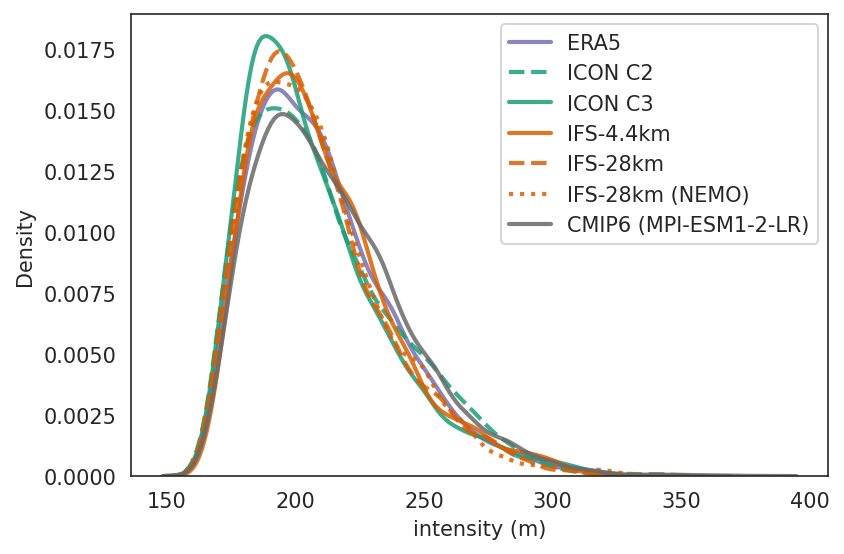

In [140]:
fig = plt.subplots(1, 1, figsize=(6, 4),dpi=150)

p=sns.kdeplot(inty_dfs['ERA5'], color=color_era5, fill=False, common_norm=False, alpha=.85, linewidth=2,label='ERA5',)
ax=sns.kdeplot(inty_dfs['ICON C2(10km)'],color=color_icon, fill=False, common_norm=False, alpha=.85, linestyle="--",linewidth=2,label='ICON C2')
ax=sns.kdeplot(inty_dfs['ICON C3 (5km)'], color=color_icon, fill=False, common_norm=False, alpha=.85, linewidth=2,label='ICON C3')
ax=sns.kdeplot(inty_dfs['IFS C3 (4.4km)'], color=color_ifs, fill=False, common_norm=False, alpha=.85, linewidth=2,label='IFS-4.4km')
ax=sns.kdeplot(inty_dfs['IFS C3 (fesom)'], color=color_ifs, fill=False, common_norm=False, alpha=.85,linestyle="--",linewidth=2,label='IFS-28km')
x=sns.kdeplot(inty_dfs['IFS C3 (nemo)'], color=color_ifs, fill=False, common_norm=False, alpha=.85,linestyle=":",linewidth=2,label='IFS-28km (NEMO)')
ax=sns.kdeplot(inty_dfs['CMIP6 (MPI)'], color=color_cmip6, fill=False, common_norm=False, alpha=.85, linewidth=2,label='CMIP6 (MPI-ESM1-2-LR)')

#handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Workday"),
#           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Non-workday")]
#plt.legend(handles=handles)
plt.legend()
ax.set(xlabel='intensity (m)')
plt.savefig('intensity-blocks_NH.jpg')

In [112]:
###=== Cramér–von Mises test (two samples)
import numpy as np
from scipy import stats

res = stats.cramervonmises_2samp(inty_dfs['ERA5'].values,inty_dfs['ERA5'].values)
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(inty_dfs['ERA5'].values,inty_dfs['ICON C2(10km)'].values)
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(inty_dfs['ERA5'].values,inty_dfs['ICON C3 (5km)'].values)
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(inty_dfs['ERA5'],inty_dfs['IFS C3 (4.4km)'])
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(inty_dfs['ERA5'],inty_dfs['IFS C3 (nemo)'])
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(inty_dfs['ERA5'],inty_dfs['CMIP6 (MPI)'])
print(res.statistic, res.pvalue)

12.82631988430603 3.4457017239475363e-09
13.8953599163533 5.017113391403427e-10
21.652661362606977 3.285528404894933e-09
12.160400331132678 1.3981110713601197e-09
19.651818823663234 6.199847302212902e-10
24.758303272228204 2.5685479299042413e-09


In [113]:
#inty_dfs['ERA5'].values

In [114]:
### Comparing different percentiles 

def idxquantile(s,q=0.01, *args, **kwargs):
    qv=s.quantile(q, *args, **kwargs)
    return (s.sort_values(by='ERA5')[::-1] <= qv).idxmax()

#idxquantile(inty_dfs)
qts=[0.01,0.25, 0.5, 0.75, 0.90, 0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
era5_qts=pd.DataFrame(inty_dfs['ERA5'].quantile(qts))


In [115]:
j=0
per=[0.99, 0.75, 0.5, 0.25, 0.10, 0.08, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
accumulator=[]
for i in per:
#    print(i)
#    print(inty_dfs.count()*i)
    ctrl=inty_dfs.count()*i
    test=inty_dfs.ge(era5_qts['ERA5'].iloc[j]).sum()     
#    print(i,j )
    tmp_df=pd.DataFrame((test -ctrl)/ ctrl*100)
    accumulator.append(tmp_df.T)
#    print(tmp_df.T)
    j=j+1

In [116]:
percentile_df = pd.concat(accumulator).reset_index(drop=True)
#percentile_df

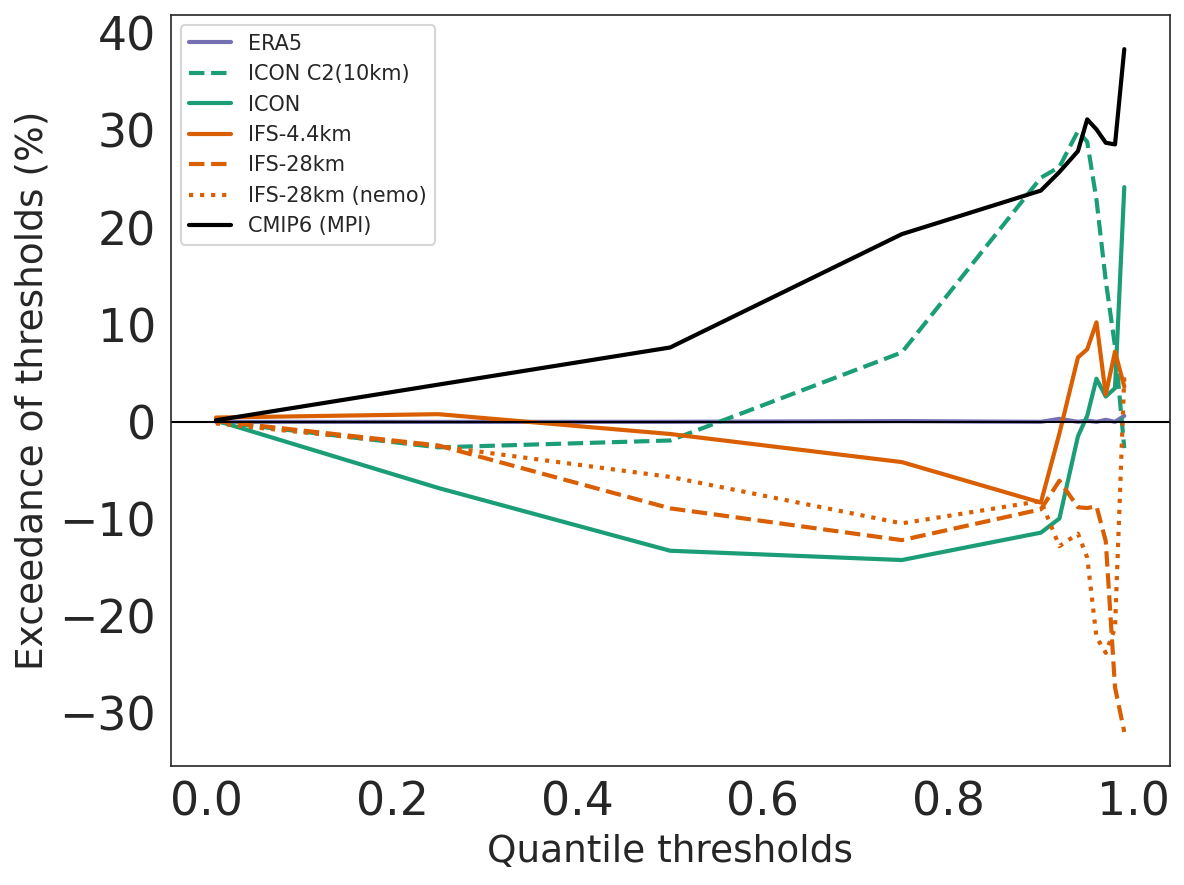

In [117]:
fig,ax = plt.subplots(figsize=(8,6),dpi=150,tight_layout=True)

plt.plot(qts, percentile_df['ERA5'], color=color_era5,linewidth=2, label='ERA5')
plt.plot(qts, percentile_df['ICON C2(10km)'],color=color_icon,linestyle="--",linewidth=2,label='ICON C2(10km)')
plt.plot(qts, percentile_df['ICON C3 (5km)'],color=color_icon,linewidth=2,label='ICON')
plt.plot(qts, percentile_df['IFS C3 (4.4km)'],color=color_ifs, linewidth=2, label='IFS-4.4km')
plt.plot(qts, percentile_df['IFS C3 (fesom)'],color=color_ifs,linestyle="--",linewidth=2,label='IFS-28km')
plt.plot(qts, percentile_df['IFS C3 (nemo)'],color=color_ifs,linestyle=":",linewidth=2,label='IFS-28km (nemo)')
plt.plot(qts, percentile_df['CMIP6 (MPI)'],color=color_cmip6,linewidth=2,label='CMIP6 (MPI)')

plt.tick_params(labelsize=22)

ax.set_xlabel('Quantile thresholds', fontsize=18)
ax.set_ylabel('Exceedance of thresholds (%)', fontsize=18)

ax.axhline(0, color='k', lw=1)

plt.legend()

plt.savefig('intensity-blocks_NH_quantiles.jpg')

## ANALYSE SIZE

In [118]:
size_dfs = pd.DataFrame({
    'ERA5':era5_df_reset['Size'],
    'ICON C2(10km)':icon_ngc2013_reset['Size'],
    'ICON C3 (5km)':icon_ngc3028_reset['Size'],
    'IFS C3 (4.4km)':IFS_4_FESOM_5_reset['Size'],
    'IFS C3 (fesom)':IFS_28_FESOM_25_reset['Size'],
    'IFS C3 (nemo)':IFS_28_NEMO_25_reset['Size'],
    'CMIP6 (MPI)':cmip6_reset['Size']
       })

size_dfs

ERA5  ICON C2(10km)  ICON C3 (5km)  IFS C3 (4.4km)  \
0     4998148.85     5089840.57    17449801.83     11589044.00   
1     1428436.60     1204495.46    16975312.72     11673677.53   
2     4126089.72     5535879.62    15678908.35     11533663.83   
3     1316789.55     1136868.38    14975927.32     11291305.90   
4     4318282.33     3589711.79    14344899.72     10848672.64   
...          ...            ...            ...             ...   
9680         NaN            NaN            NaN             NaN   
9681         NaN            NaN            NaN             NaN   
9682         NaN            NaN            NaN             NaN   
9683         NaN            NaN            NaN             NaN   
9684         NaN            NaN            NaN             NaN   

      IFS C3 (fesom)  IFS C3 (nemo)  CMIP6 (MPI)  
0        10573382.01     9825321.18   3026400.63  
1        10647282.82     9858286.44   5129970.89  
2        10468449.97     9659168.56   6555732.28  
3        10195607.95     9230816.85  13791792.33  
4         9764374.62     8869595.41   3862231.75  
...              ...            ...          ...  
9680             NaN            NaN   8918068.27  
9681             NaN            NaN   2993882.40  
9682             NaN            NaN   2646328.27  
9683             NaN            NaN   5839775.81  
9684             NaN            NaN   5499270.52  

[9685 rows x 7 columns]

In [119]:
###Find mean and max
mean = size_dfs.mean()
median = size_dfs.median()
maxv = size_dfs.max()
print(maxv), print(median)

ERA5              25888598.00
ICON C2(10km)     27725056.66
ICON C3 (5km)     24731212.87
IFS C3 (4.4km)    23335855.80
IFS C3 (fesom)    25497934.72
IFS C3 (nemo)     21692606.23
CMIP6 (MPI)       28454254.09
dtype: float64
ERA5              3640739.005
ICON C2(10km)     3810125.575
ICON C3 (5km)     3292470.955
IFS C3 (4.4km)    3719757.085
IFS C3 (fesom)    3520858.060
IFS C3 (nemo)     3617508.080
CMIP6 (MPI)       4057462.300
dtype: float64


(None, None)

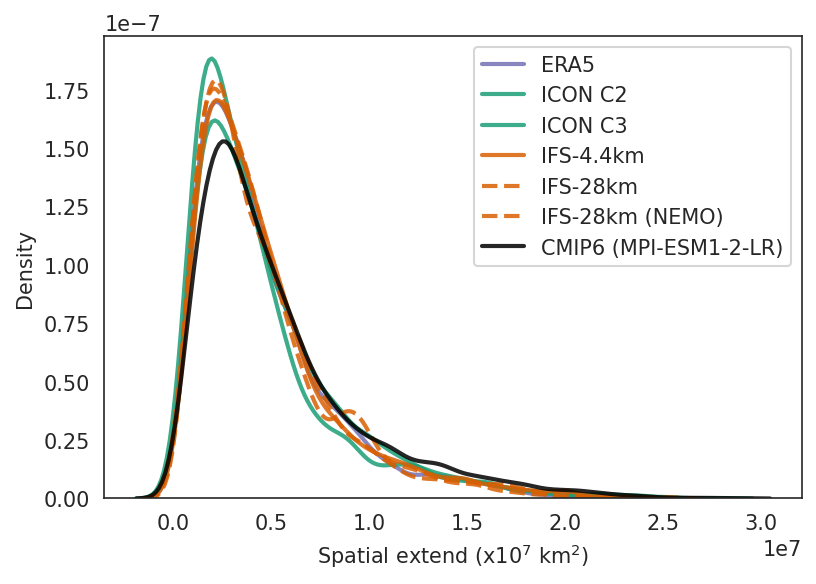

In [120]:
fig = plt.subplots(1, 1, figsize=(6, 4),dpi=150)

p=sns.kdeplot(size_dfs['ERA5'], color=color_era5, fill=False, common_norm=False, alpha=.85, linewidth=2,label='ERA5',)
ax=sns.kdeplot(size_dfs['ICON C2(10km)'], color=color_icon,fill=False, common_norm=False, alpha=.85, linewidth=2,label='ICON C2')
ax=sns.kdeplot(size_dfs['ICON C3 (5km)'], color=color_icon, fill=False, common_norm=False, alpha=.85, linewidth=2,label='ICON C3')
ax=sns.kdeplot(size_dfs['IFS C3 (4.4km)'],color=color_ifs, fill=False, common_norm=False, alpha=.85, linewidth=2,label='IFS-4.4km')
ax=sns.kdeplot(size_dfs['IFS C3 (fesom)'], color=color_ifs,fill=False, common_norm=False, alpha=.85,linestyle="--", linewidth=2,label='IFS-28km')
ax=sns.kdeplot(size_dfs['IFS C3 (nemo)'], color=color_ifs,fill=False, common_norm=False, alpha=.85,linestyle="--", linewidth=2,label='IFS-28km (NEMO)')
ax=sns.kdeplot(size_dfs['CMIP6 (MPI)'],color=color_cmip6, fill=False, common_norm=False, alpha=.85, linewidth=2,label='CMIP6 (MPI-ESM1-2-LR)')

#handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Workday"),
#           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Non-workday")]
#plt.legend(handles=handles)
plt.legend()
ax.set(xlabel='Spatial extend (x10$^7$ km$^2$)')
plt.savefig('size-blocks_NH.jpg')

In [121]:
###=== Cramér–von Mises test (two samples)
import numpy as np
from scipy import stats

res = stats.cramervonmises_2samp(size_dfs['ERA5'],size_dfs['ERA5'])
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(size_dfs['ERA5'],size_dfs['ICON C2(10km)'])
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(size_dfs['ERA5'],size_dfs['ICON C3 (5km)'])
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(size_dfs['ERA5'],size_dfs['IFS C3 (4.4km)'])
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(size_dfs['ERA5'],size_dfs['IFS C3 (fesom)'])
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(size_dfs['ERA5'],size_dfs['CMIP6 (MPI)'])
print(res.statistic, res.pvalue)

12.82631988430603 3.4457017239475363e-09
14.371698638768066 9.207983264758468e-10
21.599136496063238 3.1546647516478288e-09
11.66887748539466 6.729770074542785e-10
23.930794915949264 1.4465676434483044e-09
18.68218881872417 4.078152815445435e-09


In [122]:
### Comparing different percentiles 

def idxquantile(s,q=0.01, *args, **kwargs):
    qv=s.quantile(q, *args, **kwargs)
    return (s.sort_values(by='ERA5')[::-1] <= qv).idxmax()

#idxquantile(inty_dfs)
qts=[0.01,0.25, 0.5, 0.75, 0.90, 0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
era5_qts=pd.DataFrame(size_dfs['ERA5'].quantile(qts))

j=0
per=[0.99, 0.75, 0.5, 0.25, 0.10, 0.08, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
accumulator=[]
for i in per:
#    print(i)
#    print(inty_dfs.count()*i)
    ctrl=size_dfs.count()*i
    test=size_dfs.ge(era5_qts['ERA5'].iloc[j]).sum()     
#    print(i,j )
    tmp_df=pd.DataFrame((test -ctrl)/ ctrl*100)
    accumulator.append(tmp_df.T)
#    print(tmp_df.T)
    j=j+1

percentile_df = pd.concat(accumulator).reset_index(drop=True)



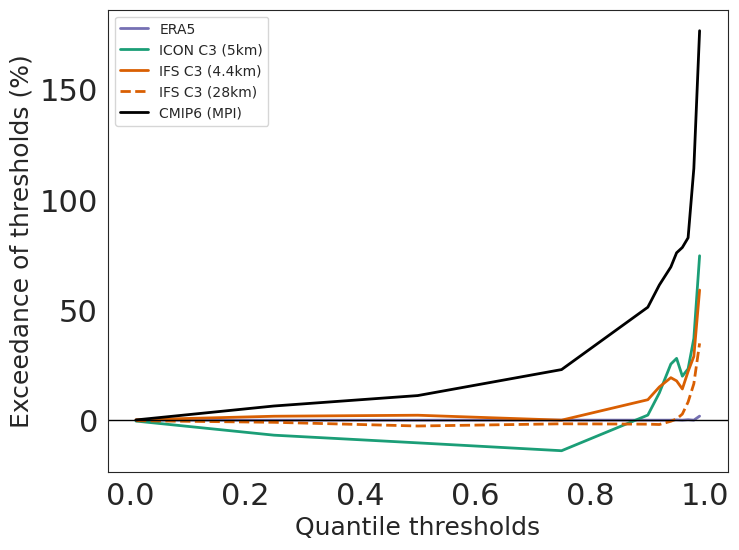

In [123]:
fig,ax = plt.subplots(figsize=(8,6))

plt.plot(qts, percentile_df['ERA5'], color=color_era5,linewidth=2, label='ERA5')
#plt.plot(qts, percentile_df['ICON C2(10km)'],linewidth=2,label='ICON C2(10km)')
plt.plot(qts, percentile_df['ICON C3 (5km)'],color=color_icon,linewidth=2,label='ICON C3 (5km)')
plt.plot(qts, percentile_df['IFS C3 (4.4km)'],color=color_ifs,linewidth=2,label='IFS C3 (4.4km)')
plt.plot(qts, percentile_df['IFS C3 (fesom)'],color=color_ifs,linestyle="--",linewidth=2,label='IFS C3 (28km)')
plt.plot(qts, percentile_df['CMIP6 (MPI)'],color=color_cmip6,linewidth=2,label='CMIP6 (MPI)')

plt.tick_params(labelsize=22)

ax.set_xlabel('Quantile thresholds', fontsize=18)
ax.set_ylabel('Exceedance of thresholds (%)', fontsize=18)

ax.axhline(0, color='k', lw=1)

plt.legend()

plt.savefig('size-blocks_NH_quantiles.jpg')

##  Life cycle

In [124]:
### group by flag
#era5_df.iloc[50:100]
#era_block=era5_df.groupby('Flag').first()
#np.linspace(0.25, 5, 20).tolist()
xs=np.arange(-5,0,0.25).tolist()
map(str,xs)


In [125]:
#era5_df.groupby('Flag').nth([0]).median()
era5_df.groupby('Flag')['Intensity'].nth(0).median()

179.9

In [126]:
#era5_df

In [127]:
###ERA5
era5_df.drop(columns=['Date','year'], inplace=True)
#Loop to resample the flag 
accumulator = []
for i in range(0,21):
#    print(i)
    tmp_df=pd.DataFrame(era5_df.groupby('Flag').nth(i).median())
#    tmp_df=pd.DataFrame(data=era5_df.groupby('Flag')['Intensity'].nth([i]).median())

    accumulator.append(tmp_df.T)
    
era5_gns = pd.concat(accumulator)

#Loop to resample the flag 
accumulator = []
for i in range(-22,-1):
    tmp_df=pd.DataFrame(era5_df.groupby('Flag').nth([i]).median())
    accumulator.append(tmp_df.T)
    
era5_lys = pd.concat(accumulator)

###Prepare axis X
#lax=np.linspace(0.25, 5, 20).tolist()
lax=['genesis','0.25','0.5','0.75','1','1.25','1.5','1.75','2','2.25','2.5','2.75','3','3.25','3.5','3.75','4','4.25','4.5','4.75','5']
era5_gns['days'] = lax
era5_gns
#lax=np.arange(-5,0,0.25).tolist()
lax=['-5','-4.75','-4.5','-4.25','4','-3.75','-3.5','-3.25','-3','-2.75','-2.5','-2.25','-2','-1.75','-1.5','-1.25','-1','-0.75','-0.5','-0.25','lysis']
era5_lys['days'] = lax
#era5_gns.plot(x='days',y='Intensity')
#era5_gns

In [128]:
###ICON model: icon_ngc2013
icon_ngc2013_df.drop(columns=['Date','year'], inplace=True)
#Loop to resample the flag 
accumulator = []
for i in range(0,21):
    tmp_df=pd.DataFrame(icon_ngc2013_df.groupby('Flag').nth([i]).median())
    accumulator.append(tmp_df.T)
    
icon_ngc2013_gns = pd.concat(accumulator)

#Loop to resample the flag 
accumulator = []
for i in range(-22,-1):
    tmp_df=pd.DataFrame(icon_ngc2013_df.groupby('Flag').nth([i]).median())
    accumulator.append(tmp_df.T)
    
icon_ngc2013_lys = pd.concat(accumulator)

lax=['genesis','0.25','0.5','0.75','1','1.25','1.5','1.75','2','2.25','2.5','2.75','3','3.25','3.5','3.75','4','4.25','4.5','4.75','5']
icon_ngc2013_gns['days'] = lax
lax=['-5','-4.75','-4.5','-4.25','4','-3.75','-3.5','-3.25','-3','-2.75','-2.5','-2.25','-2','-1.75','-1.5','-1.25','-1','-0.75','-0.5','-0.25','lysis']
icon_ngc2013_lys['days'] = lax

In [129]:
### icon_ngc3028
icon_ngc3028_df.drop(columns=['Date','year'], inplace=True)
#Loop to resample the flag 
accumulator = []
for i in range(0,21):
    tmp_df=pd.DataFrame(icon_ngc3028_df.groupby('Flag').nth([i]).median())
#    tmp_df=era5_df.groupby('Flag').nth([0]).median()
    accumulator.append(tmp_df.T)
    
icon_ngc3028_gns = pd.concat(accumulator)

#Loop to resample the flag 
accumulator = []
for i in range(-22,-1):
    tmp_df=pd.DataFrame(icon_ngc3028_df.groupby('Flag').nth([i]).median())
#    tmp_df=era5_df.groupby('Flag').nth([0]).median()
    accumulator.append(tmp_df.T)
    
icon_ngc3028_lys = pd.concat(accumulator)

lax=['genesis','0.25','0.5','0.75','1','1.25','1.5','1.75','2','2.25','2.5','2.75','3','3.25','3.5','3.75','4','4.25','4.5','4.75','5']
icon_ngc3028_gns['days'] = lax
lax=['-5','-4.75','-4.5','-4.25','4','-3.75','-3.5','-3.25','-3','-2.75','-2.5','-2.25','-2','-1.75','-1.5','-1.25','-1','-0.75','-0.5','-0.25','lysis']
icon_ngc3028_lys['days'] = lax

In [130]:
### IFS_4_FESOM_5_df 
IFS_4_FESOM_5_df.drop(columns=['Date','year'], inplace=True)
#Loop to resample the flag 
accumulator = []
for i in range(0,21):
    tmp_df=pd.DataFrame(IFS_4_FESOM_5_df.groupby('Flag').nth([i]).median())
#    tmp_df=era5_df.groupby('Flag').nth([0]).median()
    accumulator.append(tmp_df.T)
    
IFS_4_FESOM_5_gns = pd.concat(accumulator)

#Loop to resample the flag 
accumulator = []
for i in range(-22,-1):
    tmp_df=pd.DataFrame(IFS_4_FESOM_5_df.groupby('Flag').nth([i]).median())
#    tmp_df=era5_df.groupby('Flag').nth([0]).median()
    accumulator.append(tmp_df.T)
    
IFS_4_FESOM_5_lys = pd.concat(accumulator)

lax=['genesis','0.25','0.5','0.75','1','1.25','1.5','1.75','2','2.25','2.5','2.75','3','3.25','3.5','3.75','4','4.25','4.5','4.75','5']
IFS_4_FESOM_5_gns['days'] = lax
lax=['-5','-4.75','-4.5','-4.25','4','-3.75','-3.5','-3.25','-3','-2.75','-2.5','-2.25','-2','-1.75','-1.5','-1.25','-1','-0.75','-0.5','-0.25','lysis']
IFS_4_FESOM_5_lys['days'] = lax

In [131]:
### IFS_9_NEMO_25_df 
IFS_9_NEMO_25_df.drop(columns=['Date','year'], inplace=True)
#Loop to resample the flag 
accumulator = []
for i in range(0,21):
    tmp_df=pd.DataFrame(IFS_9_NEMO_25_df.groupby('Flag').nth([i]).median())
#    tmp_df=era5_df.groupby('Flag').nth([0]).median()
    accumulator.append(tmp_df.T)
    
IFS_9_NEMO_25_gns = pd.concat(accumulator)

#Loop to resample the flag 
accumulator = []
for i in range(-22,-1):
    tmp_df=pd.DataFrame(IFS_9_NEMO_25_df.groupby('Flag').nth([i]).median())
#    tmp_df=era5_df.groupby('Flag').nth([0]).median()
    accumulator.append(tmp_df.T)
    
IFS_9_NEMO_25_lys = pd.concat(accumulator)

lax=['genesis','0.25','0.5','0.75','1','1.25','1.5','1.75','2','2.25','2.5','2.75','3','3.25','3.5','3.75','4','4.25','4.5','4.75','5']
IFS_9_NEMO_25_gns['days'] = lax
lax=['-5','-4.75','-4.5','-4.25','4','-3.75','-3.5','-3.25','-3','-2.75','-2.5','-2.25','-2','-1.75','-1.5','-1.25','-1','-0.75','-0.5','-0.25','lysis']
IFS_9_NEMO_25_lys['days'] = lax

In [132]:
### IFS_28_FESOM_25
IFS_28_FESOM_25_df.drop(columns=['Date','year'], inplace=True)
#Loop to resample the flag 
accumulator = []
for i in range(0,21):
    tmp_df=pd.DataFrame(IFS_28_FESOM_25_df.groupby('Flag').nth([i]).median())
#    tmp_df=era5_df.groupby('Flag').nth([0]).median()
    accumulator.append(tmp_df.T)
    
IFS_28_FESOM_25_gns = pd.concat(accumulator)

#Loop to resample the flag 
accumulator = []
for i in range(-22,-1):
    tmp_df=pd.DataFrame(IFS_28_FESOM_25_df.groupby('Flag').nth([i]).median())
#    tmp_df=era5_df.groupby('Flag').nth([0]).median()
    accumulator.append(tmp_df.T)
    
IFS_28_FESOM_25_lys = pd.concat(accumulator)

lax=['genesis','0.25','0.5','0.75','1','1.25','1.5','1.75','2','2.25','2.5','2.75','3','3.25','3.5','3.75','4','4.25','4.5','4.75','5']
IFS_28_FESOM_25_gns['days'] = lax
lax=['-5','-4.75','-4.5','-4.25','4','-3.75','-3.5','-3.25','-3','-2.75','-2.5','-2.25','-2','-1.75','-1.5','-1.25','-1','-0.75','-0.5','-0.25','lysis']
IFS_28_FESOM_25_lys['days'] = lax


In [133]:
### IFS_28_NEMO_25
IFS_28_NEMO_25_df.drop(columns=['Date','year'], inplace=True)
#Loop to resample the flag 
accumulator = []
for i in range(0,21):
    tmp_df=pd.DataFrame(IFS_28_NEMO_25_df.groupby('Flag').nth([i]).median())
#    tmp_df=era5_df.groupby('Flag').nth([0]).median()
    accumulator.append(tmp_df.T)
    
IFS_28_NEMO_25_gns = pd.concat(accumulator)

#Loop to resample the flag 
accumulator = []
for i in range(-22,-1):
    tmp_df=pd.DataFrame(IFS_28_NEMO_25_df.groupby('Flag').nth([i]).median())
#    tmp_df=era5_df.groupby('Flag').nth([0]).median()
    accumulator.append(tmp_df.T)
    
IFS_28_NEMO_25_lys = pd.concat(accumulator)

lax=['genesis','0.25','0.5','0.75','1','1.25','1.5','1.75','2','2.25','2.5','2.75','3','3.25','3.5','3.75','4','4.25','4.5','4.75','5']
IFS_28_NEMO_25_gns['days'] = lax
lax=['-5','-4.75','-4.5','-4.25','4','-3.75','-3.5','-3.25','-3','-2.75','-2.5','-2.25','-2','-1.75','-1.5','-1.25','-1','-0.75','-0.5','-0.25','lysis']
IFS_28_NEMO_25_lys['days'] = lax

In [134]:
### cmip6_df 
cmip6_df.drop(columns=['Date','year'], inplace=True)
#Loop to resample the flag 
accumulator = []
for i in range(0,21):
    tmp_df=pd.DataFrame(cmip6_df.groupby('Flag').nth([i]).median())
#    tmp_df=era5_df.groupby('Flag').nth([0]).median()
    accumulator.append(tmp_df.T)
    
cmip6_gns = pd.concat(accumulator)

#Loop to resample the flag 
accumulator = []
for i in range(-22,-1):
    tmp_df=pd.DataFrame(cmip6_df.groupby('Flag').nth([i]).median())
#    tmp_df=era5_df.groupby('Flag').nth([0]).median()
    accumulator.append(tmp_df.T)
    
cmip6_lys = pd.concat(accumulator)

lax=['genesis','0.25','0.5','0.75','1','1.25','1.5','1.75','2','2.25','2.5','2.75','3','3.25','3.5','3.75','4','4.25','4.5','4.75','5']
cmip6_gns['days'] = lax
lax=['-5','-4.75','-4.5','-4.25','4','-3.75','-3.5','-3.25','-3','-2.75','-2.5','-2.25','-2','-1.75','-1.5','-1.25','-1','-0.75','-0.5','-0.25','lysis']
cmip6_lys['days'] = lax

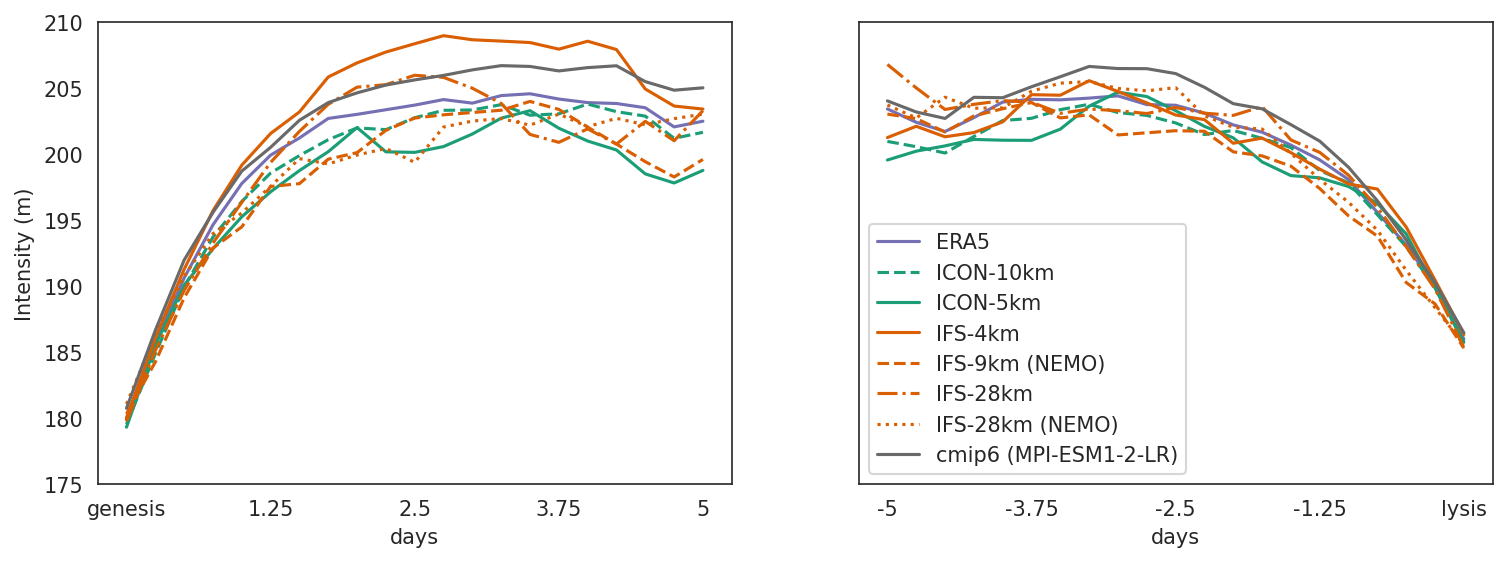

In [145]:
bar_colors = [color_era5, color_icon, color_icon, color_ifs,color_ifs,color_ifs,color_cmip6]
param='Intensity'
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12, 4), dpi=150)
era5_gns.plot(ax=ax[0],x='days',y=param, color=color_era5,legend=False)
icon_ngc2013_gns.plot(ax=ax[0],x='days',color=color_icon,linestyle="--",y=param, legend=False)
icon_ngc3028_gns.plot(ax=ax[0],x='days',color=color_icon,y=param, legend=False)
IFS_4_FESOM_5_gns.plot(ax=ax[0],x='days',color=color_ifs,y=param, legend=False)
IFS_28_FESOM_25_gns.plot(ax=ax[0],x='days',color=color_ifs,linestyle="--",y=param, legend=False)
IFS_9_NEMO_25_gns.plot(ax=ax[0],x='days',color=color_ifs,linestyle="-.",y=param, legend=False)
IFS_28_NEMO_25_gns.plot(ax=ax[0],x='days',color=color_ifs,linestyle=":",y=param, legend=False)
cmip6_gns.plot(ax=ax[0],x='days',y=param, color=color_cmip6,legend=False)

ax[0].set_ylim(175,210)
ax[0].set_ylabel("Intensity (m)")


era5_lys.plot(ax=ax[1],x='days',color=color_era5,y=param)
icon_ngc2013_lys.plot(ax=ax[1],x='days',color=color_icon,linestyle="--",y=param)
icon_ngc3028_lys.plot(ax=ax[1],x='days',color=color_icon,y=param)
IFS_4_FESOM_5_lys.plot(ax=ax[1],x='days',color=color_ifs,y=param)
IFS_28_FESOM_25_lys.plot(ax=ax[1],x='days',color=color_ifs,linestyle="--",y=param)
IFS_9_NEMO_25_lys.plot(ax=ax[1],x='days',color=color_ifs,linestyle="-.",y=param)
IFS_28_NEMO_25_lys.plot(ax=ax[1],x='days',color=color_ifs,linestyle=":",y=param)
cmip6_lys.plot(ax=ax[1],x='days',color=color_cmip6,y=param)

ax[1].set_ylim(175,210)
ax[1].yaxis.set_visible(False)

ax[1].legend(["ERA5","ICON-10km","ICON-5km","IFS-4km","IFS-9km (NEMO)","IFS-28km","IFS-28km (NEMO)","cmip6 (MPI-ESM1-2-LR)"])
#ax[1].legend(["ERA5","ICON-10km","ICON-5km","cmip6 (MPI-ESM1-2-LR)"])


plt.savefig('life_intensity-blocks_NH_ifs.jpg')

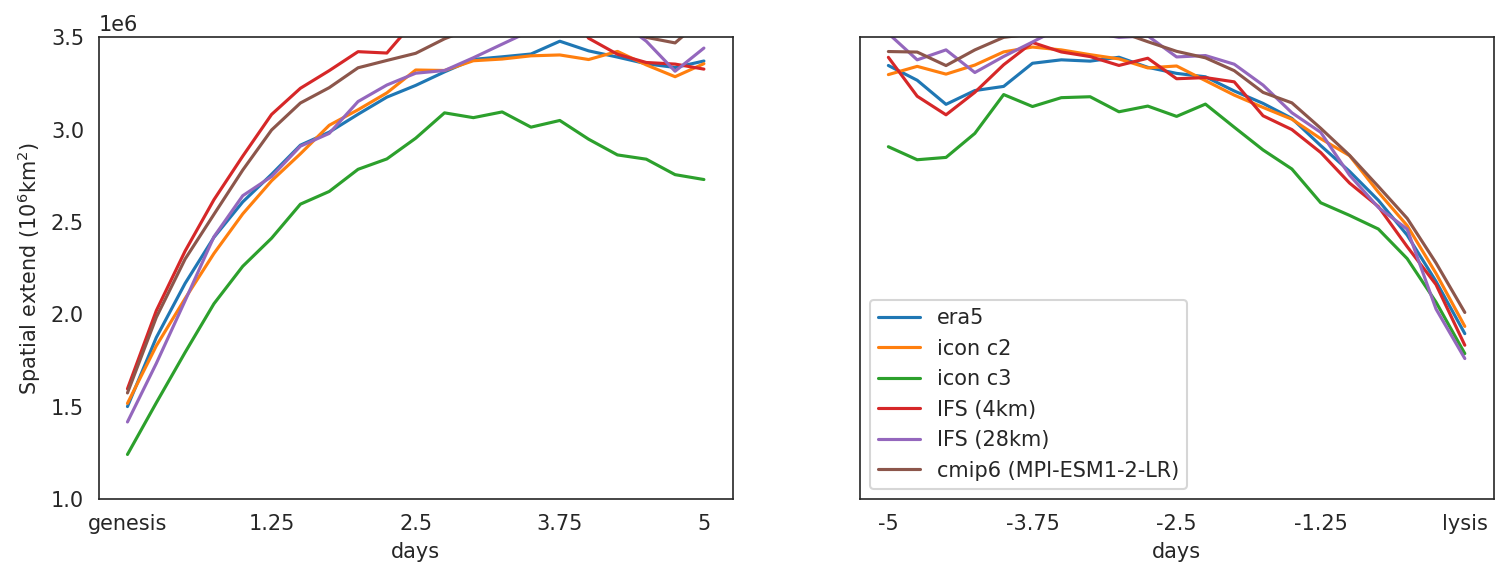

In [207]:
param='Size'
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12, 4), dpi=150)
era5_gns.plot(ax=ax[0],x='days',y=param, legend=False)
icon_ngc2013_gns.plot(ax=ax[0],x='days',y=param, legend=False)
icon_ngc3028_gns.plot(ax=ax[0],x='days',y=param, legend=False)
IFS_4_FESOM_5_gns.plot(ax=ax[0],x='days',y=param, legend=False)
IFS_28_NEMO_25_gns.plot(ax=ax[0],x='days',y=param, legend=False)
cmip6_gns.plot(ax=ax[0],x='days',y=param, legend=False)

ax[0].set_ylim(1e6,3.5e6)
ax[0].set_ylabel("Spatial extend (10$^6$km$^2$)")


era5_lys.plot(ax=ax[1],x='days',y=param)
icon_ngc2013_lys.plot(ax=ax[1],x='days',y=param)
icon_ngc3028_lys.plot(ax=ax[1],x='days',y=param)
IFS_4_FESOM_5_lys.plot(ax=ax[1],x='days',y=param)
IFS_28_NEMO_25_lys.plot(ax=ax[1],x='days',y=param)
cmip6_lys.plot(ax=ax[1],x='days',y=param)

ax[1].set_ylim(1e6,3.5e6)
ax[1].yaxis.set_visible(False)

#ax[0].legend(["era5","icon c2","icon c3","IFS (4km)","IFS (28km)","cmip6 (MPI-ESM1-2-LR)"])
ax[1].legend(["era5","icon c2","icon c3","IFS (4km)","IFS (28km)","cmip6 (MPI-ESM1-2-LR)"])

plt.savefig('life_size-blocks_NH.jpg')

## zonal speed

In [237]:
import numpy as np
def haversine(lon1,lat1,lon2,lat2):
    """
    """
    lon1,lat1,lon2,lat2 = map(np.radians, [lon1,lat1,lon2,lat2])
    ###haversine formula
    dlon = lon2 -lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    #radius of earth in meters
    m = 6378137*c
    return m

def group_speed(g):
    """
    zonal speed with 6 hourly data
    """
    g['Velocity']=(haversine(g['Longitude'], g['Latitude'], g['Longitude'].shift(1), g['Latitude']))/(60*60*6)
    #era5_df['Velocity']=(haversine(era5_df['Longitude'], era5_df['Latitude'], era5_df['Longitude'].shift(1), era5_df['Latitude'].shift(1)))/(60*60*6)
    return g


In [238]:
### full input
#(6378137*(2*np.arcsin(np.sqrt((np.sin(np.radians(era5_df['Latitude'].shift(1))-np.radians(era5_df['Latitude']))/2)**2 + \
#np.cos(np.radians(era5_df['Latitude'])) * \
#np.cos(np.radians(era5_df['Latitude'].shift(1))) * \
#np.sin((np.radians(era5_df['Longitude'].shift(1))-np.radians(era5_df['Longitude']))/2)**2))))/(60*60*6)

In [239]:
###Using function
###Speed
#era5_df['Velocity']=(haversine(era5_df['Longitude'], era5_df['Latitude'], era5_df['Longitude'].shift(1), era5_df['Latitude'].shift(1)))/(60*60*6)
###Zonal speed
#era5_df['Velocity']=(haversine(era5_df['Longitude'], era5_df['Latitude'], era5_df['Longitude'].shift(1), era5_df['Latitude']))/(60*60*6)
#era5_df

In [240]:
### We need to group by block id
era5_block=pd.DataFrame(era5_df.groupby('Flag').apply(group_speed).reset_index(drop=True))


In [241]:
### We need to group by block id (climate models)
icon_ngc2013_block=pd.DataFrame(icon_ngc2013_df.groupby('Flag').apply(group_speed).reset_index(drop=True))
icon_ngc3028_block=pd.DataFrame(icon_ngc3028_df.groupby('Flag').apply(group_speed).reset_index(drop=True))
IFS_4_FESOM_5_block=pd.DataFrame(IFS_4_FESOM_5_df.groupby('Flag').apply(group_speed).reset_index(drop=True))
IFS_28_NEMO_25_block=pd.DataFrame(IFS_28_NEMO_25_df.groupby('Flag').apply(group_speed).reset_index(drop=True))
IFS_28_FESOM_25_block=pd.DataFrame(IFS_28_FESOM_25_df.groupby('Flag').apply(group_speed).reset_index(drop=True))
cmip6_block=pd.DataFrame(cmip6_df.groupby('Flag').apply(group_speed).reset_index(drop=True))

In [77]:
###==Climate models
#icon_ngc2013_df['Velocity']=(haversine(icon_ngc2013_df['Longitude'], icon_ngc2013_df['Latitude'], icon_ngc2013_df['Longitude'].shift(1), icon_ngc2013_df['Latitude']))/(60*60*6)
#icon_ngc3028_df['Velocity']=(haversine(icon_ngc3028_df['Longitude'], icon_ngc3028_df['Latitude'], icon_ngc3028_df['Longitude'].shift(1), icon_ngc3028_df['Latitude']))/(60*60*6)
#IFS_4_FESOM_5_df['Velocity']=(haversine(IFS_4_FESOM_5_df['Longitude'], IFS_4_FESOM_5_df['Latitude'], IFS_4_FESOM_5_df['Longitude'].shift(1), IFS_4_FESOM_5_df['Latitude']))/(60*60*6)
#IFS_28_NEMO_25_df['Velocity']=(haversine(IFS_28_NEMO_25_df['Longitude'], IFS_28_NEMO_25_df['Latitude'], IFS_28_NEMO_25_df['Longitude'].shift(1), IFS_28_NEMO_25_df['Latitude']))/(60*60*6)
#cmip6_df['Velocity']=(haversine(cmip6_df['Longitude'], cmip6_df['Latitude'], cmip6_df['Longitude'].shift(1), cmip6_df['Latitude']))/(60*60*6)

In [242]:
### Take a sample of the ICON ngc2013 to compare with the other models
era5_reset=era5_block.sample(frac=0.15, replace=True, random_state=1).reset_index(drop=True)
icon_ngc2013_reset=icon_ngc2013_block.sample(frac=0.15, replace=True, random_state=1).reset_index(drop=True)
cmip6_reset=cmip6_block.sample(frac=0.15, replace=True, random_state=1).reset_index(drop=True)


speed_dfs = pd.DataFrame({
    'ERA5':era5_reset['Velocity'],
    'ICON C2 (10km)':icon_ngc2013_reset['Velocity'].reset_index(drop=True),
    'ICON C3 (5km)':icon_ngc3028_block['Velocity'].reset_index(drop=True),
    'IFS C3 (4.4km)':IFS_4_FESOM_5_block['Velocity'].reset_index(drop=True),
    'IFS C3 (fesom)':IFS_28_FESOM_25_block['Velocity'].reset_index(drop=True),
    'IFS C3 (nemo)':IFS_28_NEMO_25_block['Velocity'].reset_index(drop=True),
    'CMIP6 (MPI)':cmip6_block['Velocity'].reset_index(drop=True)
       })

speed_dfs


###Find mean and max
mean = speed_dfs.mean()
maxv = speed_dfs.max()
print(maxv), print(mean)

ERA5              434.050885
ICON C2 (10km)    381.304553
ICON C3 (5km)     432.828148
IFS C3 (4.4km)    420.422456
IFS C3 (fesom)    343.805031
IFS C3 (nemo)     286.461177
CMIP6 (MPI)       492.263246
dtype: float64
ERA5              5.898164
ICON C2 (10km)    5.650689
ICON C3 (5km)     5.127809
IFS C3 (4.4km)    5.479648
IFS C3 (fesom)    5.359342
IFS C3 (nemo)     4.989755
CMIP6 (MPI)       6.136796
dtype: float64


(None, None)

In [243]:
#import seaborn as sns
#
#fig,ax = plt.subplots(1, 1, figsize=(6, 4),dpi=150)
#
#p1=sns.kdeplot(speed_dfs['ERA5'], fill=False, common_norm=False, alpha=.85, linewidth=2,label='ERA5',)
#p2=sns.kdeplot(speed_dfs['ICON C2 (10km)'], fill=False, common_norm=False, alpha=.85, linewidth=2,label='ICON C2(10km)')
#p2=sns.kdeplot(speed_dfs['ICON C3 (5km)'], fill=False, common_norm=False, alpha=.85, linewidth=2,label='ICON C3 (5km)')
#p3=sns.kdeplot(speed_dfs['IFS C3 (4.4km)'], fill=False, common_norm=False, alpha=.85, linewidth=2,label='IFS C3 (4.4km)')
#p4=sns.kdeplot(speed_dfs['IFS C3 (28km)'], fill=False, common_norm=False, alpha=.85, linewidth=2,label='IFS C3 (28km)')
#p5=sns.kdeplot(speed_dfs['CMIP6 (MPI)'], fill=False, common_norm=False, alpha=.85, linewidth=2,label='CMIP6 (MPI) ')


#p1=sns.histplot(speed_dfs['ERA5'],  fill=False, alpha=.85, linewidth=2,label='ERA5',element='step')

#p1=plt.hist(speed_dfs['ERA5'],  bins=500)

#ax.set_xlim(-15,15)

In [244]:
#########################
###===== lets compute by block case
########

In [245]:
era5_ave=pd.DataFrame(era5_block.groupby('Flag').mean()).reset_index(drop=True)
icon_ngc2013_ave=pd.DataFrame(icon_ngc2013_block.groupby('Flag').mean()).reset_index(drop=True)
icon_ngc3028_ave=pd.DataFrame(icon_ngc3028_block.groupby('Flag').mean()).reset_index(drop=True)
IFS_4_FESOM_5_ave=pd.DataFrame(IFS_4_FESOM_5_block.groupby('Flag').mean()).reset_index(drop=True)
IFS_28_FESOM_25_ave=pd.DataFrame(IFS_28_FESOM_25_block.groupby('Flag').mean()).reset_index(drop=True)
IFS_28_NEMO_25_ave=pd.DataFrame(IFS_28_NEMO_25_block.groupby('Flag').mean()).reset_index(drop=True)
cmip6_ave=pd.DataFrame(cmip6_block.groupby('Flag').mean()).reset_index(drop=True)

### Take a sample of the ICON ngc2013 to compare with the other models
era5_reset=era5_ave.sample(frac=0.15, replace=True, random_state=1).reset_index(drop=True)
icon_ngc2013_reset=icon_ngc2013_ave.sample(frac=0.15, replace=True, random_state=1).reset_index(drop=True)
cmip6_reset=cmip6_ave.sample(frac=0.15, replace=True, random_state=1).reset_index(drop=True)


speed_dfs = pd.DataFrame({
    'ERA5':era5_reset['Velocity'],
    'ICON C2 (10km)':icon_ngc2013_reset['Velocity'].reset_index(drop=True),
    'ICON C3 (5km)':icon_ngc3028_ave['Velocity'].reset_index(drop=True),
    'IFS C3 (4.4km)':IFS_4_FESOM_5_ave['Velocity'].reset_index(drop=True),
    'IFS C3 (fesom)':IFS_28_FESOM_25_ave['Velocity'].reset_index(drop=True),
    'IFS C3 (nemo)':IFS_28_NEMO_25_ave['Velocity'].reset_index(drop=True),
    'CMIP6 (MPI)':cmip6_reset['Velocity'].reset_index(drop=True)
       })

speed_dfs


###Find mean and max
mean = speed_dfs.mean()
median = speed_dfs.median()
maxv = speed_dfs.max()
print(maxv), print(median)

ERA5              21.515295
ICON C2 (10km)    22.726063
ICON C3 (5km)     24.527647
IFS C3 (4.4km)    25.455637
IFS C3 (fesom)    30.146149
IFS C3 (nemo)     20.507794
CMIP6 (MPI)       35.728167
dtype: float64
ERA5              3.218064
ICON C2 (10km)    3.699805
ICON C3 (5km)     3.440889
IFS C3 (4.4km)    3.543618
IFS C3 (fesom)    3.716157
IFS C3 (nemo)     3.642347
CMIP6 (MPI)       3.433927
dtype: float64


(None, None)

(-10.0, 15.0)

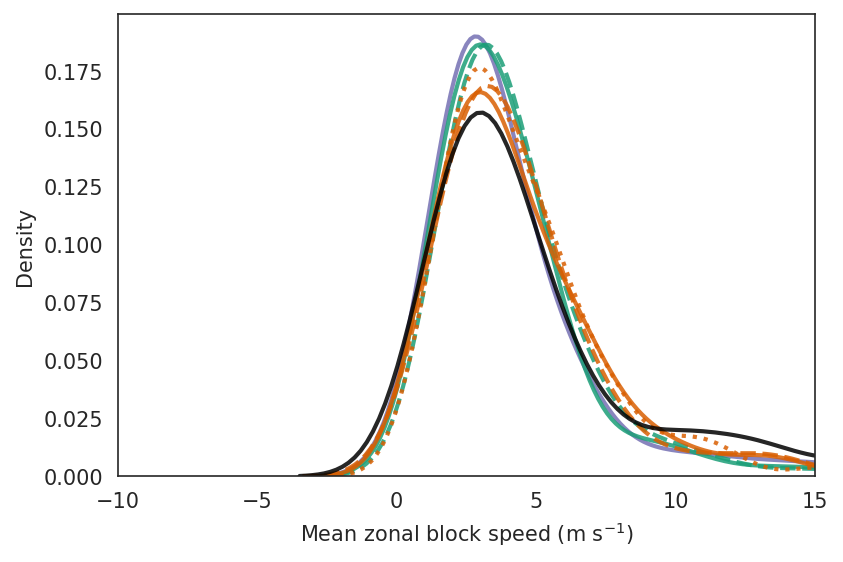

In [251]:
import seaborn as sns

fig,ax = plt.subplots(1, 1, figsize=(6, 4),dpi=150)

p1=sns.kdeplot(speed_dfs['ERA5'], color=color_era5, fill=False, common_norm=False, alpha=.85, linewidth=2,label='ERA5',)
p2=sns.kdeplot(speed_dfs['ICON C2 (10km)'], color=color_icon,fill=False, common_norm=False, alpha=.85, linestyle='--', linewidth=2,label='ICON C2')
p2=sns.kdeplot(speed_dfs['ICON C3 (5km)'],color=color_icon, fill=False, common_norm=False, alpha=.85, linewidth=2,label='ICON C3')
p3=sns.kdeplot(speed_dfs['IFS C3 (4.4km)'],color=color_ifs, fill=False, common_norm=False, alpha=.85, linewidth=2,label='IFS-4.4km')
p4=sns.kdeplot(speed_dfs['IFS C3 (fesom)'], color=color_ifs, fill=False, common_norm=False, alpha=.85, linestyle='--', linewidth=2,label='IFS-28km')
p4=sns.kdeplot(speed_dfs['IFS C3 (nemo)'], color=color_ifs, fill=False, common_norm=False, alpha=.85, linestyle=':', linewidth=2,label='IFS-28km (NEMO)')
p5=sns.kdeplot(speed_dfs['CMIP6 (MPI)'], color=color_cmip6, fill=False, common_norm=False, alpha=.85, linewidth=2,label='CMIP6 (MPI-ESM1-2-LR) ')


#p1=sns.histplot(speed_dfs['ERA5'],  fill=False, alpha=.85, linewidth=2,label='ERA5',element='step')
#p1=plt.hist(speed_dfs['ERA5'],  bins=100)

#plt.legend(loc='upper right')
ax.set(xlabel='Mean zonal block speed (m s$^{-1}$)')
plt.savefig('zonal_speed-blocks_NH.jpg')

ax.set_xlim(-10,15)

In [84]:
###=== Cramér–von Mises test (two samples)
import numpy as np
from scipy import stats

#res = stats.cramervonmises_2samp(j,j)
#print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(speed_dfs['ERA5'],speed_dfs['ICON C2 (10km)'])
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(speed_dfs['ERA5'],speed_dfs['ICON C3 (5km)'])
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(speed_dfs['ERA5'],speed_dfs['IFS C3 (4.4km)'])
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(speed_dfs['ERA5'],speed_dfs['IFS C3 (28km)'])
print(res.statistic, res.pvalue)
res = stats.cramervonmises_2samp(speed_dfs['ERA5'],speed_dfs['CMIP6 (MPI)'])
print(res.statistic, res.pvalue)

1.7932293028213024 3.706099166744803e-05
0.27841400390114757 0.155948323942401
0.24579722093749012 0.19422538676062573
0.32784190311488715 0.11319732822558082
0.3396358261778971 0.10505339687801618


In [85]:
### percentile comparison

In [86]:
j=speed_dfs['ERA5'].values

In [87]:
stats.cramervonmises_2samp(j,j)

CramerVonMisesResult(statistic=0.1913370467936346, pvalue=0.28562429397988565)